In [453]:
import numpy as np
import pandas as pd

<h1> Answering Questions for the Report</h1>

<br> 

In the first section we will load the covid-19 data and begin to clean and aggregate the data. 

In [454]:
# 2. Create a dataframe from csv
# I organized my data in a data file

data = pd.read_csv("../data/time-series-19-covid-combined.csv")
df = pd.DataFrame(data)

In [455]:
# 3. Merge the data for countries with multiple regions in order to provide a single time-series for each country.
# I decided to sum the cases columns
countries = data[['Date', 'Country/Region', 'Confirmed', 'Recovered', 'Deaths']].groupby(['Date', 'Country/Region']).sum()
countries = countries.reset_index()
countries.head()

Date Country/Region  Confirmed  Recovered  Deaths
0  2020-01-22    Afghanistan          0        0.0       0
1  2020-01-22        Albania          0        0.0       0
2  2020-01-22        Algeria          0        0.0       0
3  2020-01-22        Andorra          0        0.0       0
4  2020-01-22         Angola          0        0.0       0

In [456]:
# 4. Print the total number of confirmed cases and number of deaths in each country in the
# last reported day. What are the 10 countries with the highest number of confirmed
# COVID-19 cases? What are the 10 countries with the highest number of deaths?

last_day_first = countries.sort_values(by='Date', ascending=False)
last_day_df = countries[countries.Date == '2020-12-14'][['Date', 'Country/Region','Confirmed','Deaths']]

for row in last_day_df.iterrows():
    print(row)
    

(62457, Date               2020-12-14
Country/Region    Afghanistan
Confirmed               48718
Deaths                   1969
Name: 62457, dtype: object)
(62458, Date              2020-12-14
Country/Region       Albania
Confirmed              49191
Deaths                  1016
Name: 62458, dtype: object)
(62459, Date              2020-12-14
Country/Region       Algeria
Confirmed              92597
Deaths                  2609
Name: 62459, dtype: object)
(62460, Date              2020-12-14
Country/Region       Andorra
Confirmed               7382
Deaths                    79
Name: 62460, dtype: object)
(62461, Date              2020-12-14
Country/Region        Angola
Confirmed              16277
Deaths                   372
Name: 62461, dtype: object)
(62462, Date                       2020-12-14
Country/Region    Antigua and Barbuda
Confirmed                         148
Deaths                              5
Name: 62462, dtype: object)
(62463, Date              2020-12-14
Country/Reg

In [457]:
# 10 countries with the highest number of confirmed cases on the last day

ten_highest_confirmed = last_day_df.sort_values(by='Confirmed', ascending=False).head(10)
ten_highest_confirmed.head(10)

Date  Country/Region  Confirmed  Deaths
62634  2020-12-14              US   16519462  300479
62536  2020-12-14           India    9906165  143709
62480  2020-12-14          Brazil    6927145  181835
62598  2020-12-14          Russia    2656601   46846
62519  2020-12-14          France    2433859   58391
62638  2020-12-14  United Kingdom    1874867   64500
62633  2020-12-14          Turkey    1866345   16646
62542  2020-12-14           Italy    1855737   65011
62618  2020-12-14           Spain    1751884   48013
62463  2020-12-14       Argentina    1503222   41041

In [458]:
# 10 top # of deaths
ten_highest_deaths = last_day_df.sort_values(by='Deaths', ascending=False).head(10)
ten_highest_deaths.head(10)

Date  Country/Region  Confirmed  Deaths
62634  2020-12-14              US   16519462  300479
62480  2020-12-14          Brazil    6927145  181835
62536  2020-12-14           India    9906165  143709
62571  2020-12-14          Mexico    1255974  114298
62542  2020-12-14           Italy    1855737   65011
62638  2020-12-14  United Kingdom    1874867   64500
62519  2020-12-14          France    2433859   58391
62538  2020-12-14            Iran    1115770   52447
62618  2020-12-14           Spain    1751884   48013
62598  2020-12-14          Russia    2656601   46846

<Figure size 5760x2880 with 0 Axes>

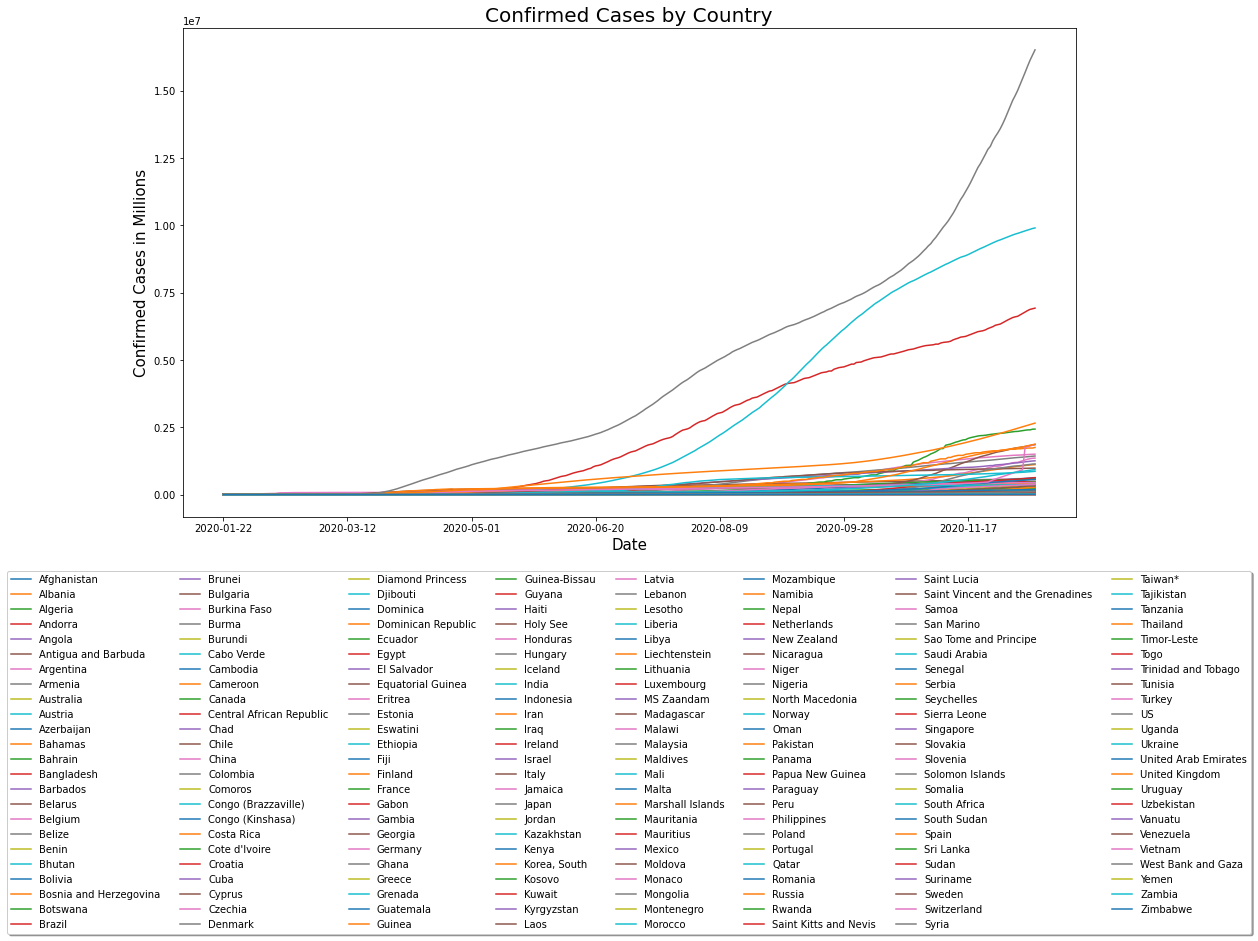

<Figure size 1152x648 with 0 Axes>

In [459]:
# 5. Plot a graph of the number of confirmed cases over time for each country. Which
# countries present exponential growth in the number of cases and which countries are
# already leaving exponential growth?

import matplotlib.pyplot as plt 

df_plt = countries.pivot(index='Date', columns='Country/Region', values='Confirmed')

plt.figure(figsize=(80,40)); df_plt.plot(); 

plt.legend(loc='upper center', bbox_to_anchor=(.5, -.1),
          ncol=8, fancybox=True, shadow=True)
plt.title('Confirmed Cases by Country', fontsize=20)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Confirmed Cases in Millions', fontsize=15)
plt.figure().savefig('allcountries.jpg')


# This first graph will give us an idea of any initial exponential growth trends before separating out the countries


/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are reta

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

<ipython-input-460-502fa70720db>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


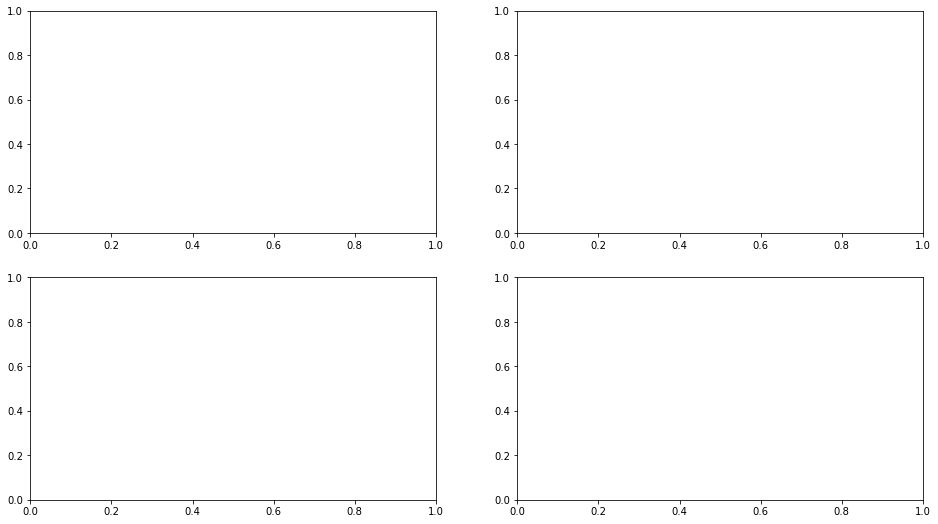

<Figure size 5760x2880 with 0 Axes>

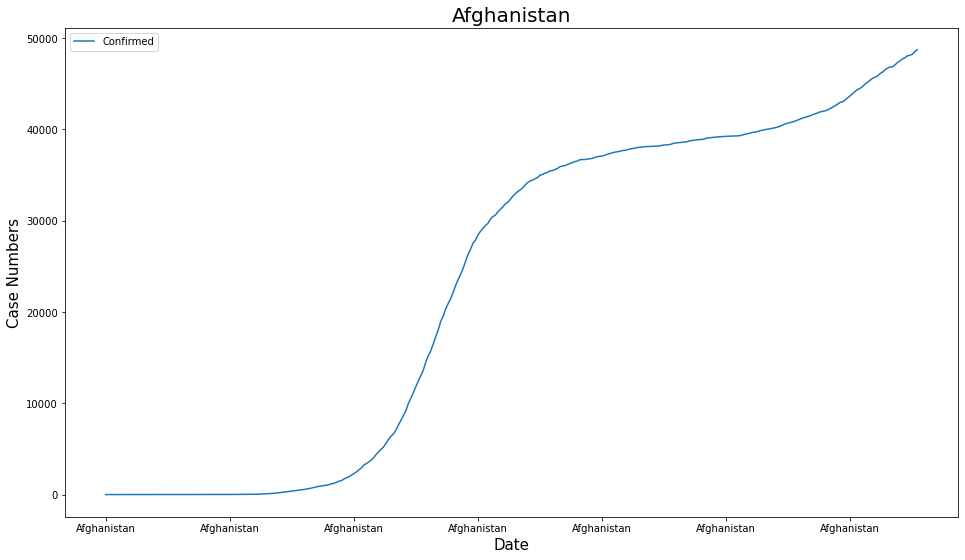

<Figure size 5760x2880 with 0 Axes>

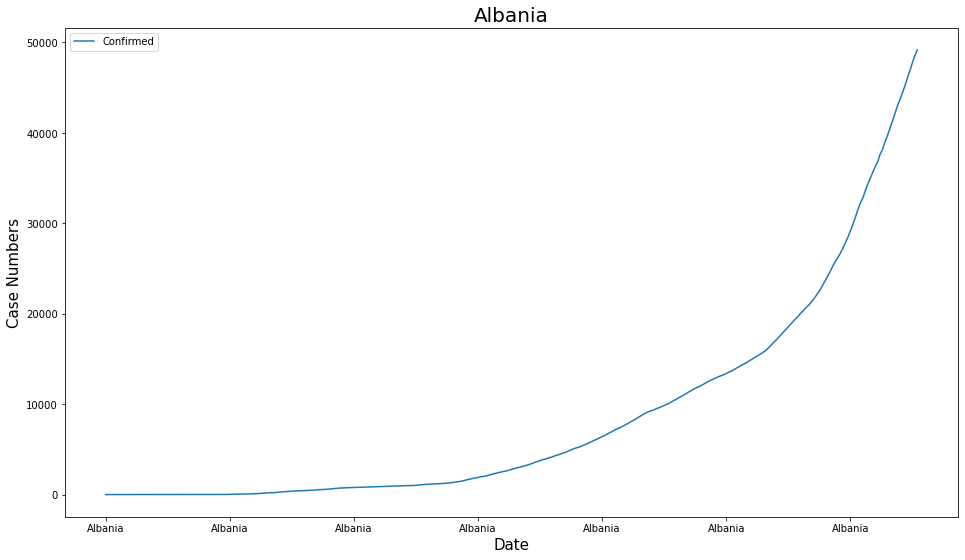

<Figure size 5760x2880 with 0 Axes>

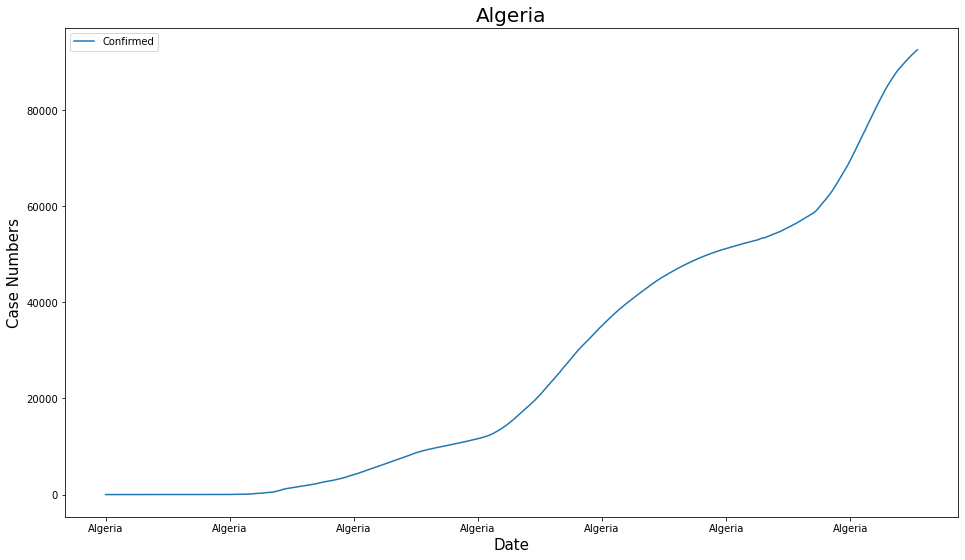

<Figure size 5760x2880 with 0 Axes>

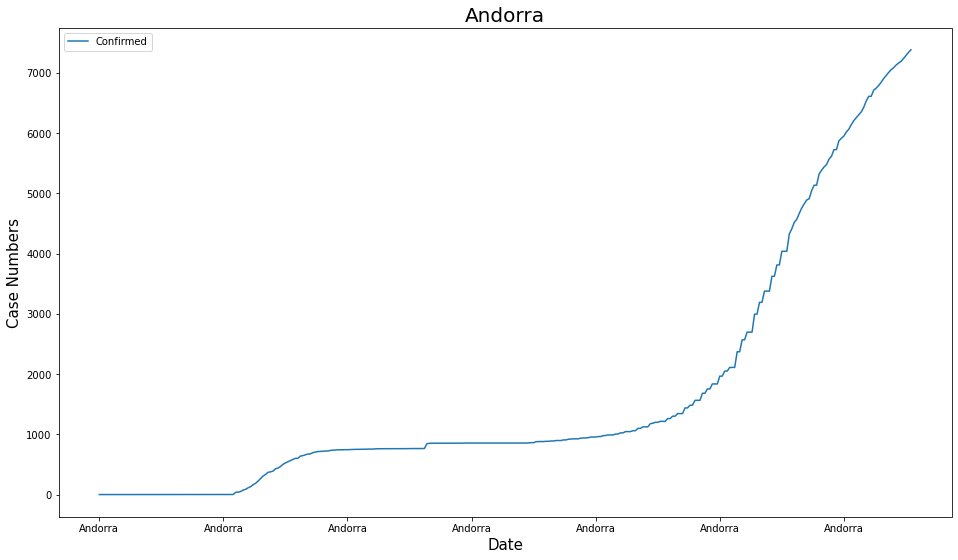

<Figure size 5760x2880 with 0 Axes>

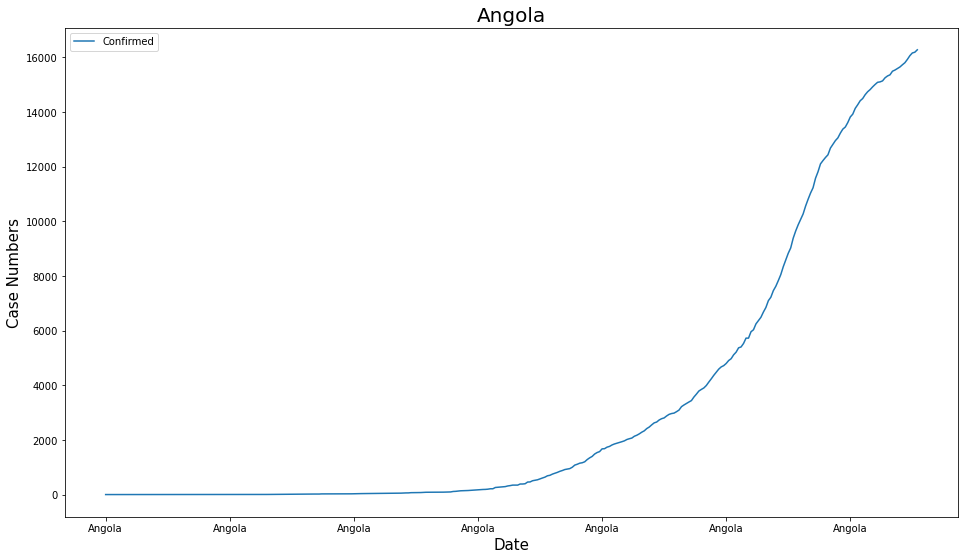

<Figure size 5760x2880 with 0 Axes>

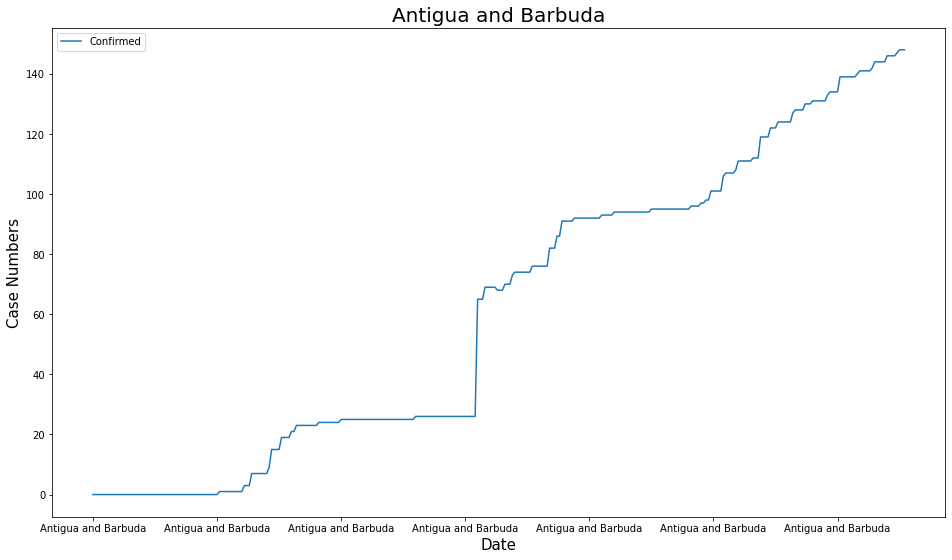

<Figure size 5760x2880 with 0 Axes>

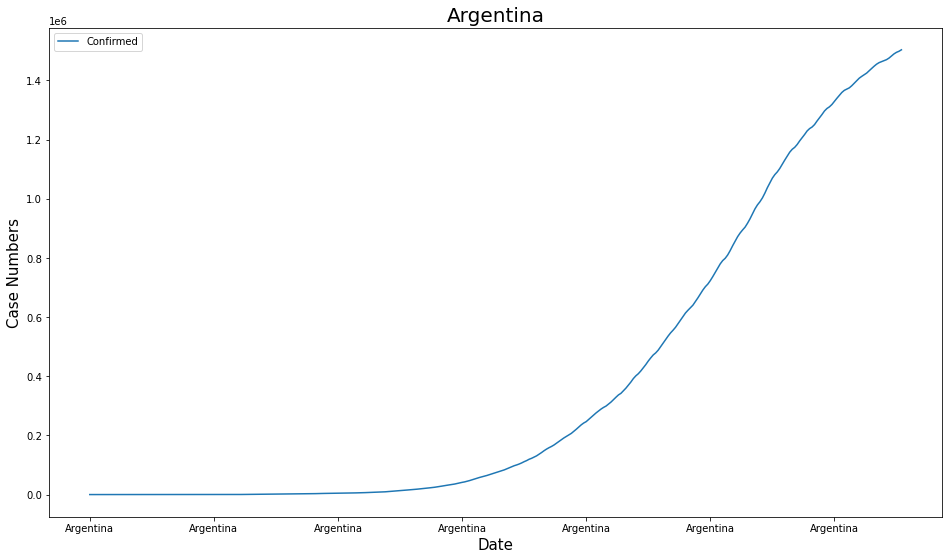

<Figure size 5760x2880 with 0 Axes>

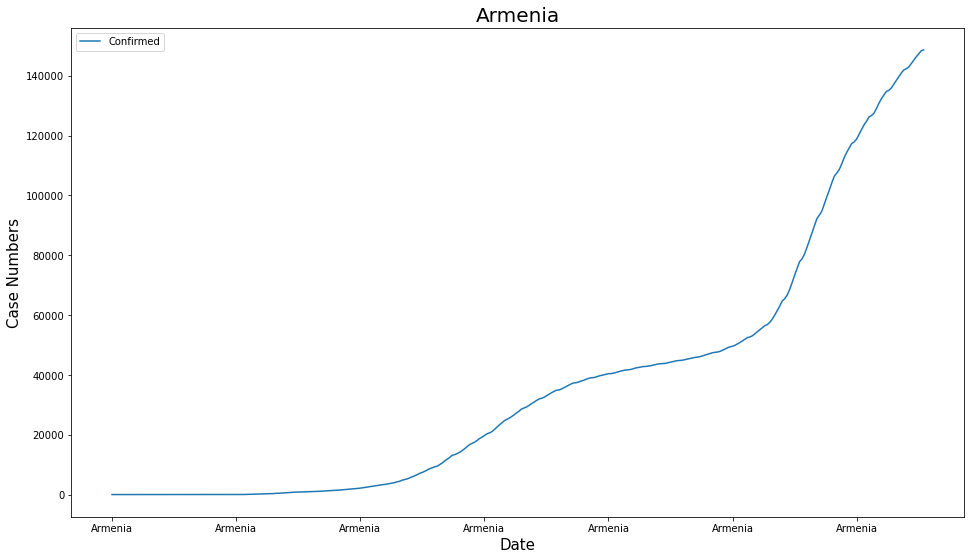

<Figure size 5760x2880 with 0 Axes>

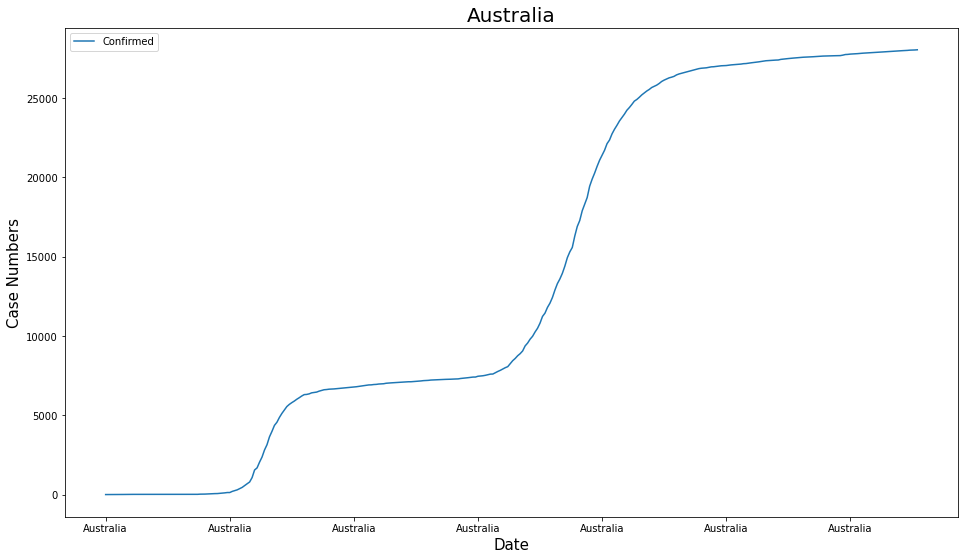

<Figure size 5760x2880 with 0 Axes>

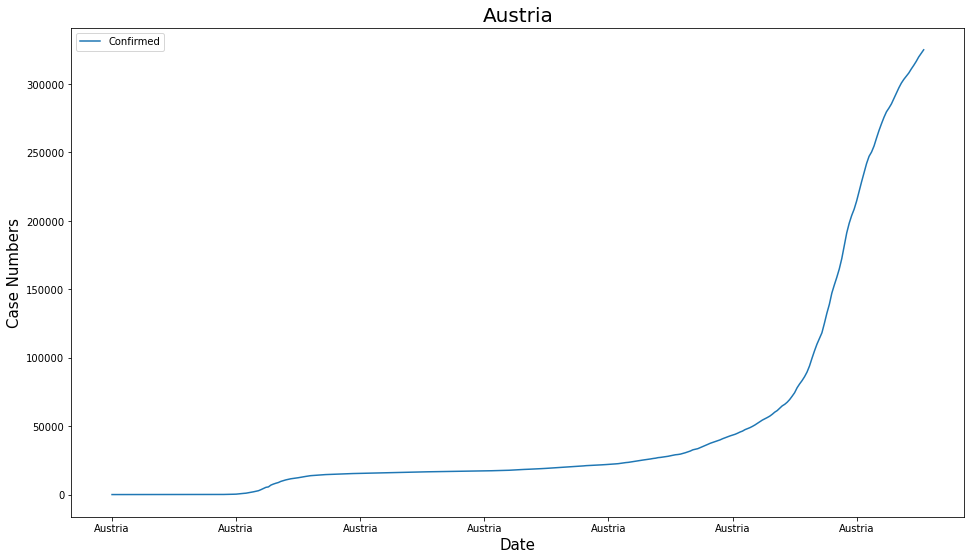

<Figure size 5760x2880 with 0 Axes>

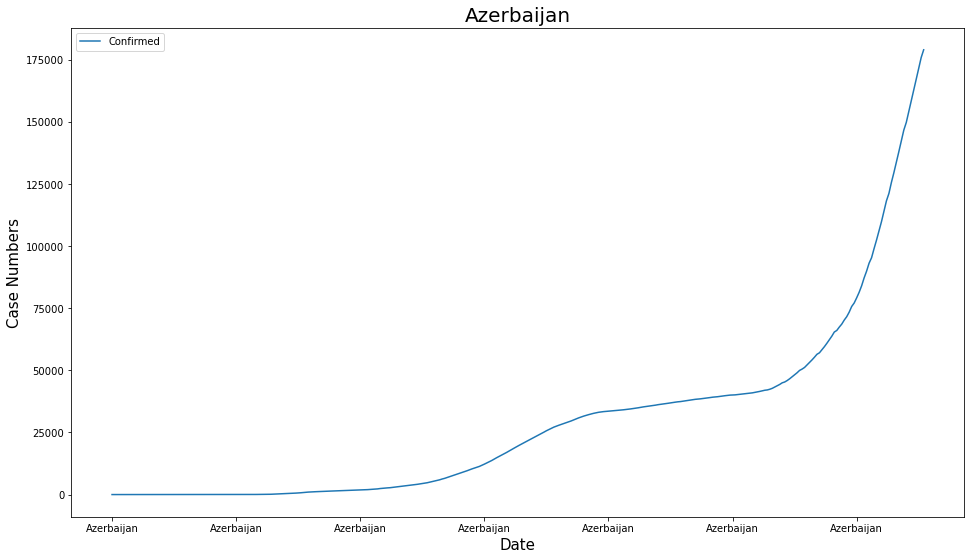

<Figure size 5760x2880 with 0 Axes>

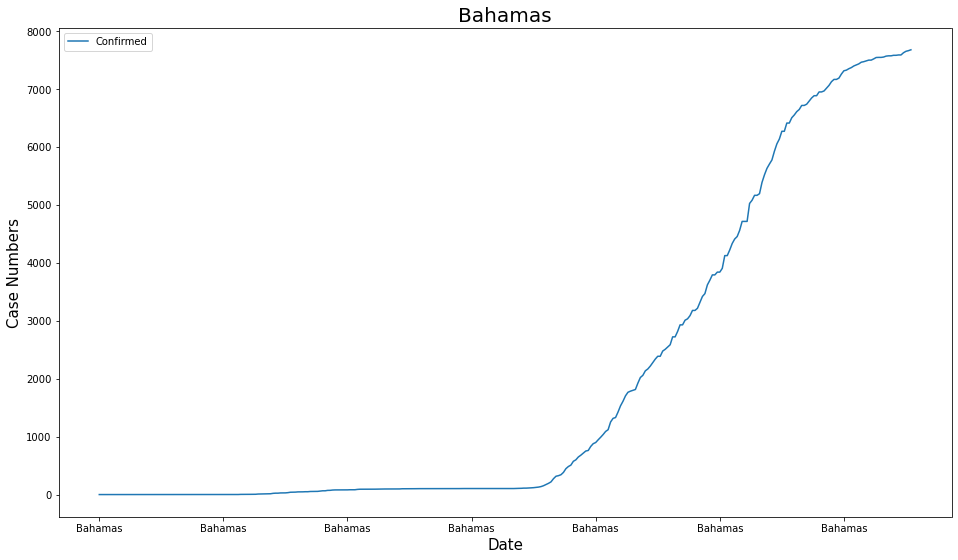

<Figure size 5760x2880 with 0 Axes>

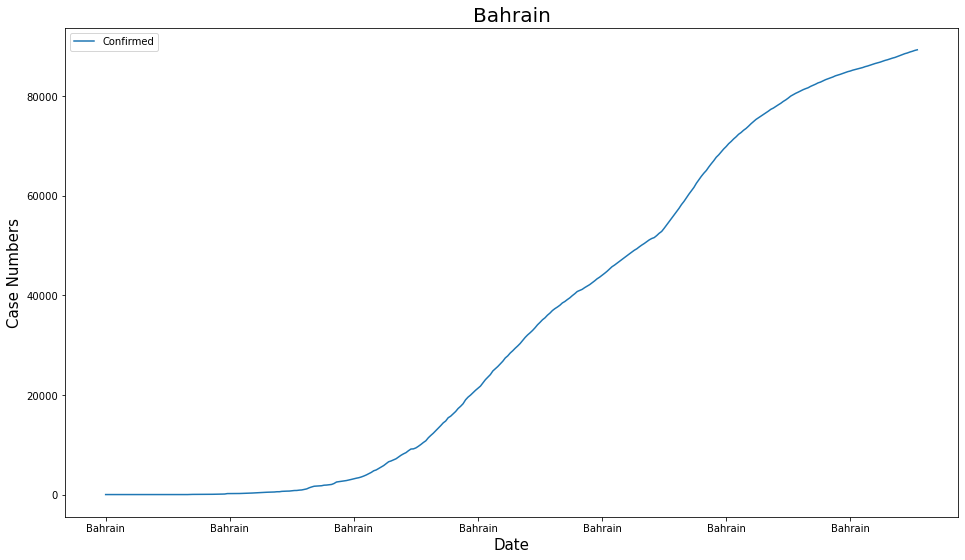

<Figure size 5760x2880 with 0 Axes>

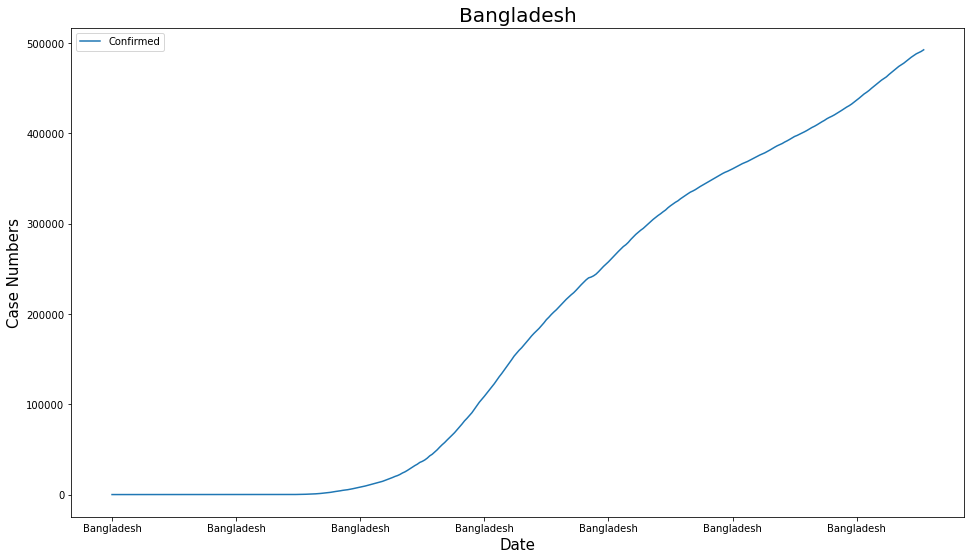

<Figure size 5760x2880 with 0 Axes>

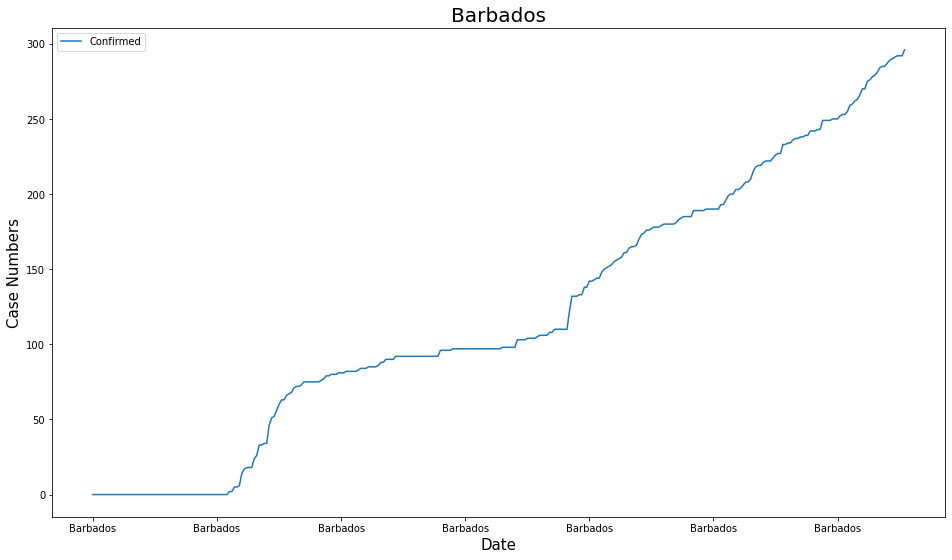

<Figure size 5760x2880 with 0 Axes>

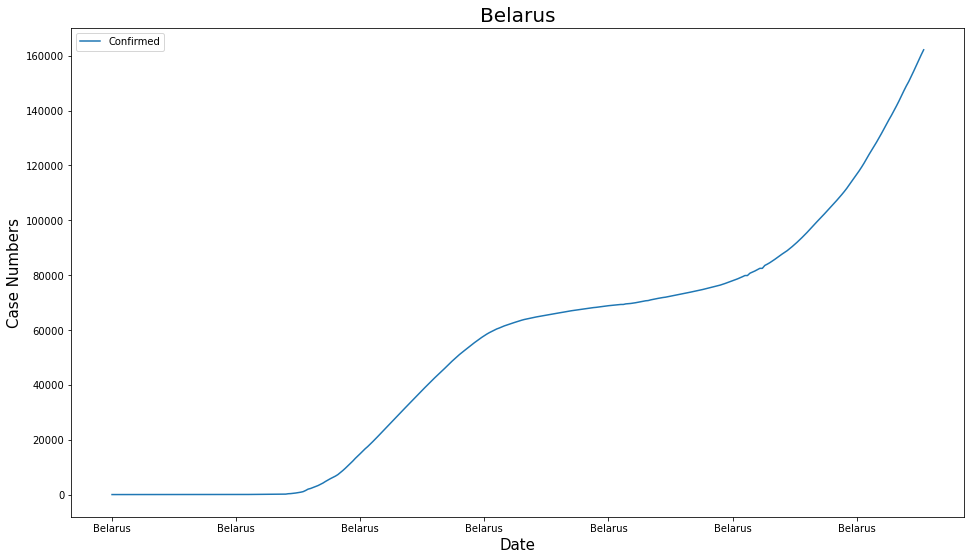

<Figure size 5760x2880 with 0 Axes>

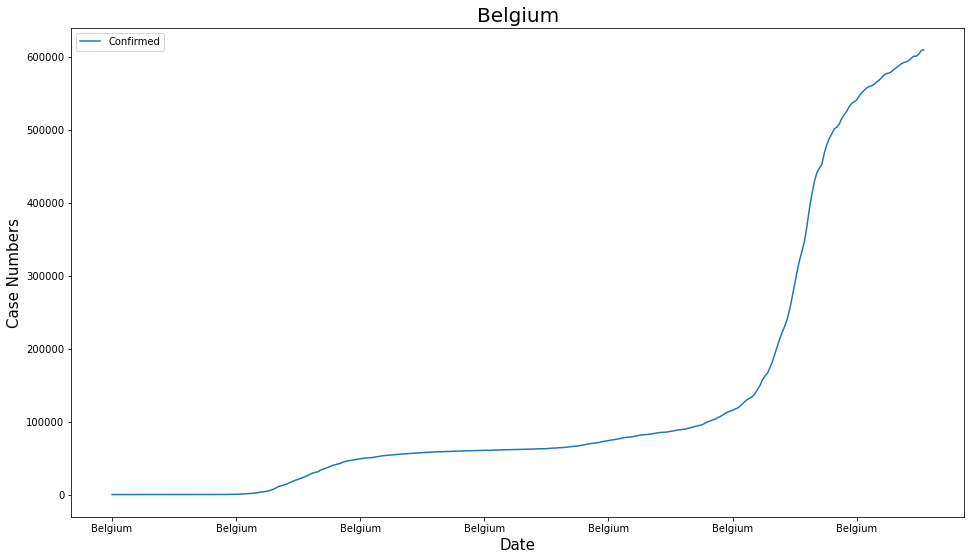

<Figure size 5760x2880 with 0 Axes>

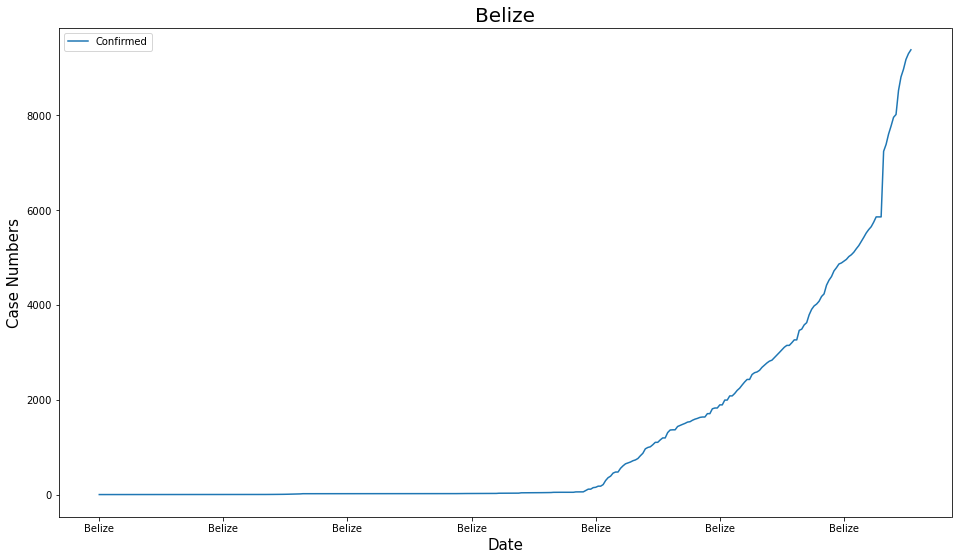

<Figure size 5760x2880 with 0 Axes>

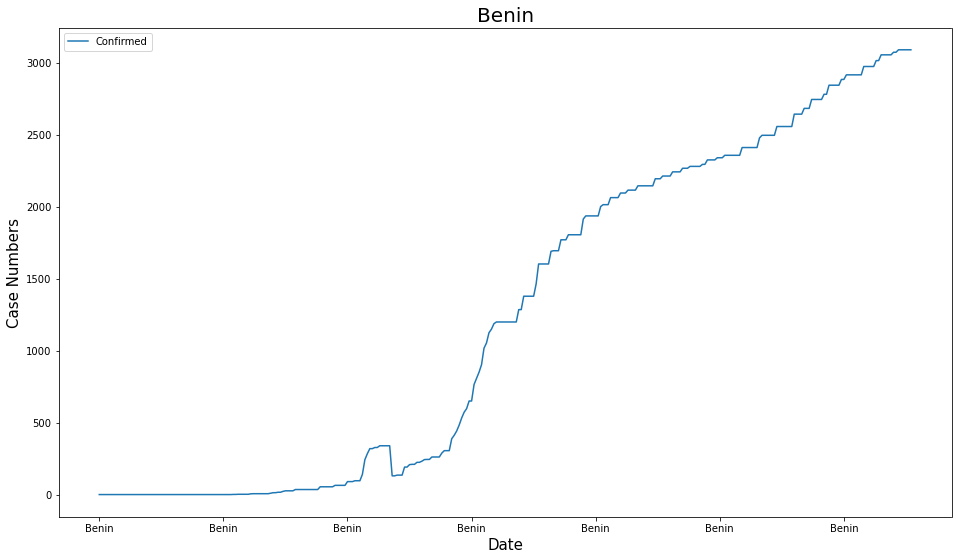

<Figure size 5760x2880 with 0 Axes>

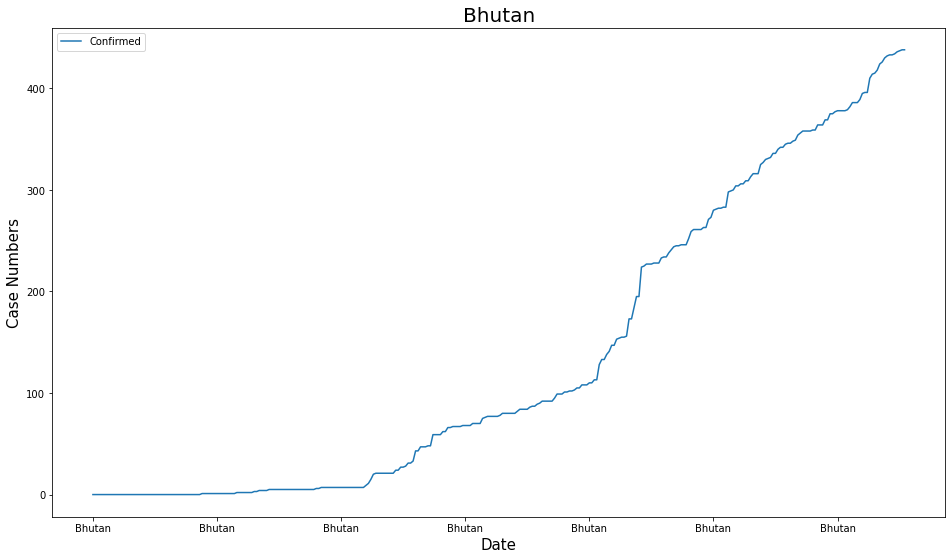

<Figure size 5760x2880 with 0 Axes>

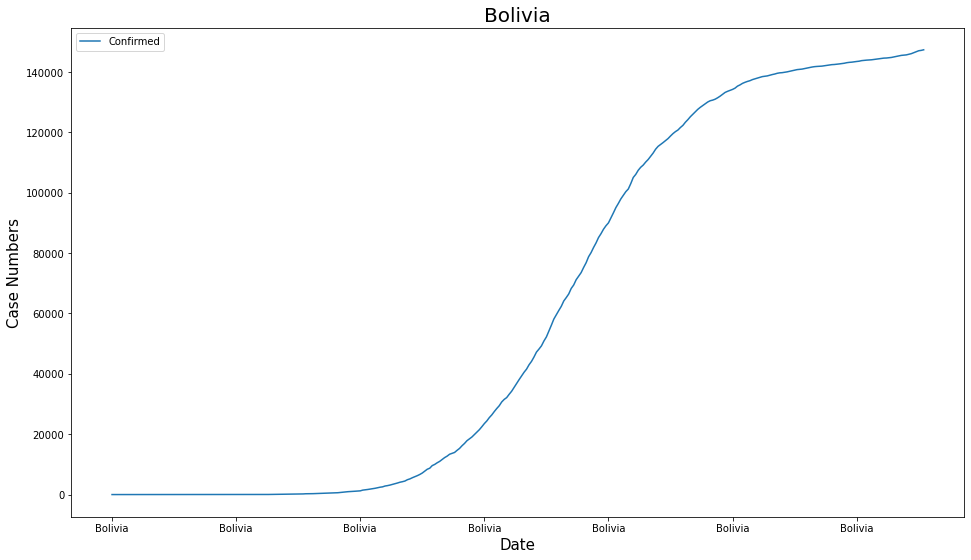

<Figure size 5760x2880 with 0 Axes>

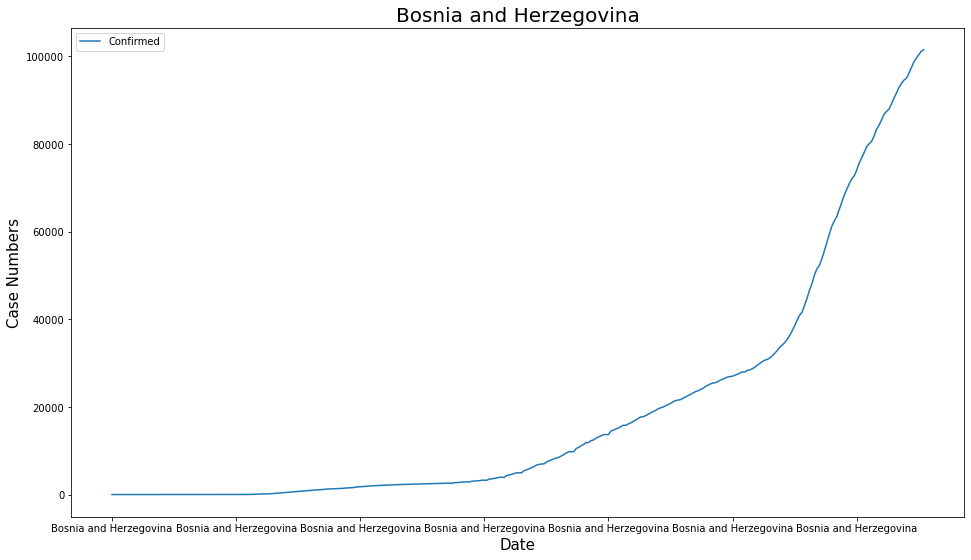

<Figure size 5760x2880 with 0 Axes>

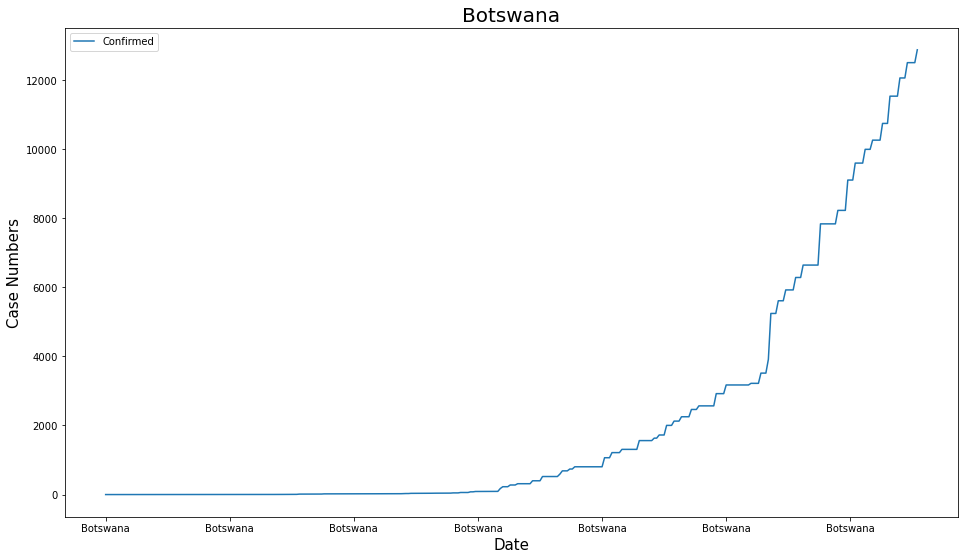

<Figure size 5760x2880 with 0 Axes>

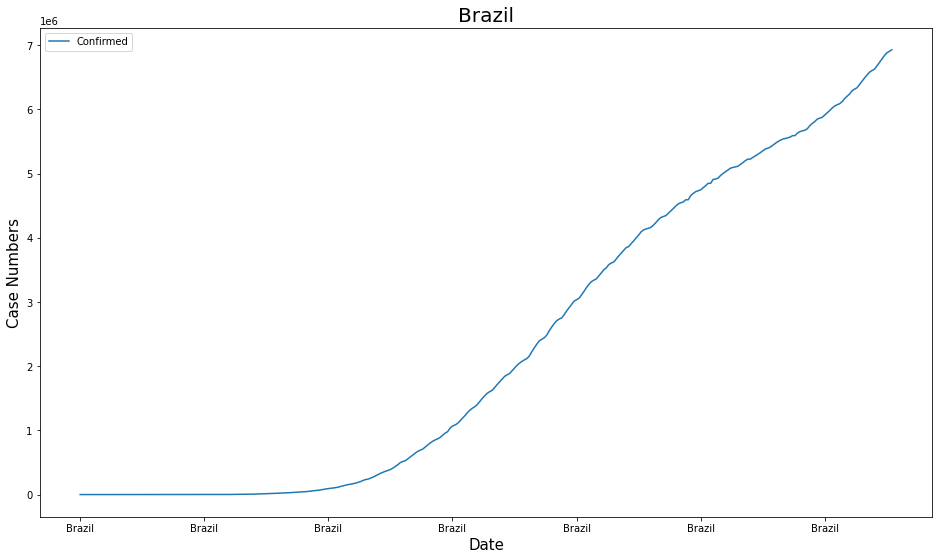

<Figure size 5760x2880 with 0 Axes>

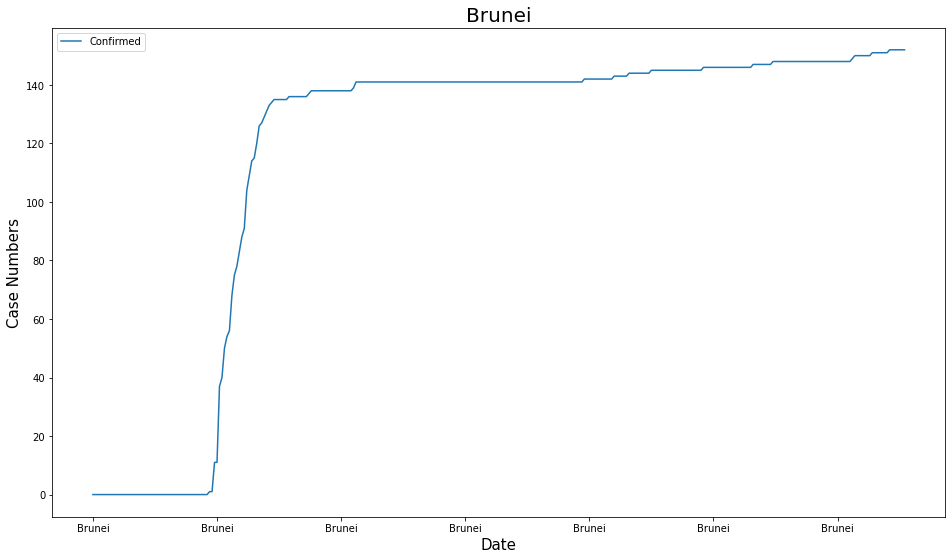

<Figure size 5760x2880 with 0 Axes>

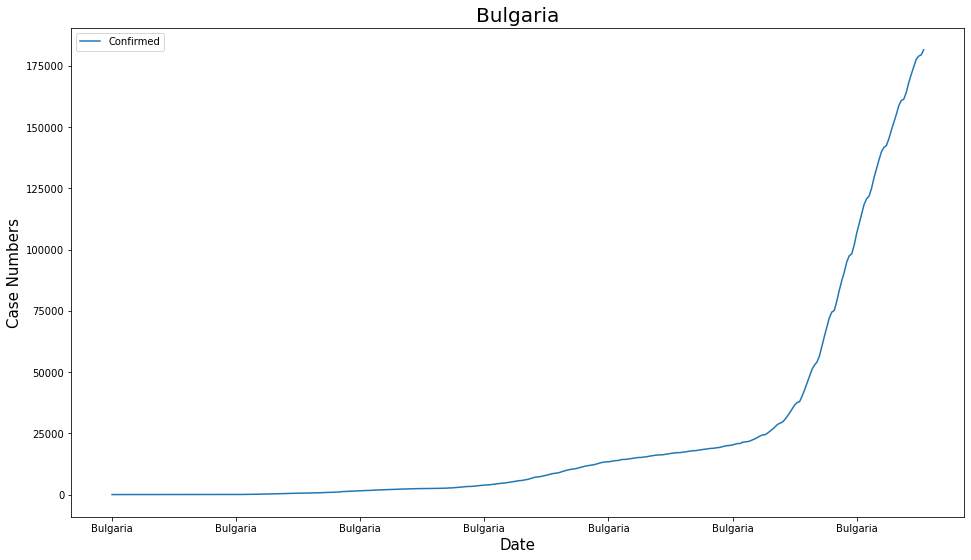

<Figure size 5760x2880 with 0 Axes>

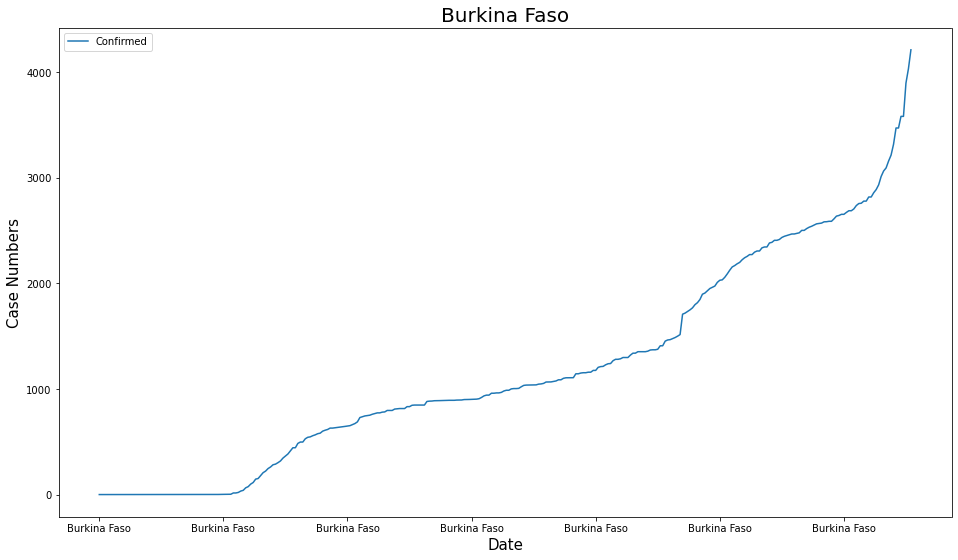

<Figure size 5760x2880 with 0 Axes>

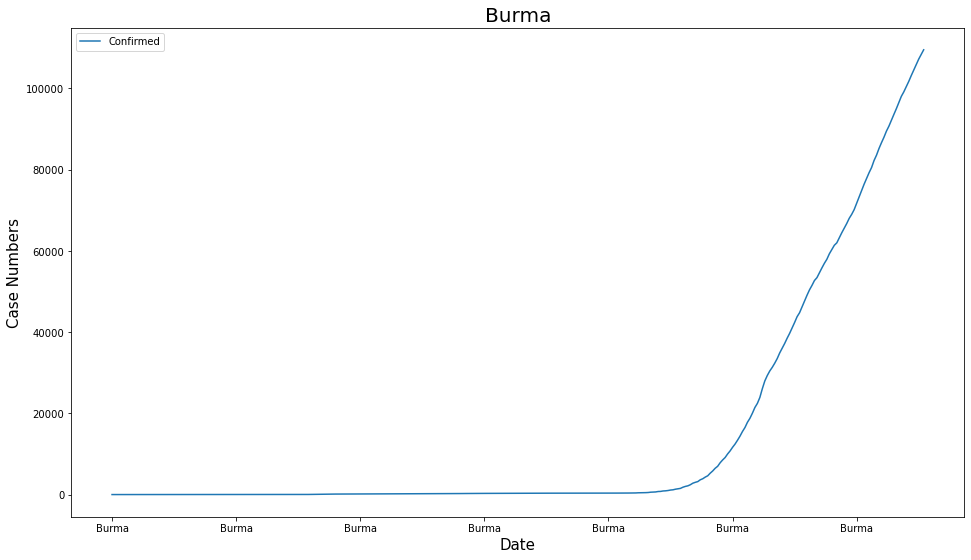

<Figure size 5760x2880 with 0 Axes>

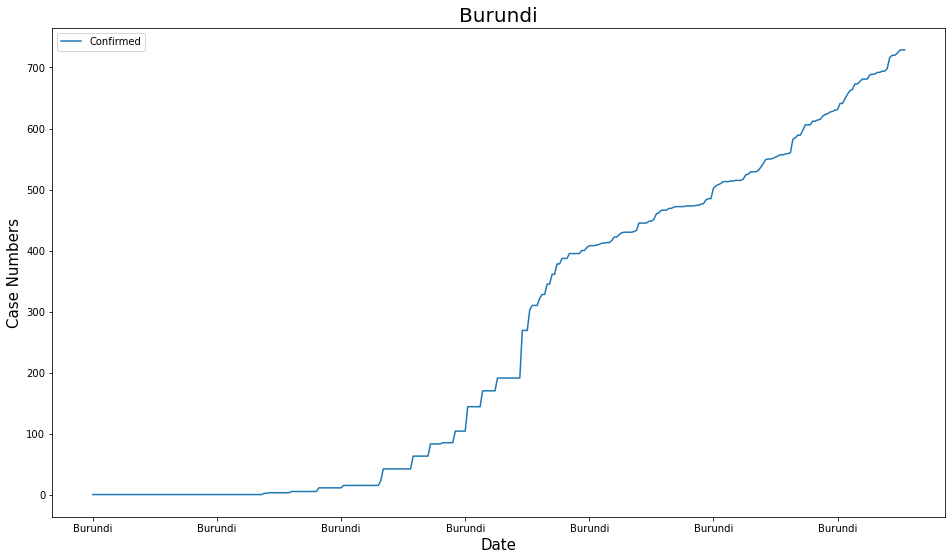

<Figure size 5760x2880 with 0 Axes>

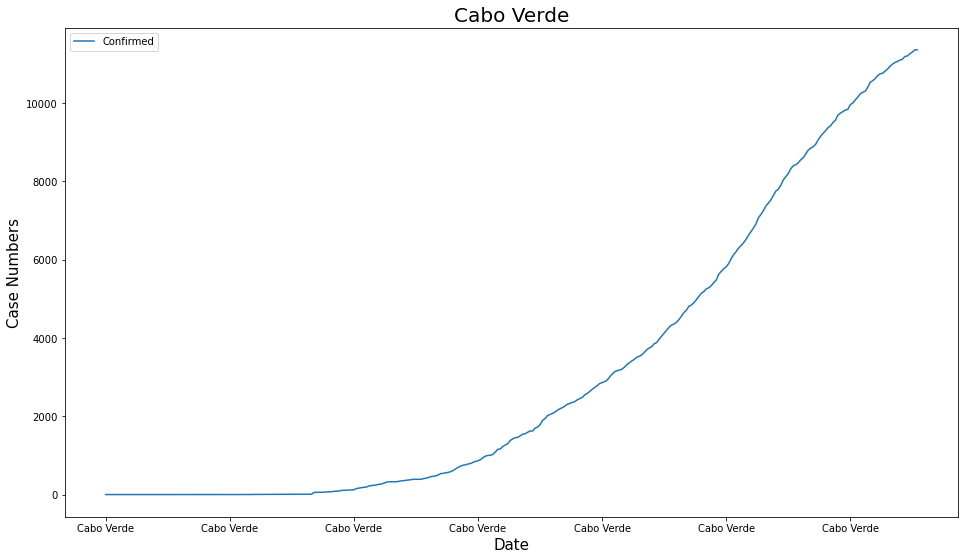

<Figure size 5760x2880 with 0 Axes>

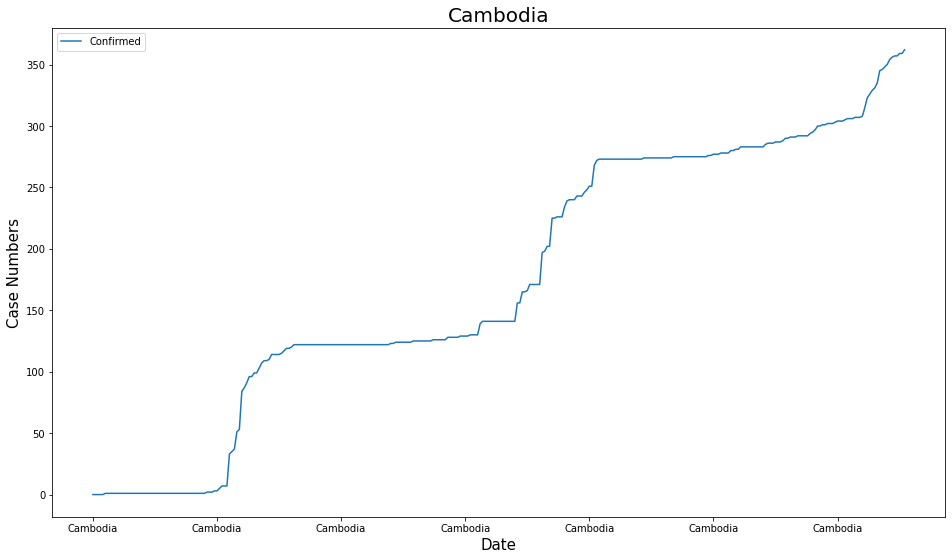

<Figure size 5760x2880 with 0 Axes>

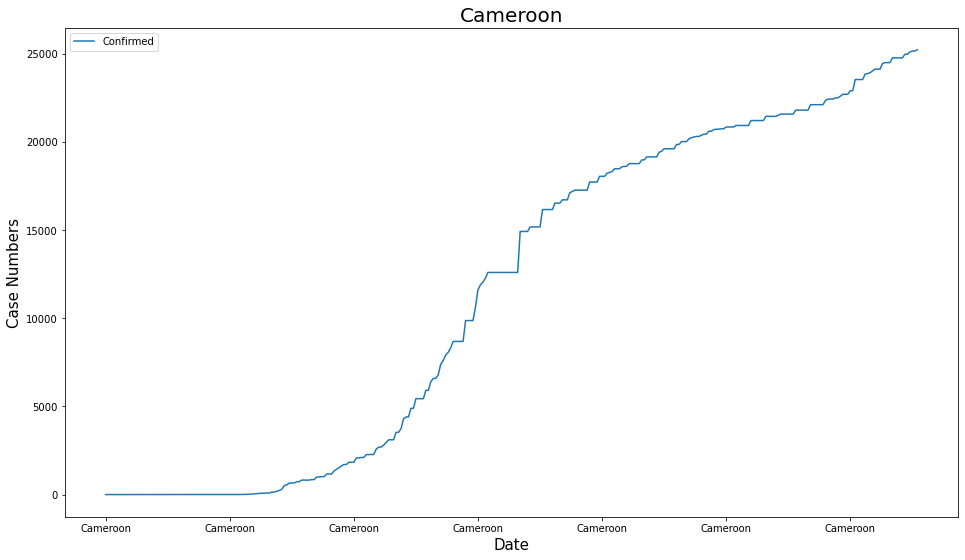

<Figure size 5760x2880 with 0 Axes>

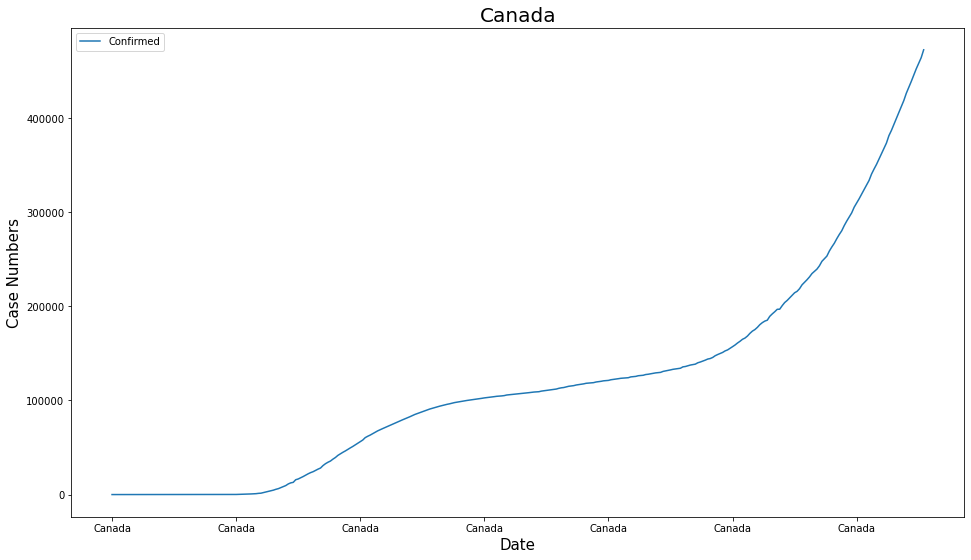

<Figure size 5760x2880 with 0 Axes>

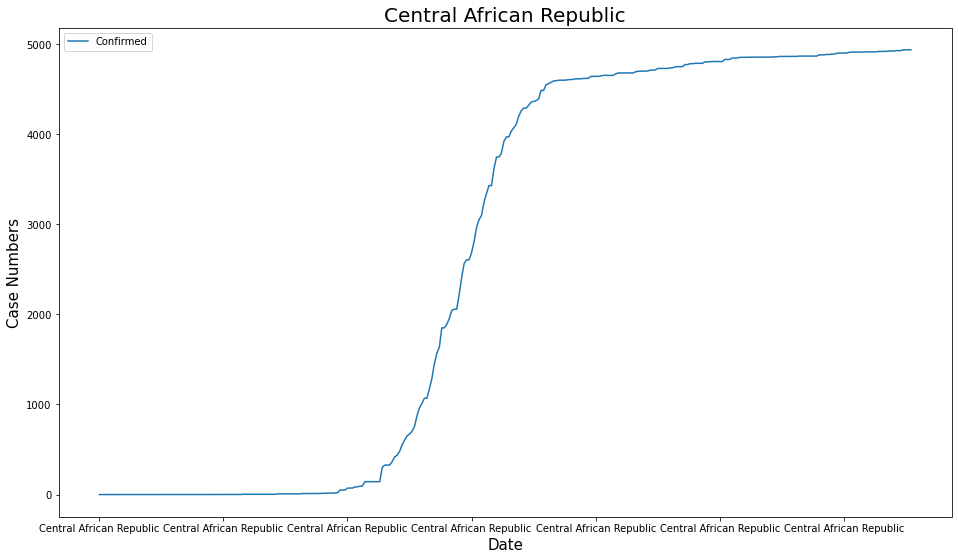

<Figure size 5760x2880 with 0 Axes>

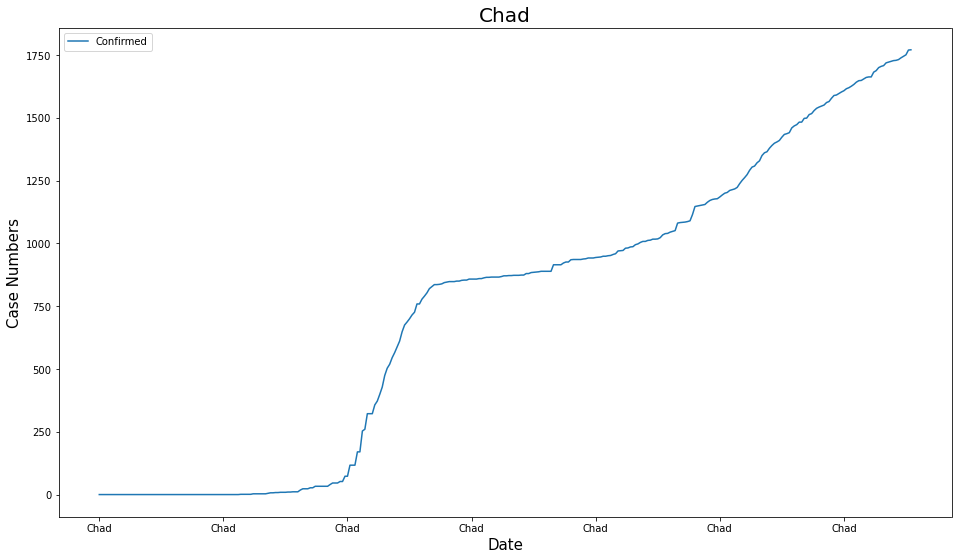

<Figure size 5760x2880 with 0 Axes>

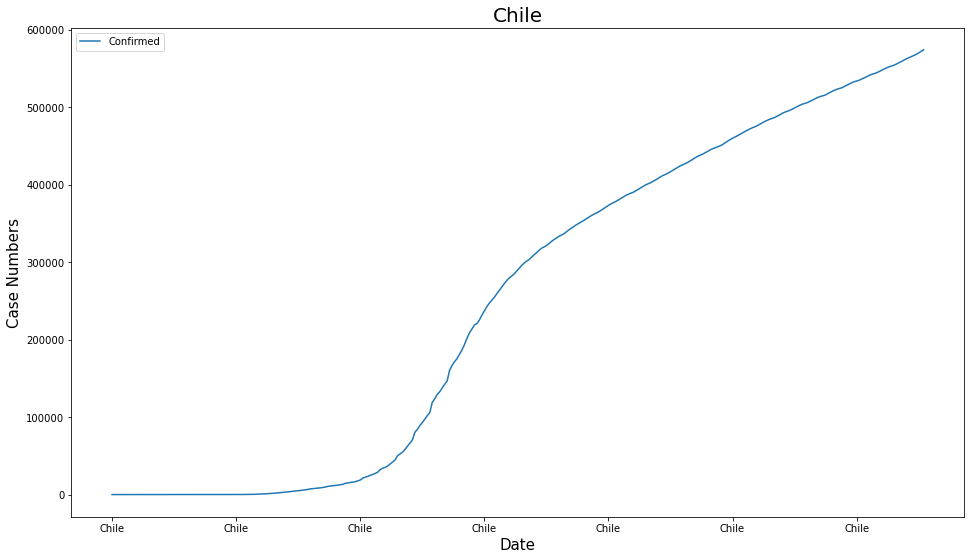

<Figure size 5760x2880 with 0 Axes>

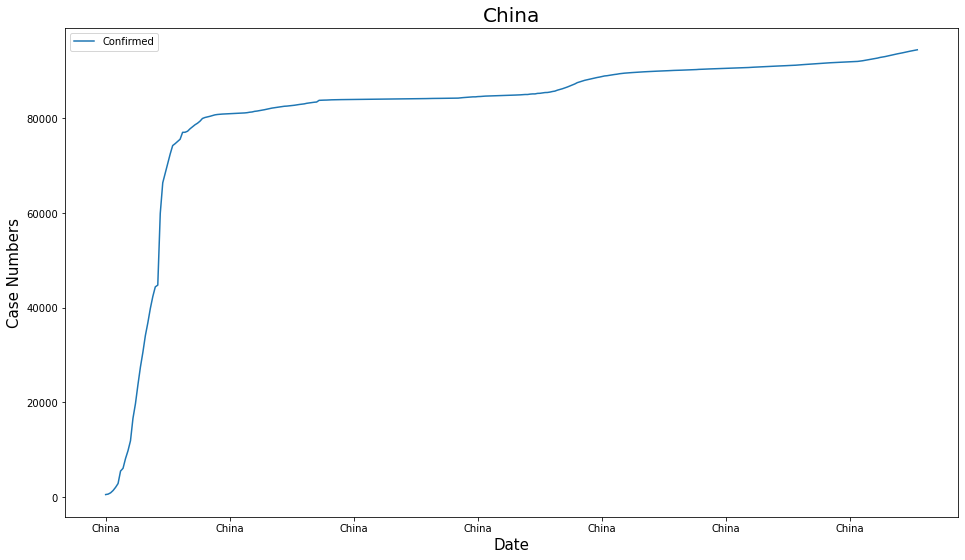

<Figure size 5760x2880 with 0 Axes>

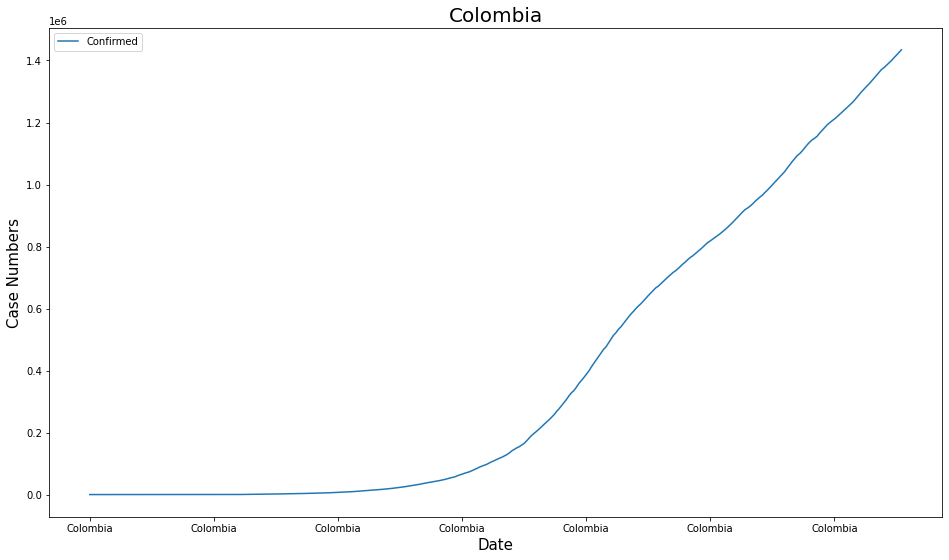

<Figure size 5760x2880 with 0 Axes>

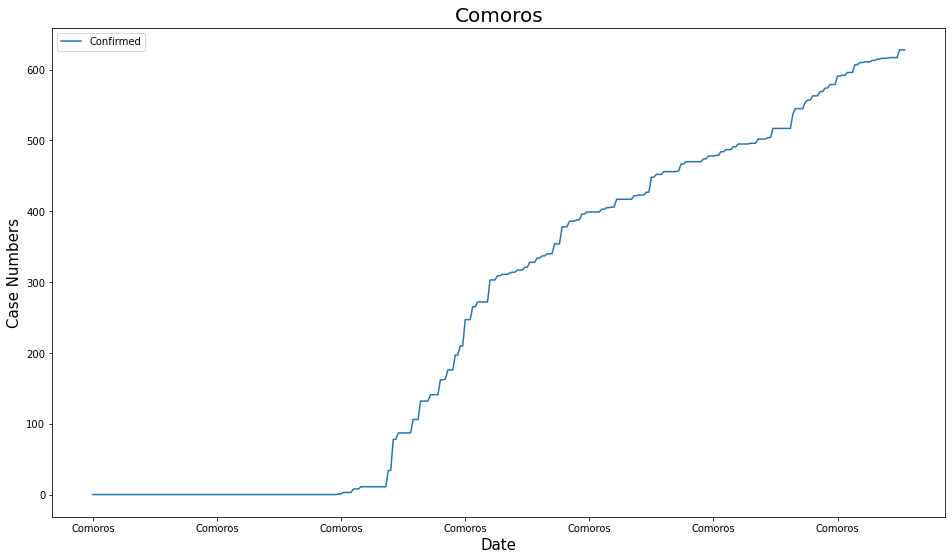

<Figure size 5760x2880 with 0 Axes>

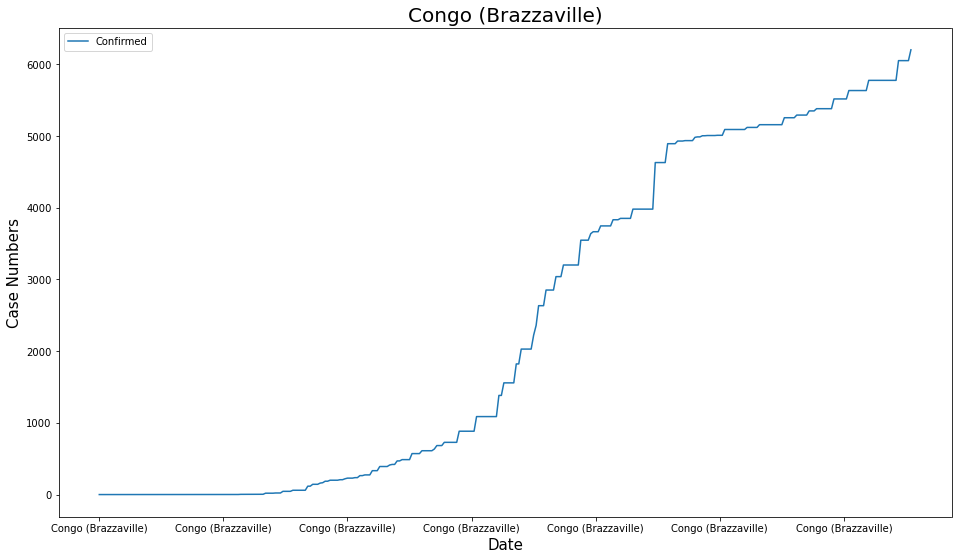

<Figure size 5760x2880 with 0 Axes>

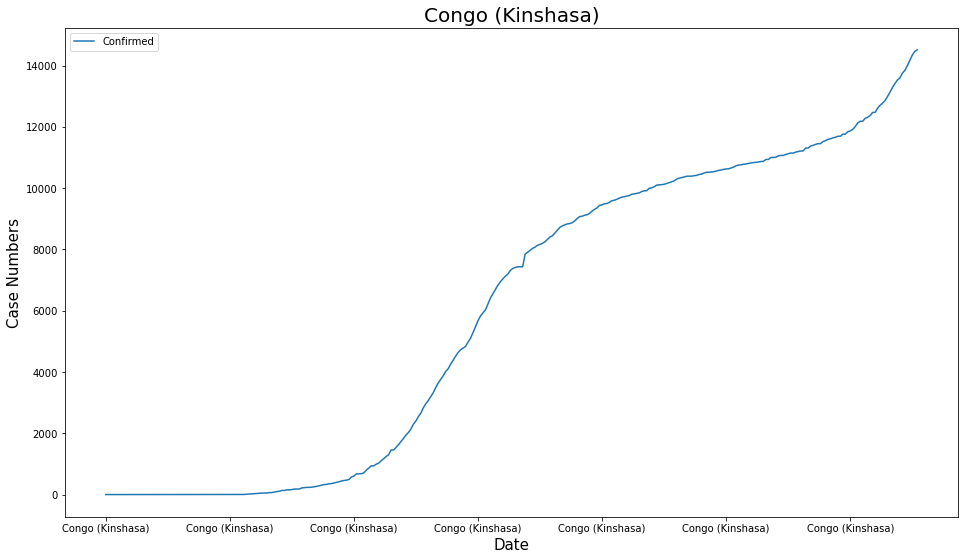

<Figure size 5760x2880 with 0 Axes>

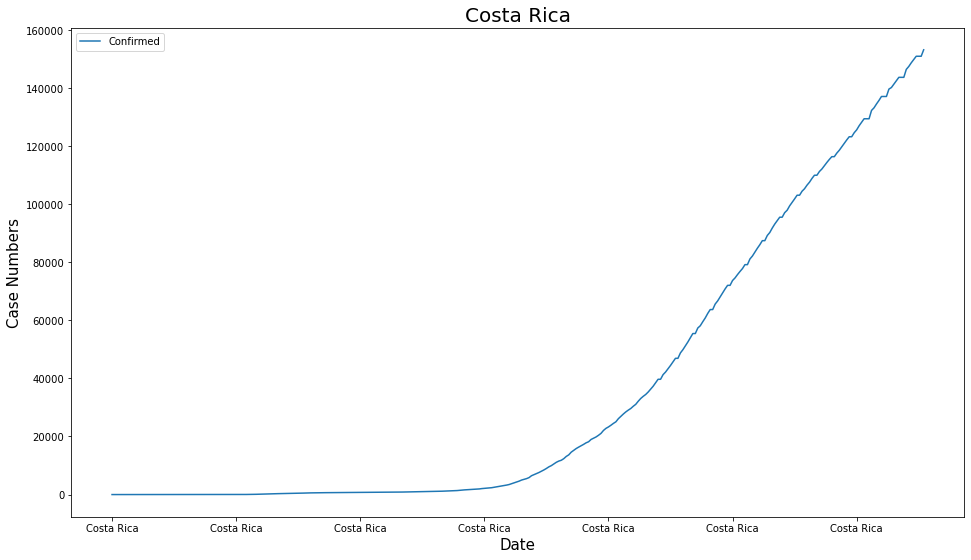

<Figure size 5760x2880 with 0 Axes>

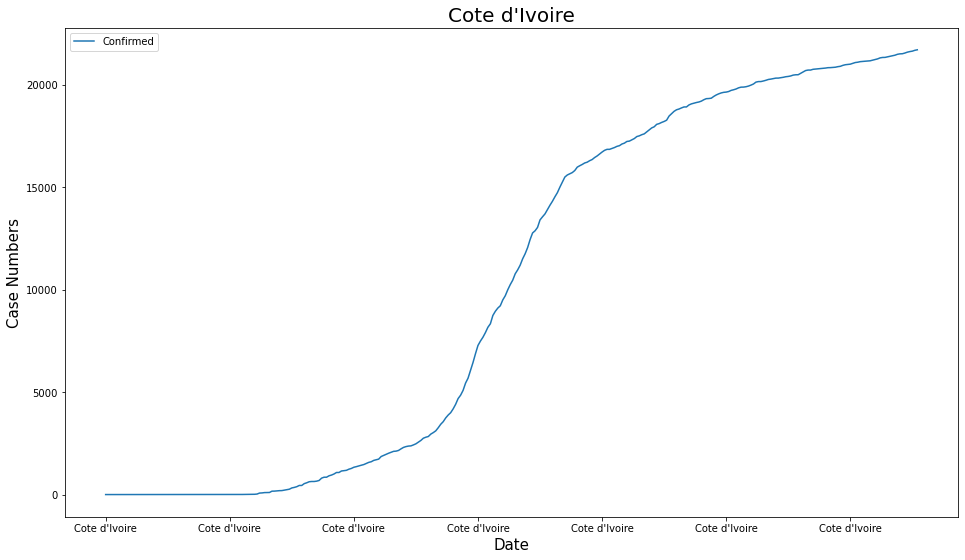

<Figure size 5760x2880 with 0 Axes>

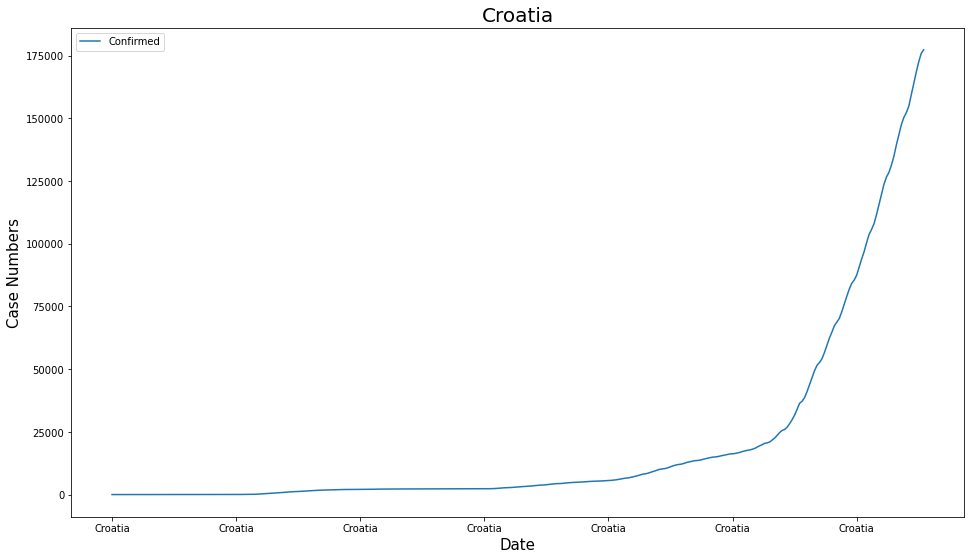

<Figure size 5760x2880 with 0 Axes>

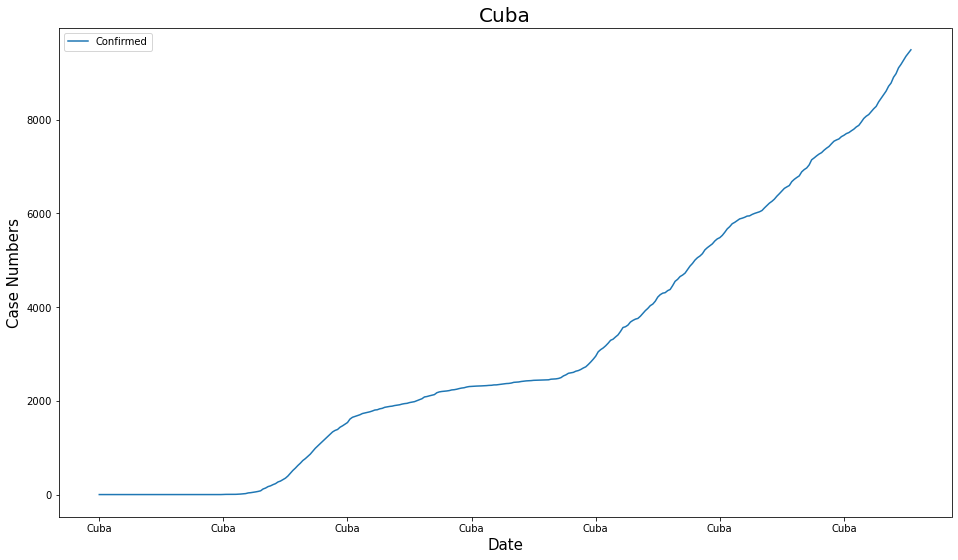

<Figure size 5760x2880 with 0 Axes>

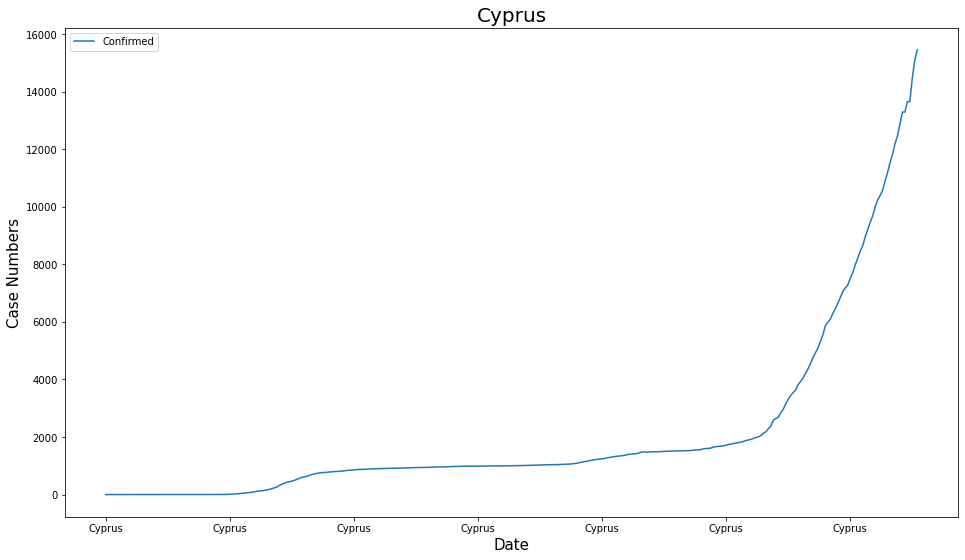

<Figure size 5760x2880 with 0 Axes>

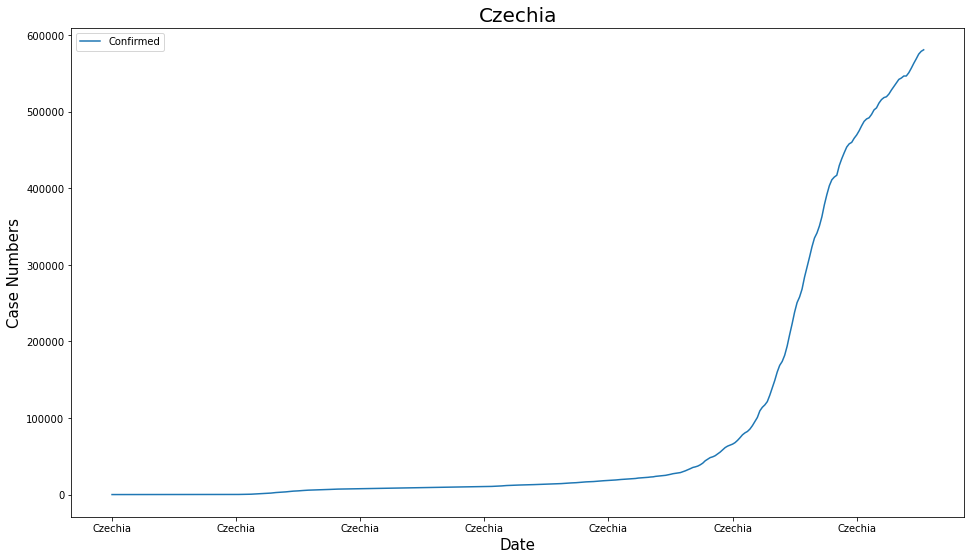

<Figure size 5760x2880 with 0 Axes>

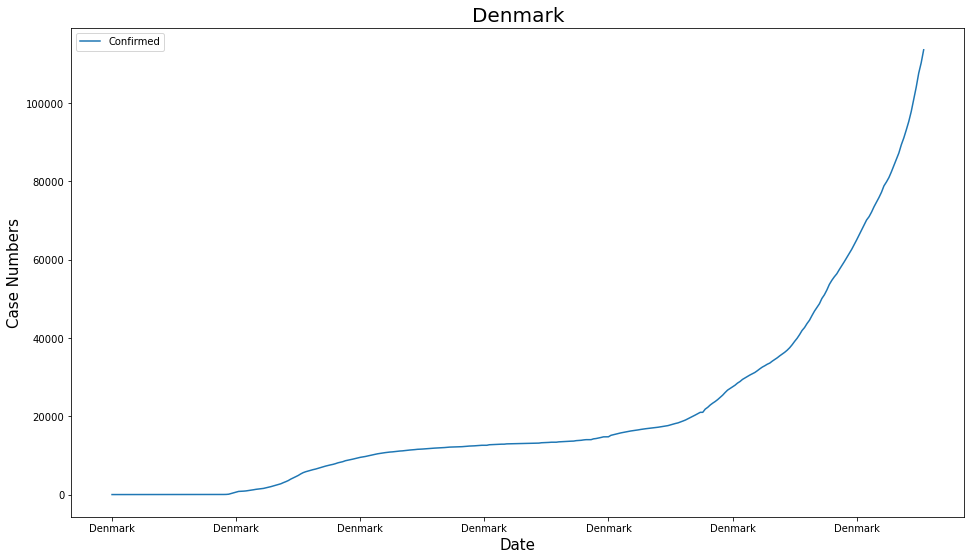

<Figure size 5760x2880 with 0 Axes>

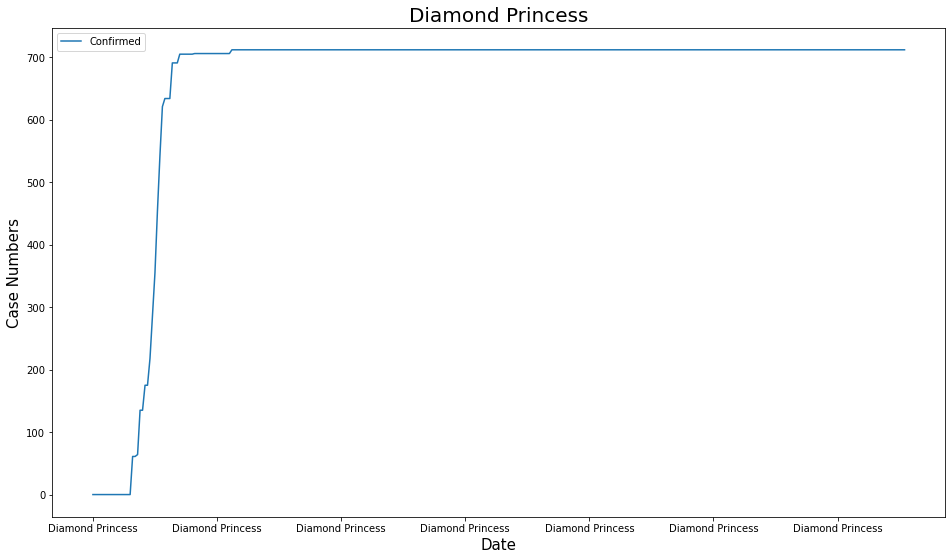

<Figure size 5760x2880 with 0 Axes>

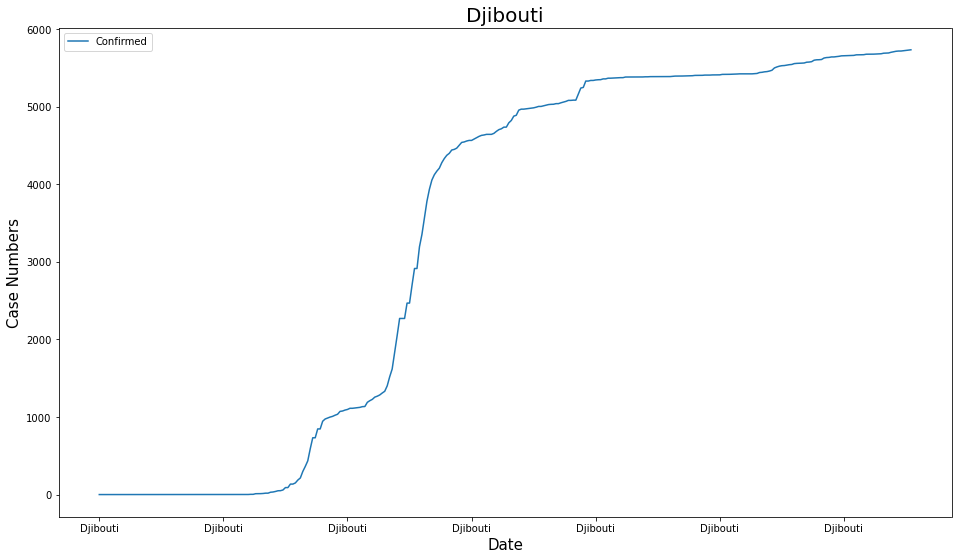

<Figure size 5760x2880 with 0 Axes>

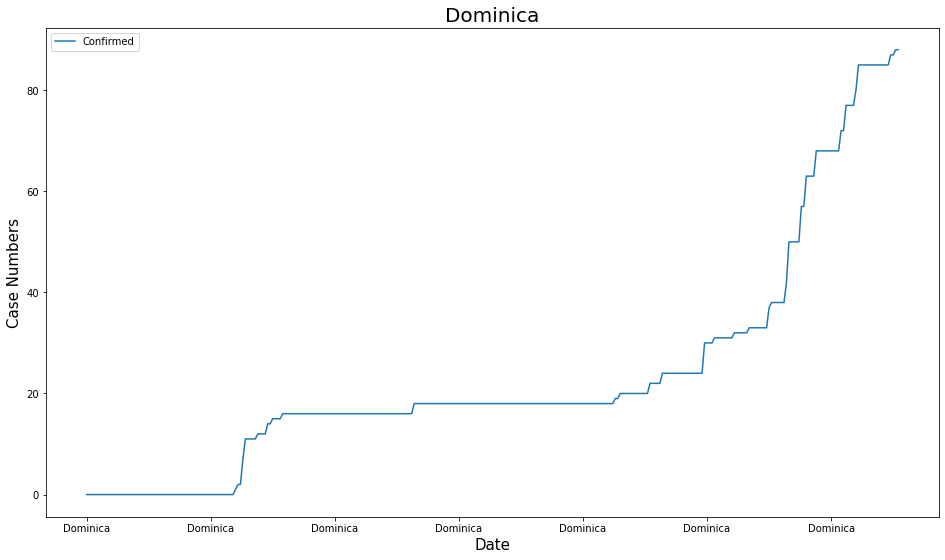

<Figure size 5760x2880 with 0 Axes>

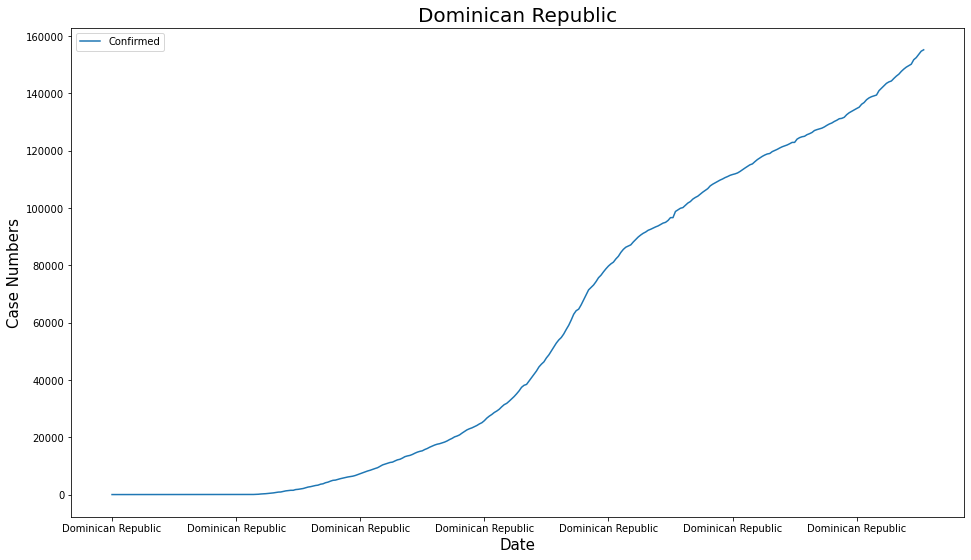

<Figure size 5760x2880 with 0 Axes>

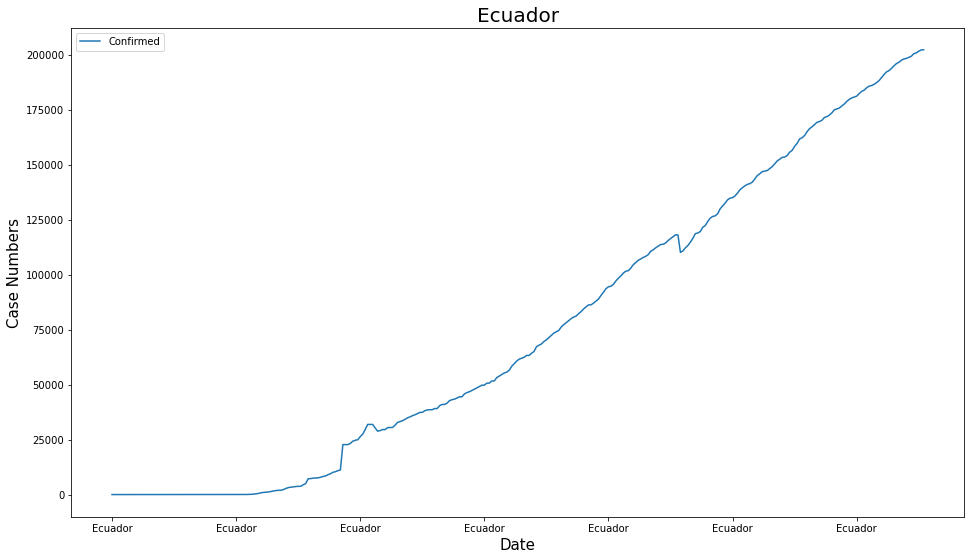

<Figure size 5760x2880 with 0 Axes>

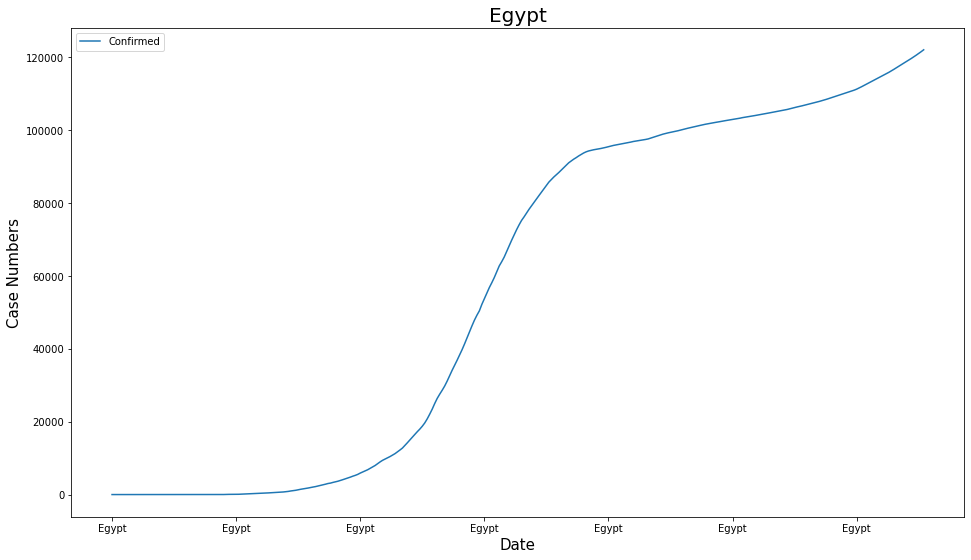

<Figure size 5760x2880 with 0 Axes>

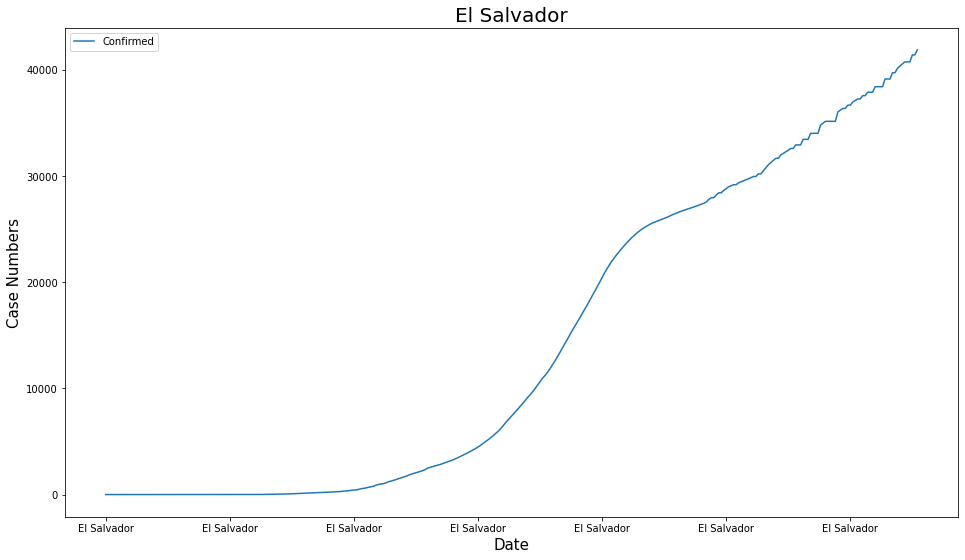

<Figure size 5760x2880 with 0 Axes>

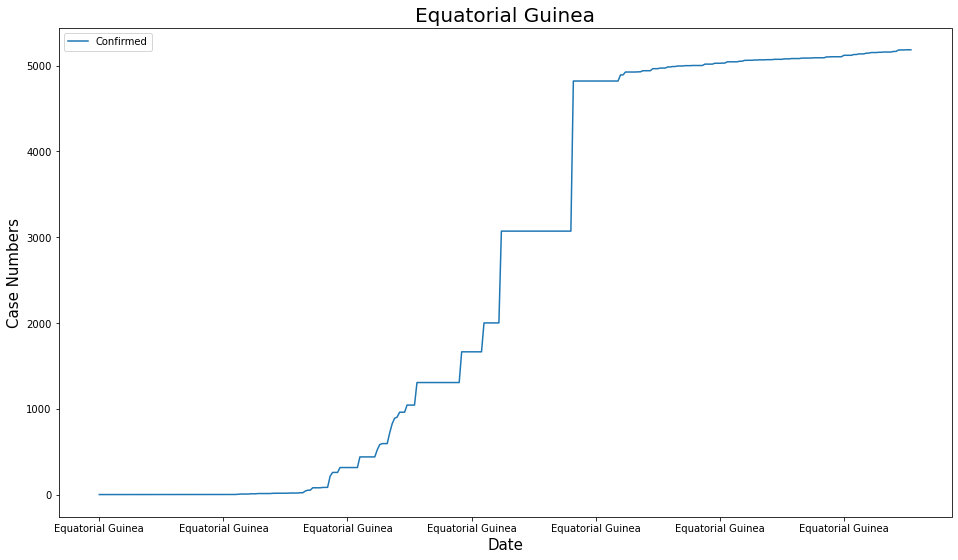

<Figure size 5760x2880 with 0 Axes>

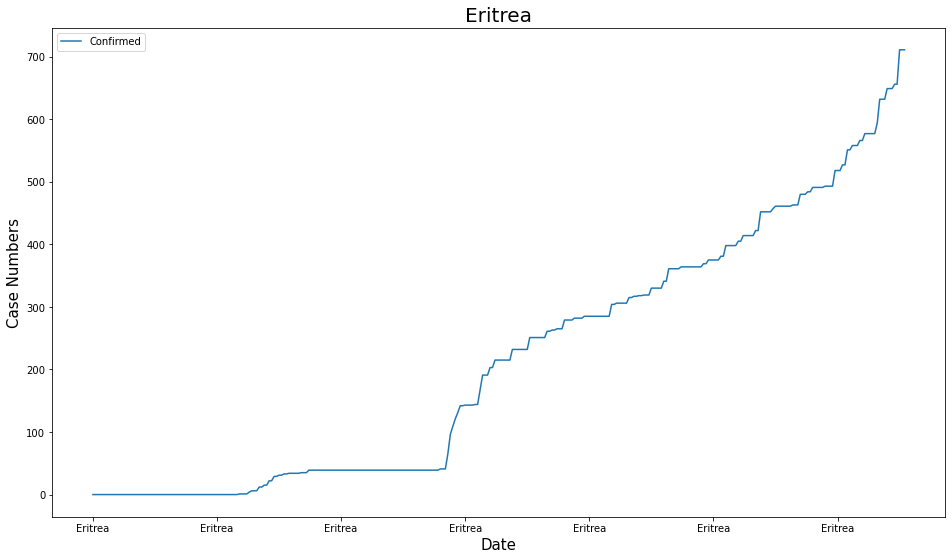

<Figure size 5760x2880 with 0 Axes>

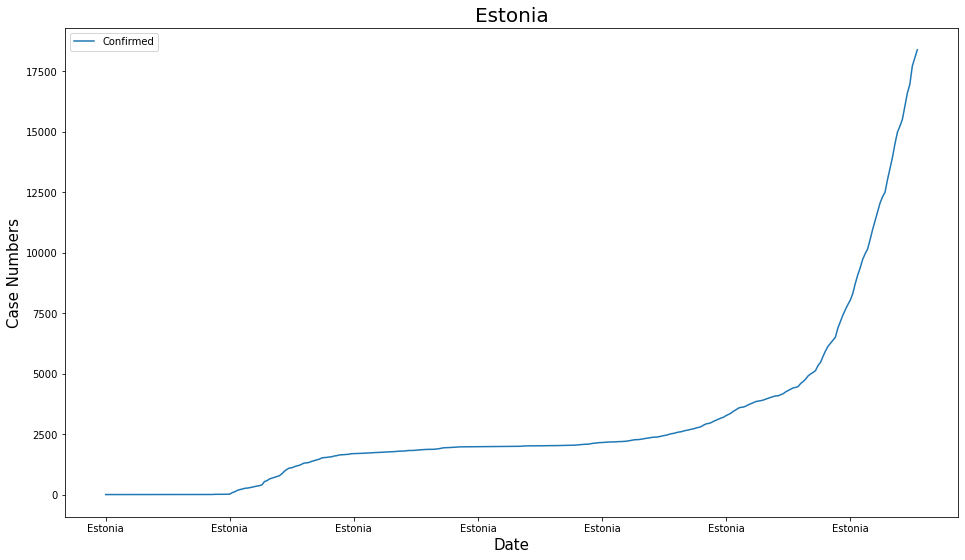

<Figure size 5760x2880 with 0 Axes>

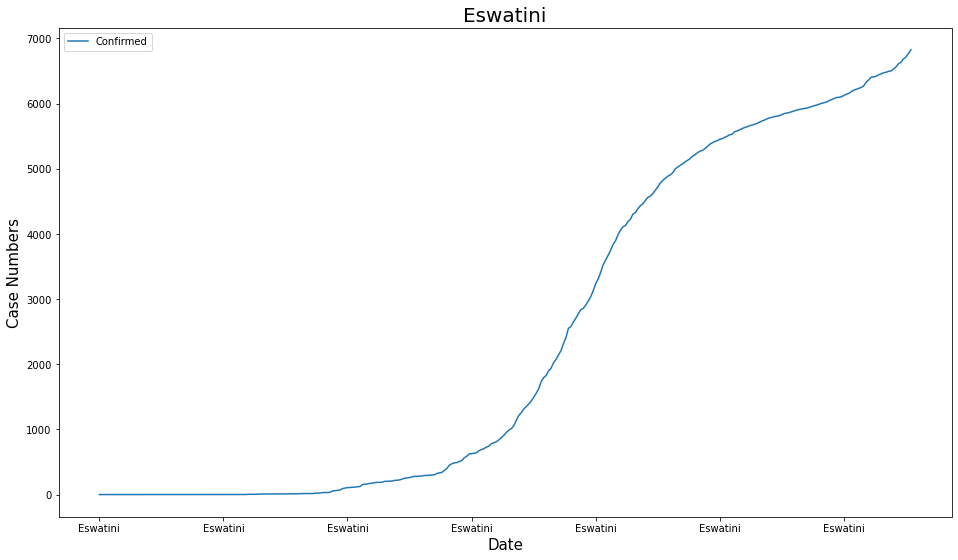

<Figure size 5760x2880 with 0 Axes>

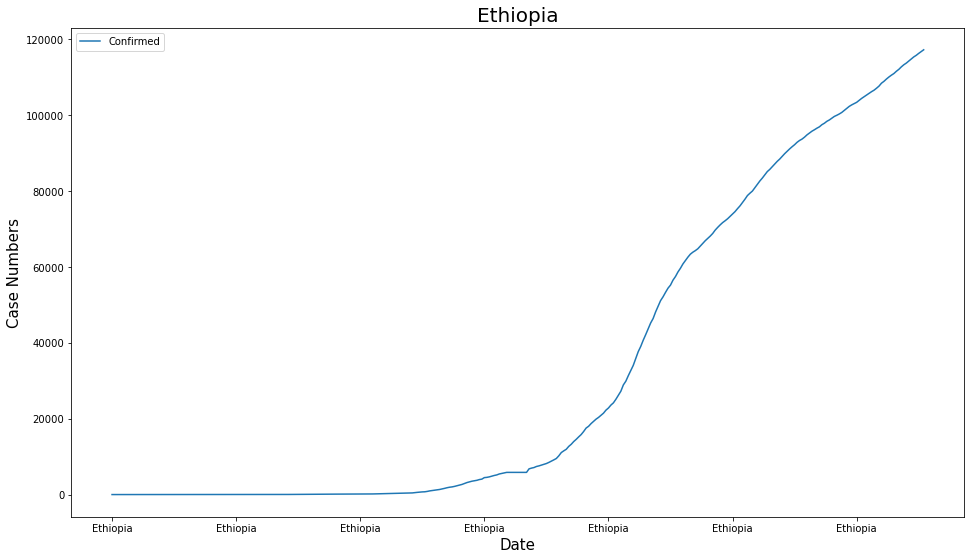

<Figure size 5760x2880 with 0 Axes>

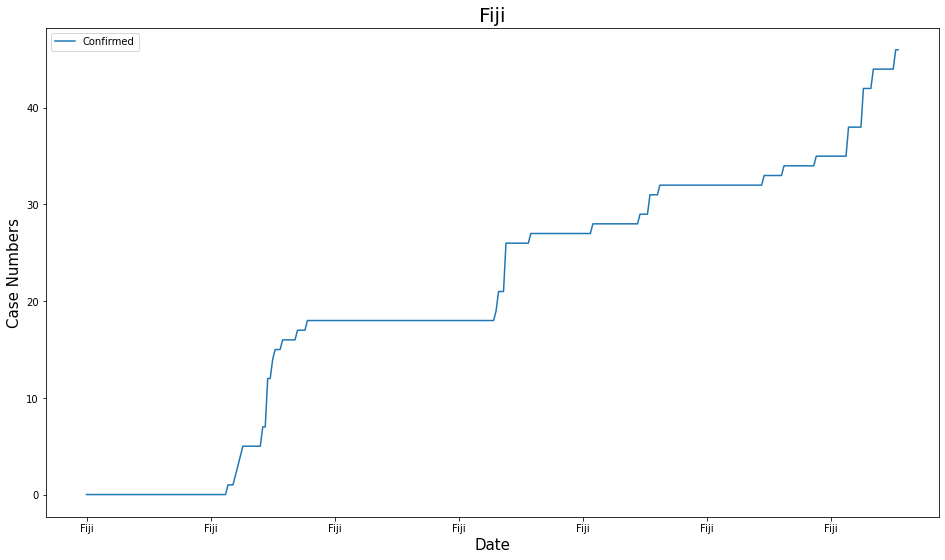

<Figure size 5760x2880 with 0 Axes>

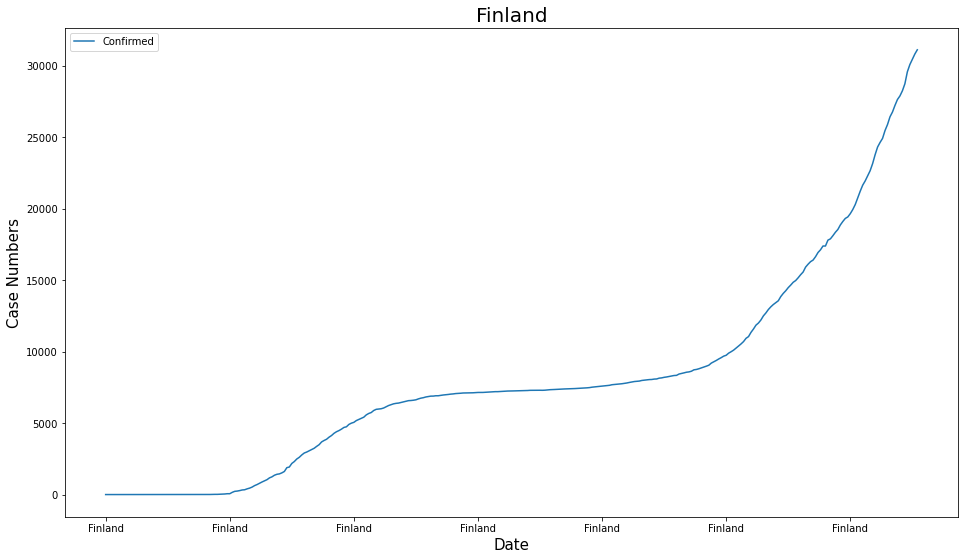

<Figure size 5760x2880 with 0 Axes>

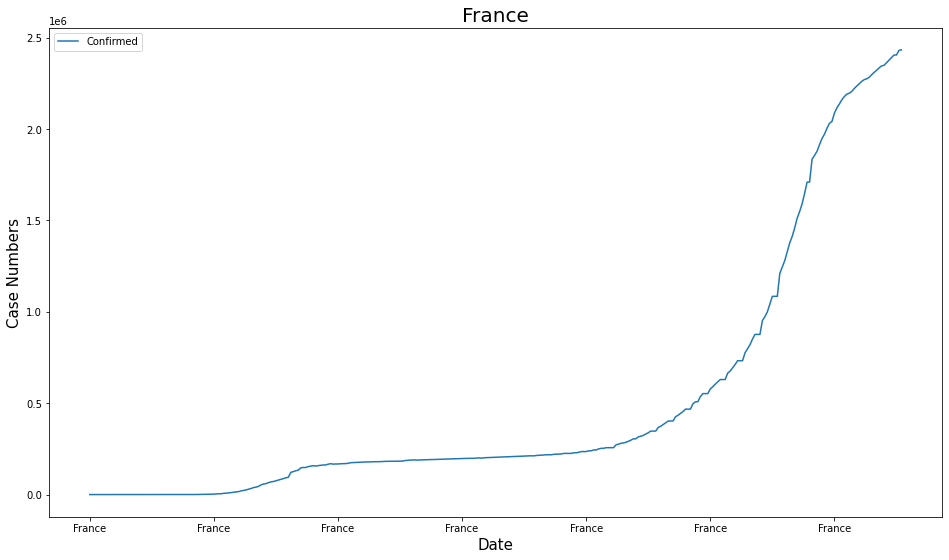

<Figure size 5760x2880 with 0 Axes>

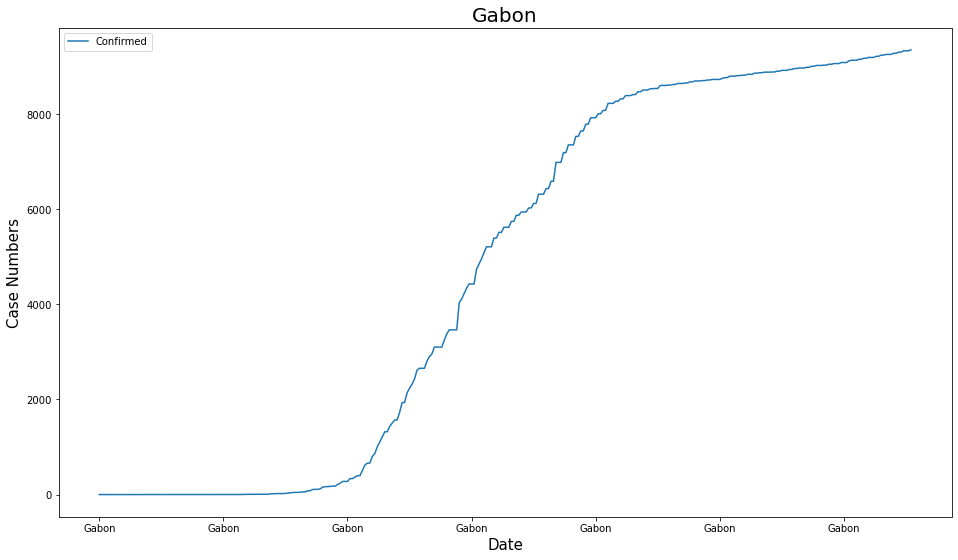

<Figure size 5760x2880 with 0 Axes>

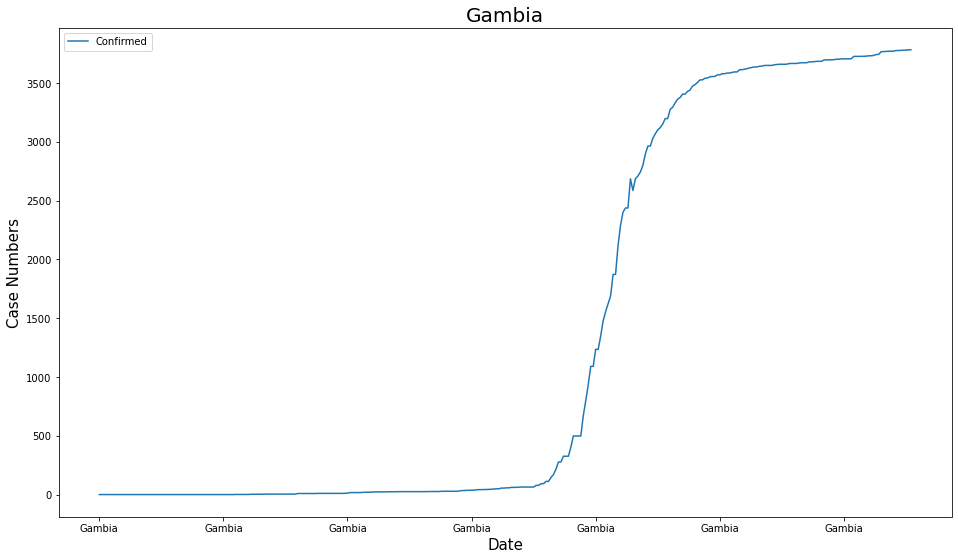

<Figure size 5760x2880 with 0 Axes>

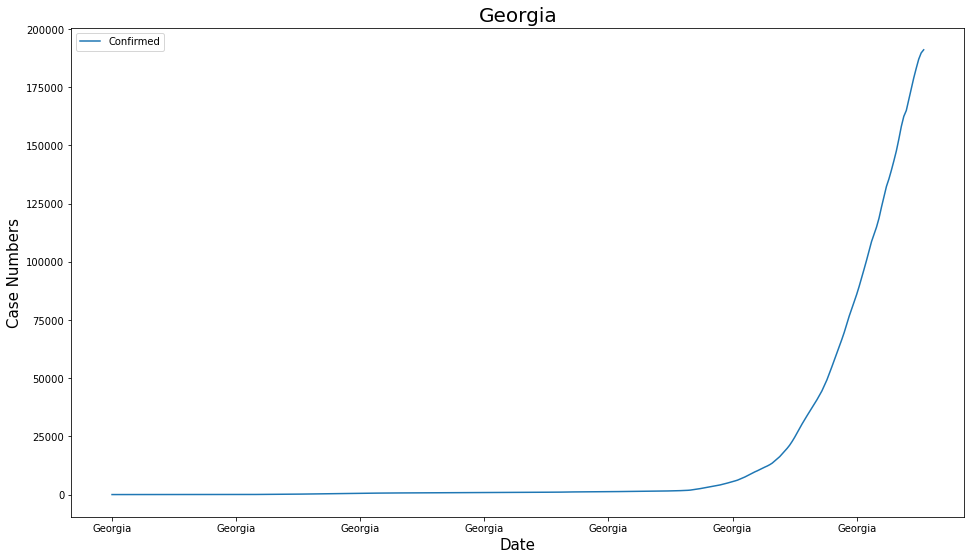

<Figure size 5760x2880 with 0 Axes>

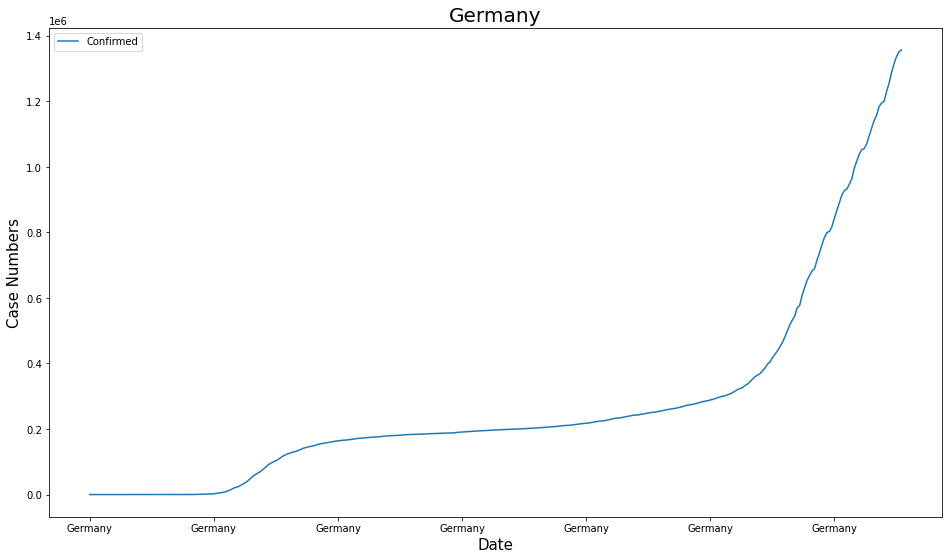

<Figure size 5760x2880 with 0 Axes>

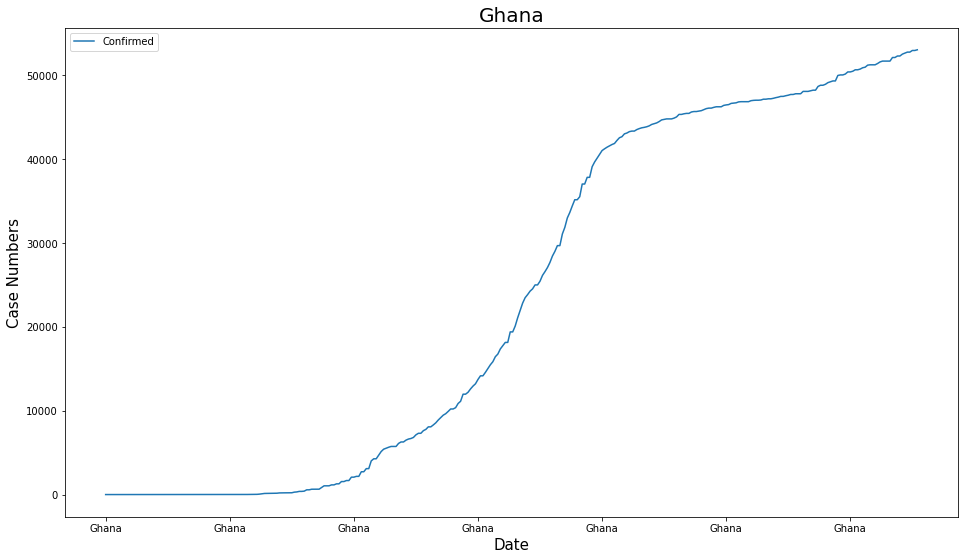

<Figure size 5760x2880 with 0 Axes>

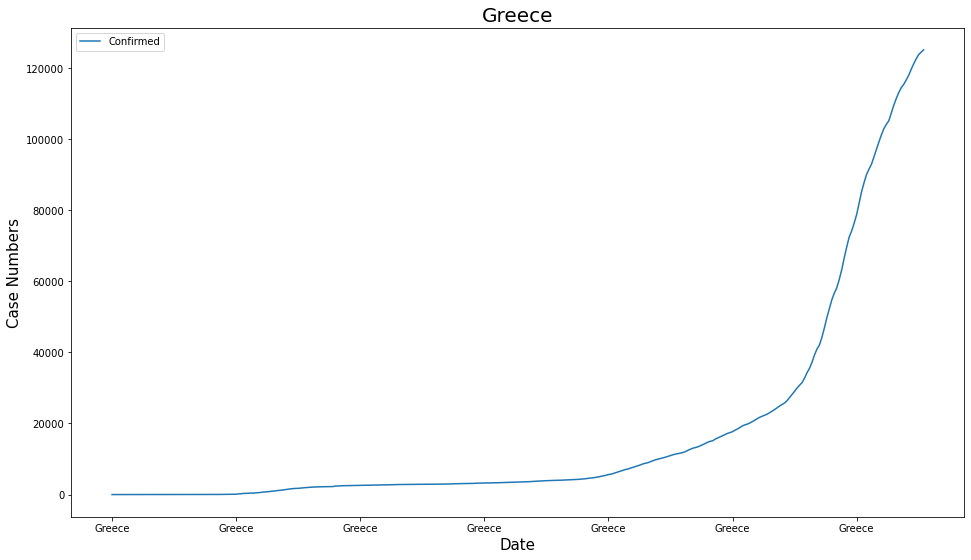

<Figure size 5760x2880 with 0 Axes>

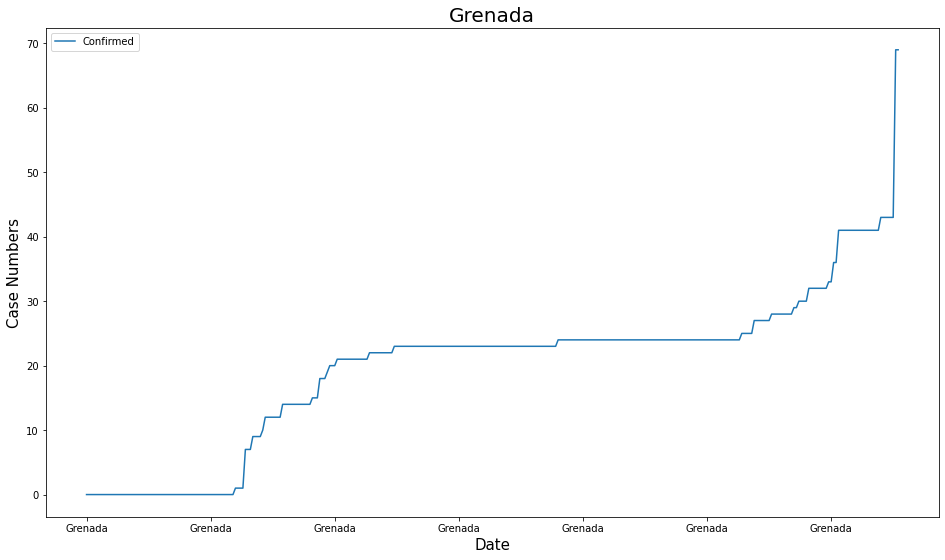

<Figure size 5760x2880 with 0 Axes>

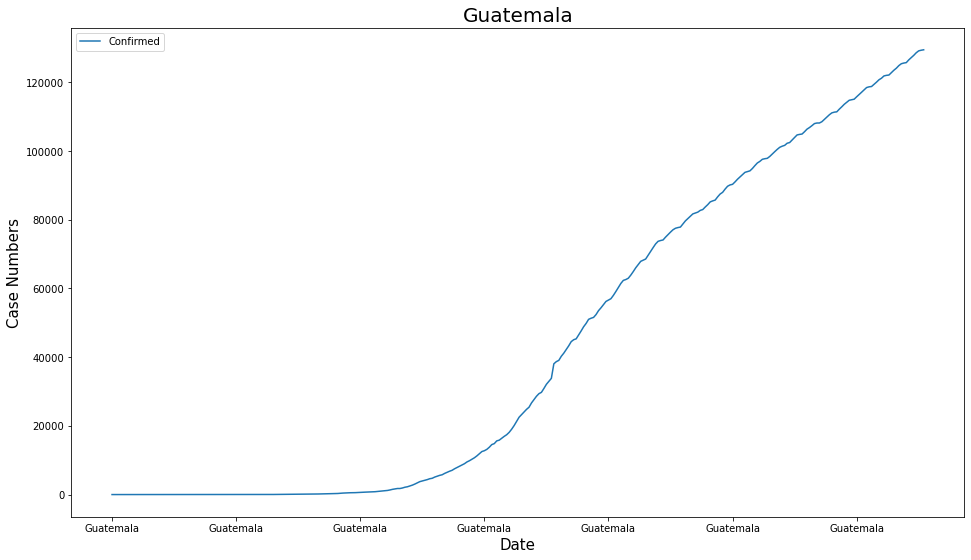

<Figure size 5760x2880 with 0 Axes>

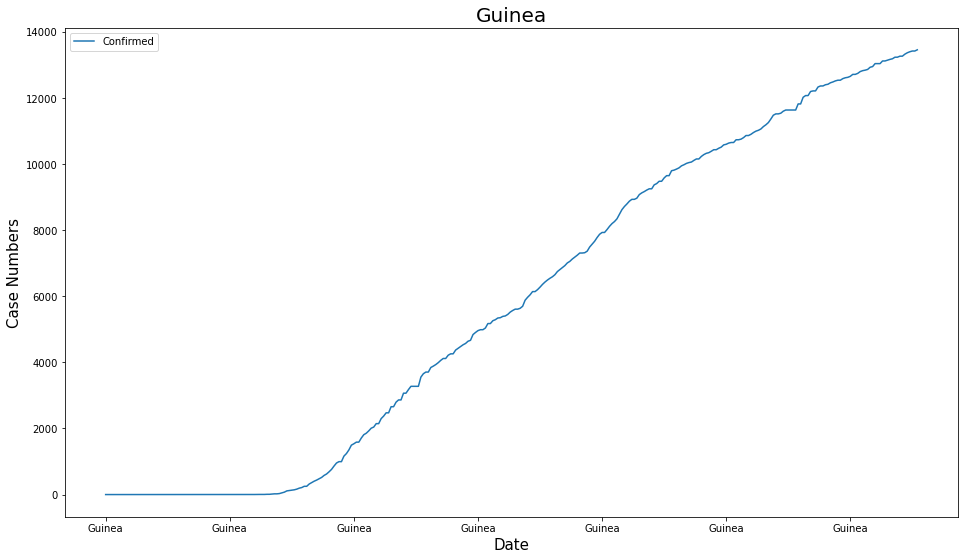

<Figure size 5760x2880 with 0 Axes>

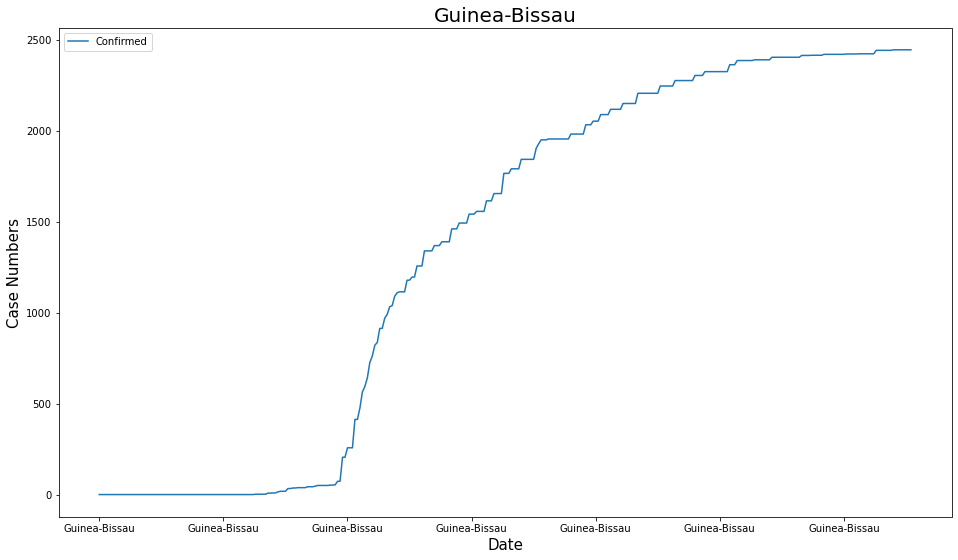

<Figure size 5760x2880 with 0 Axes>

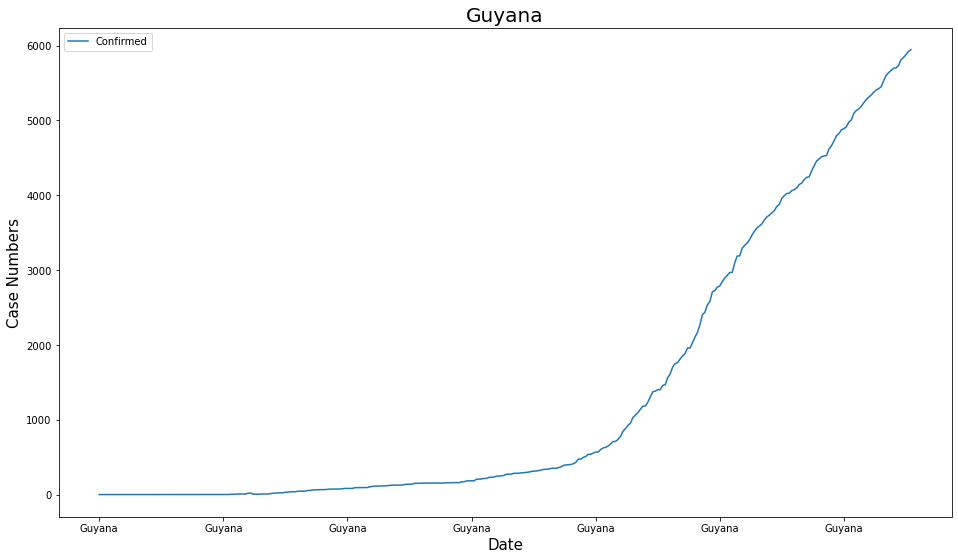

<Figure size 5760x2880 with 0 Axes>

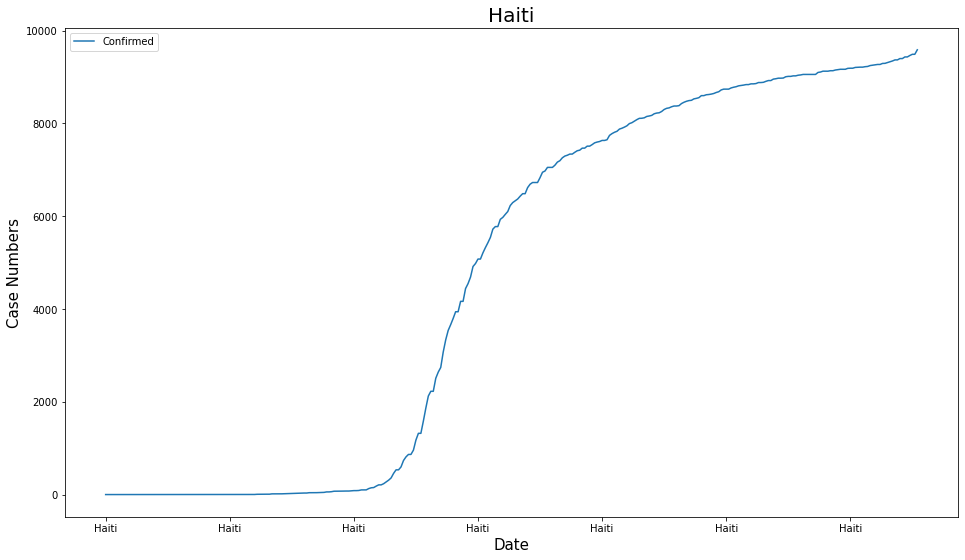

<Figure size 5760x2880 with 0 Axes>

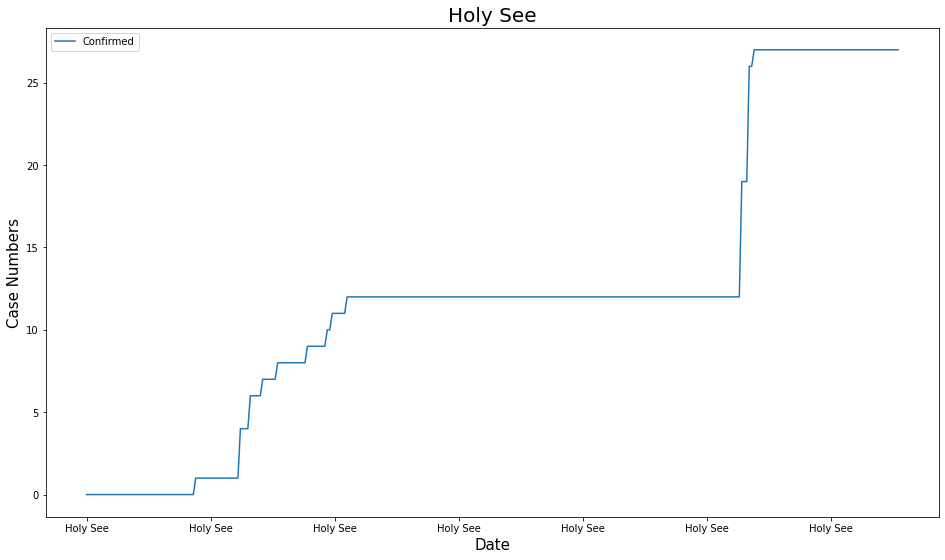

<Figure size 5760x2880 with 0 Axes>

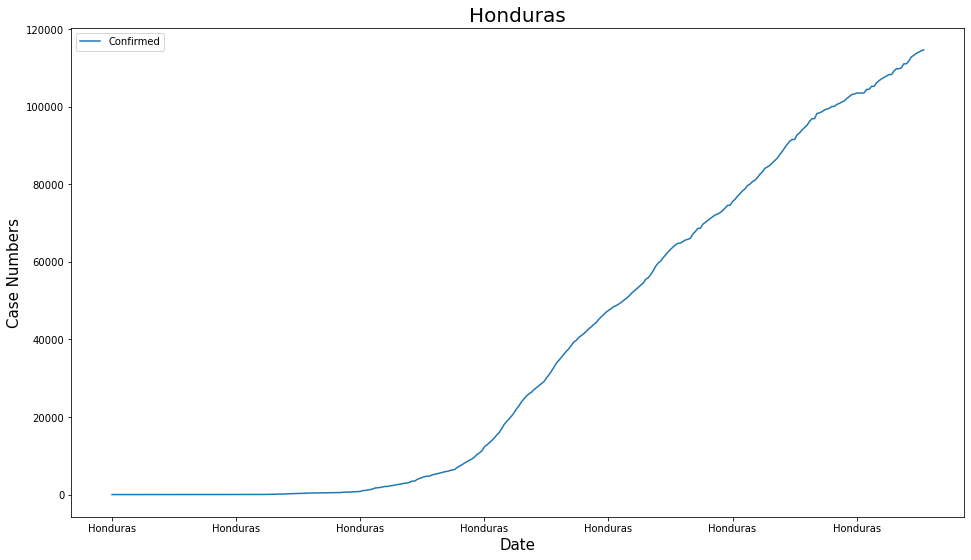

<Figure size 5760x2880 with 0 Axes>

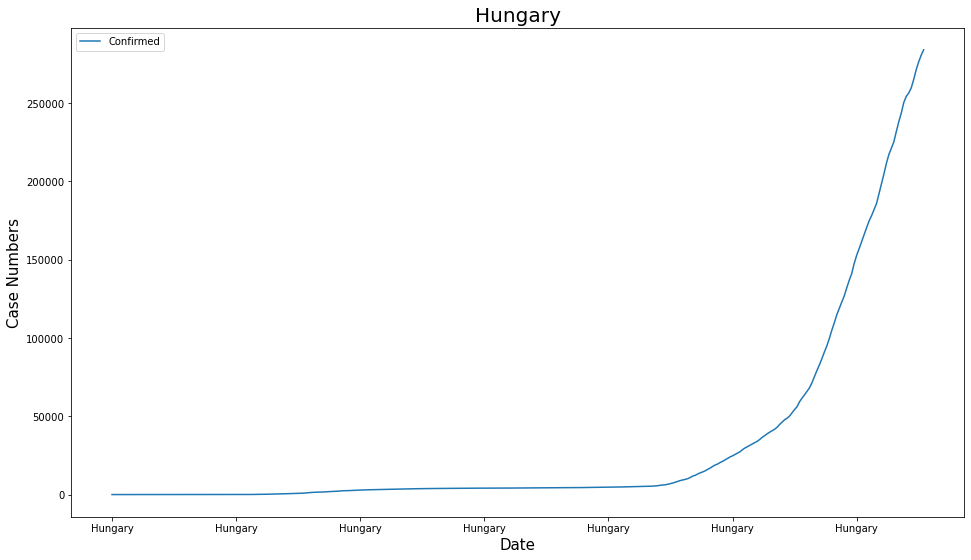

<Figure size 5760x2880 with 0 Axes>

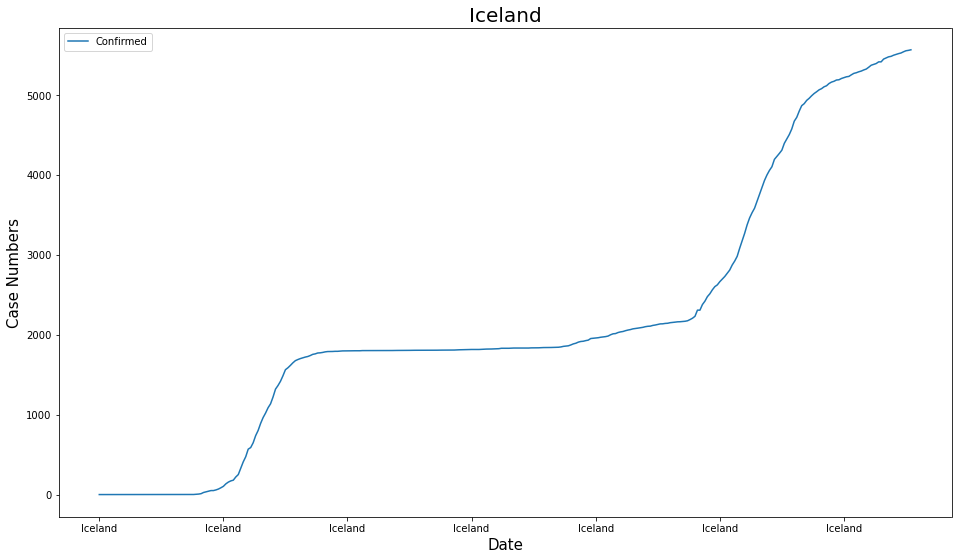

<Figure size 5760x2880 with 0 Axes>

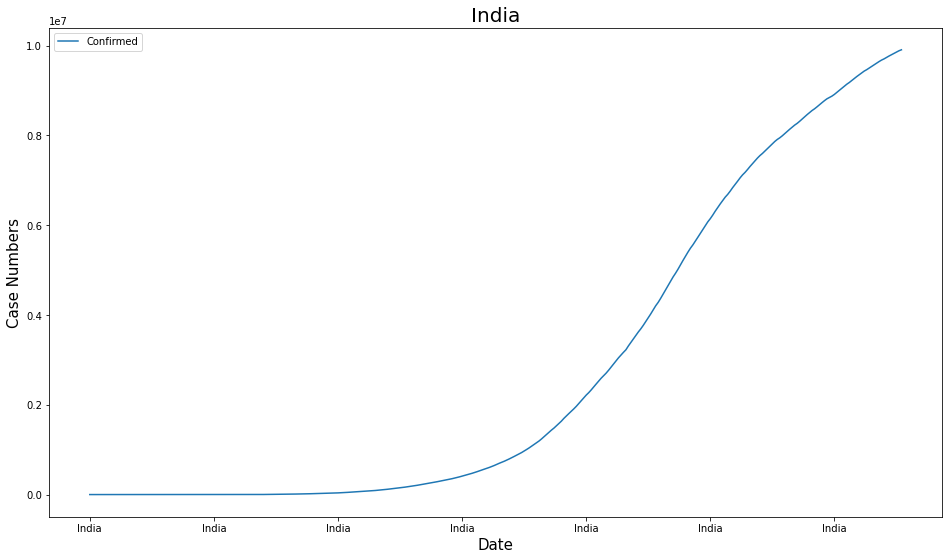

<Figure size 5760x2880 with 0 Axes>

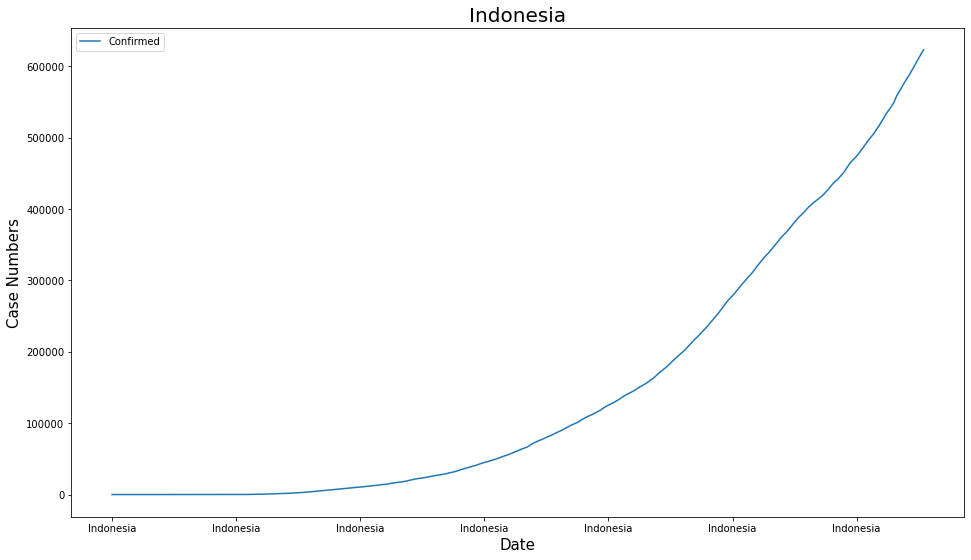

<Figure size 5760x2880 with 0 Axes>

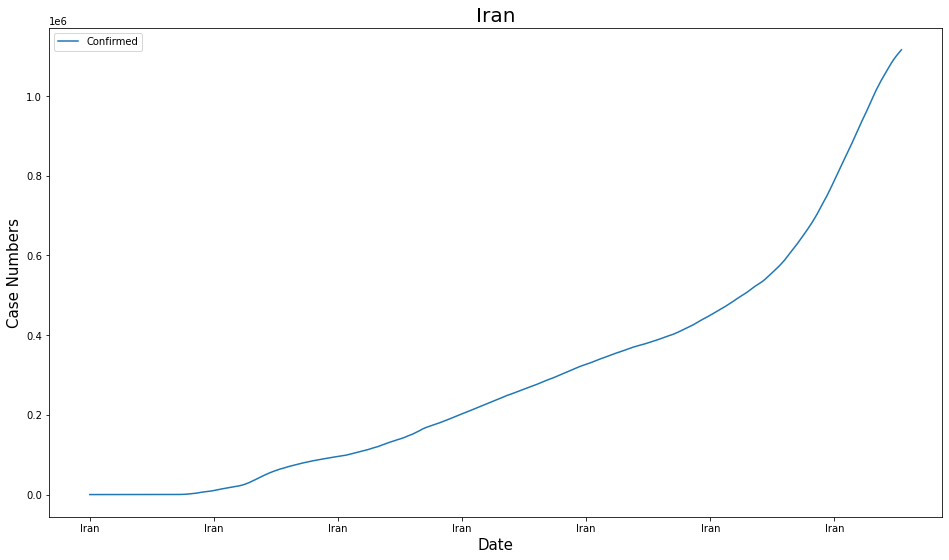

<Figure size 5760x2880 with 0 Axes>

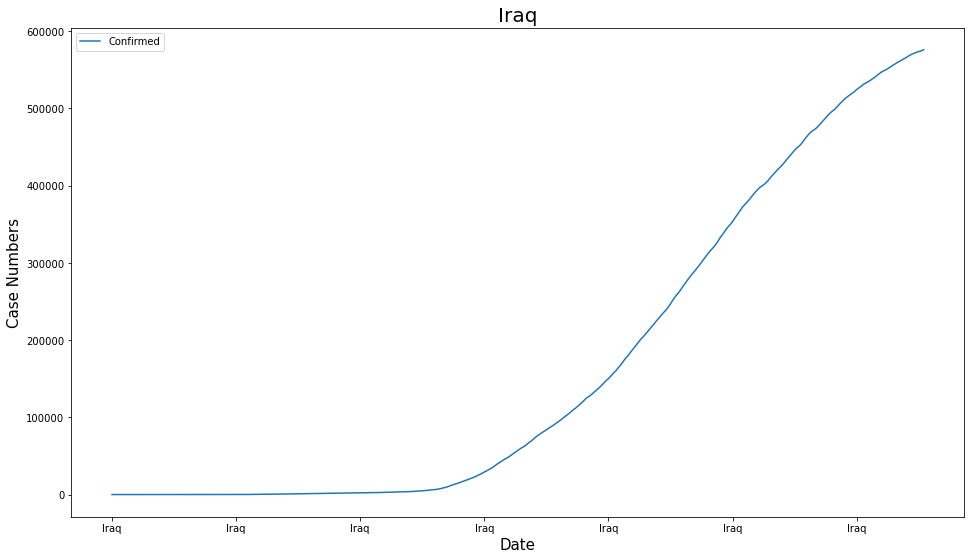

<Figure size 5760x2880 with 0 Axes>

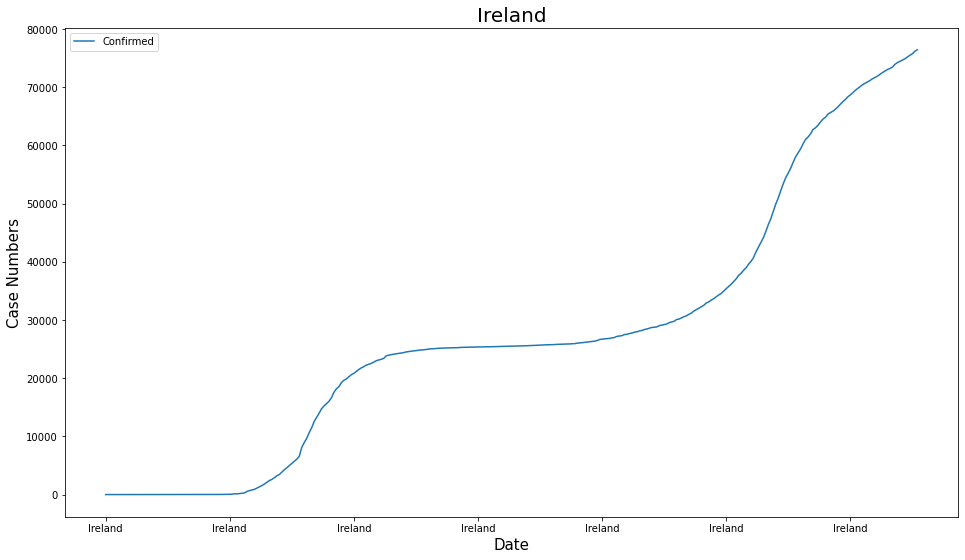

<Figure size 5760x2880 with 0 Axes>

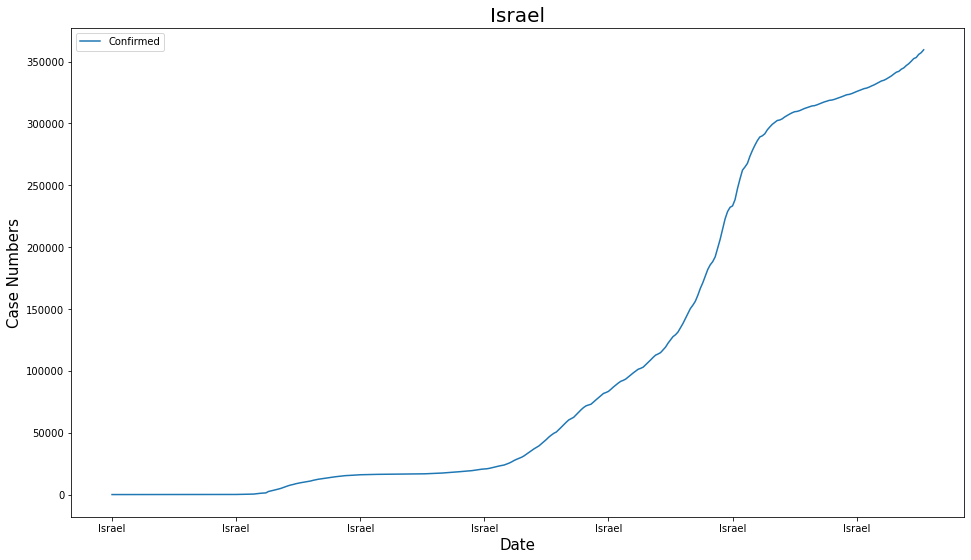

<Figure size 5760x2880 with 0 Axes>

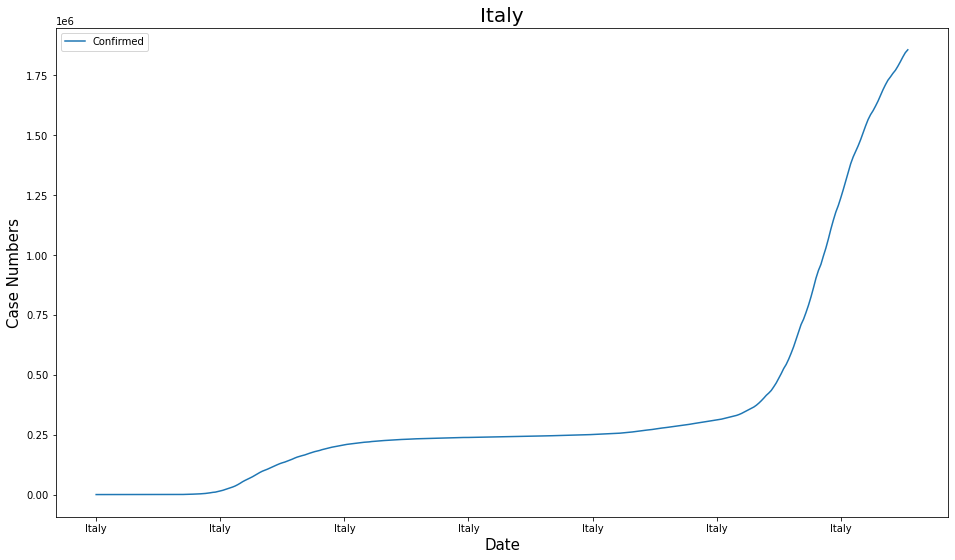

<Figure size 5760x2880 with 0 Axes>

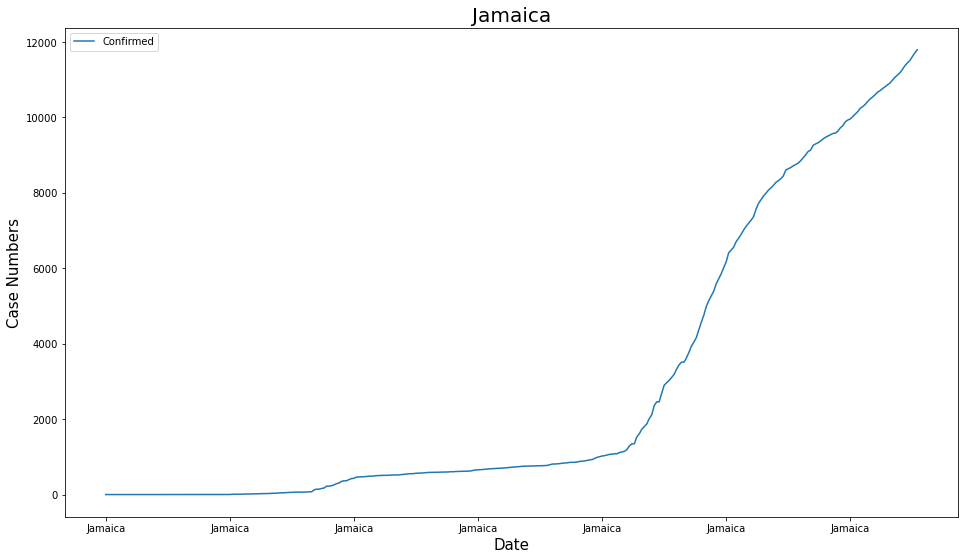

<Figure size 5760x2880 with 0 Axes>

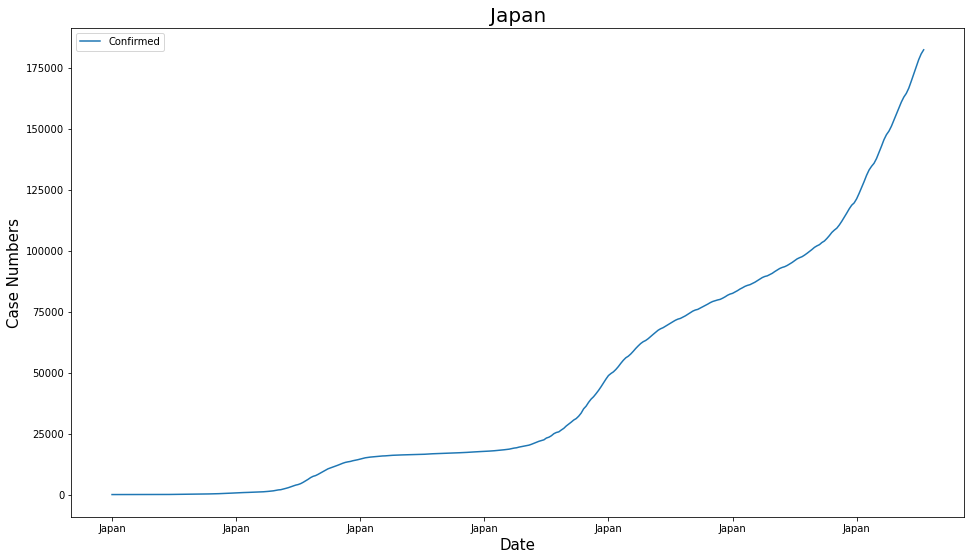

<Figure size 5760x2880 with 0 Axes>

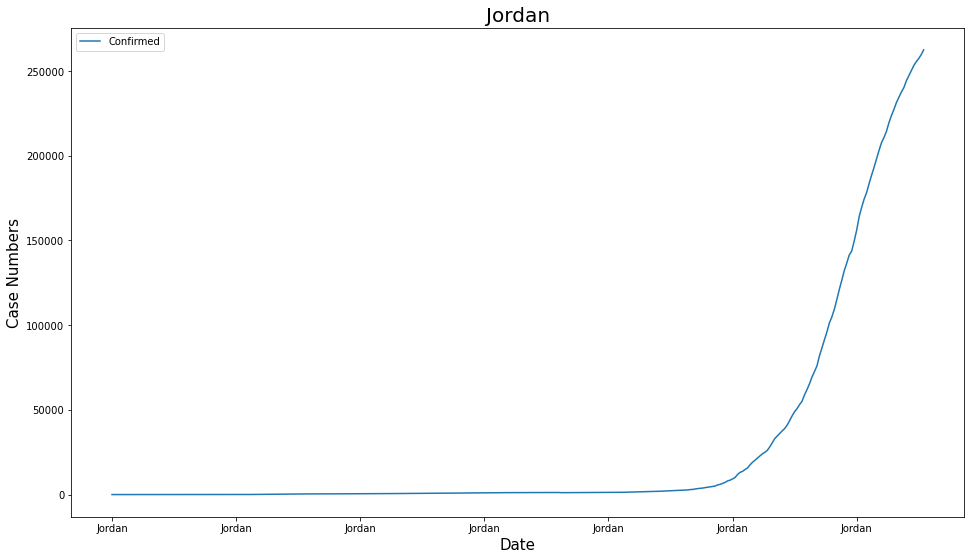

<Figure size 5760x2880 with 0 Axes>

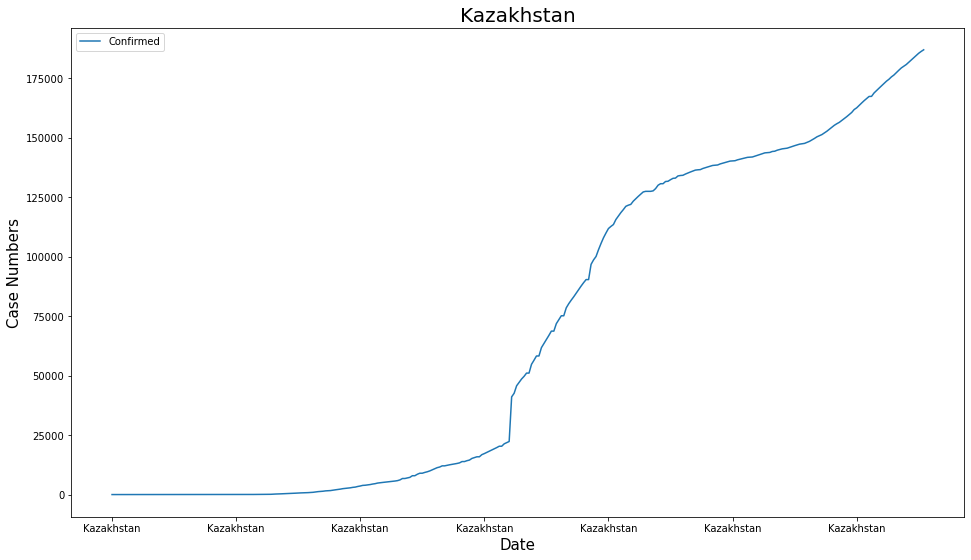

<Figure size 5760x2880 with 0 Axes>

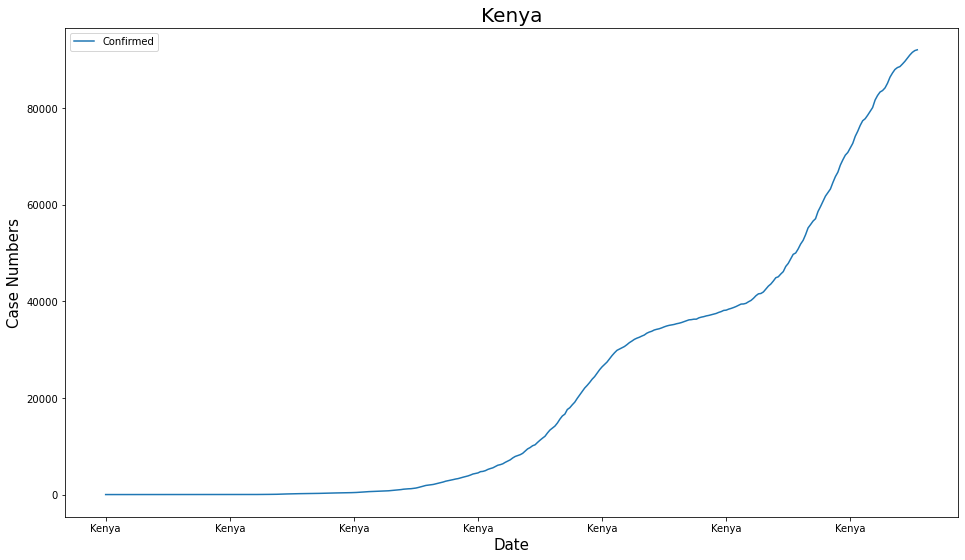

<Figure size 5760x2880 with 0 Axes>

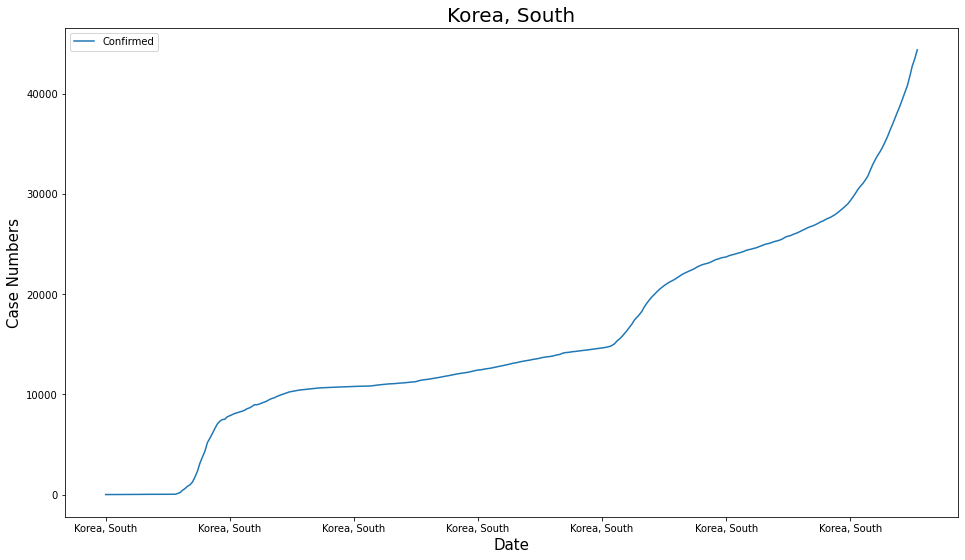

<Figure size 5760x2880 with 0 Axes>

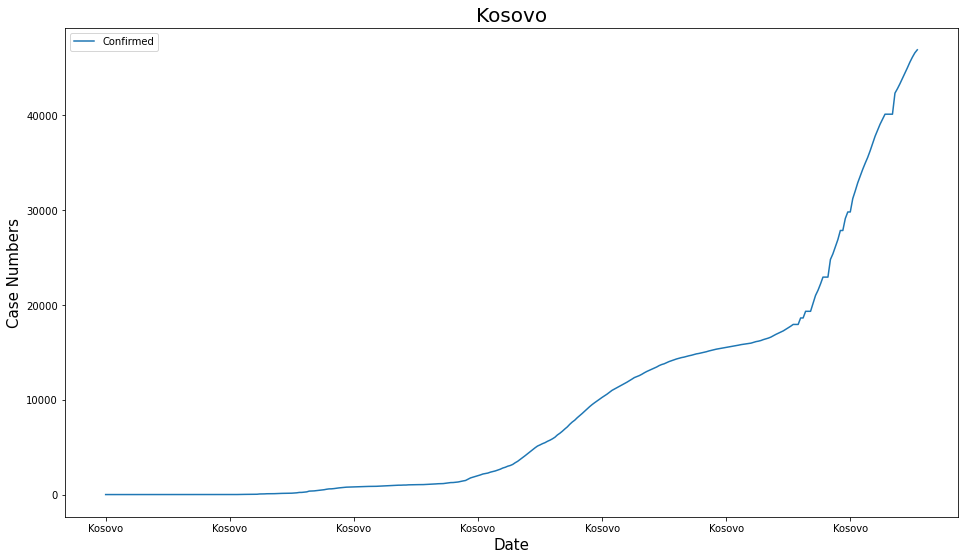

<Figure size 5760x2880 with 0 Axes>

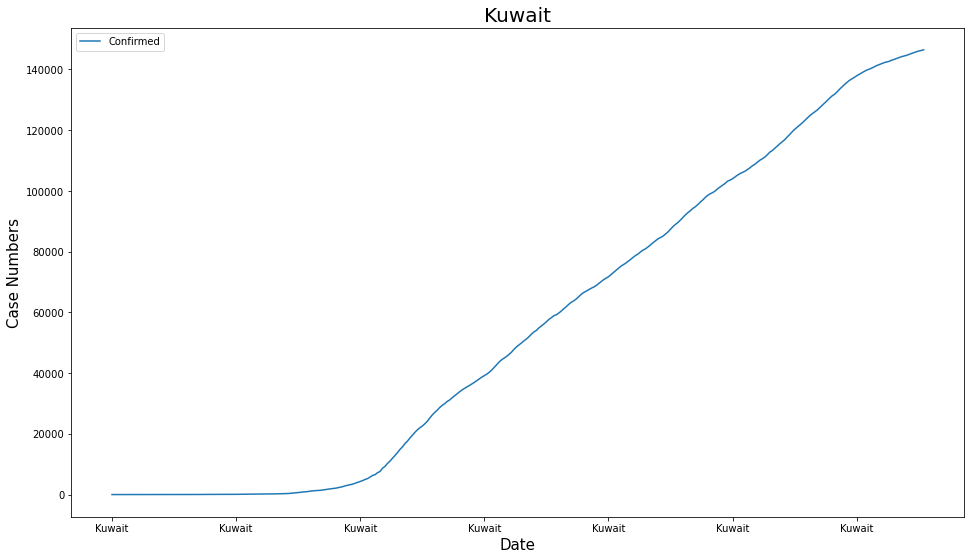

<Figure size 5760x2880 with 0 Axes>

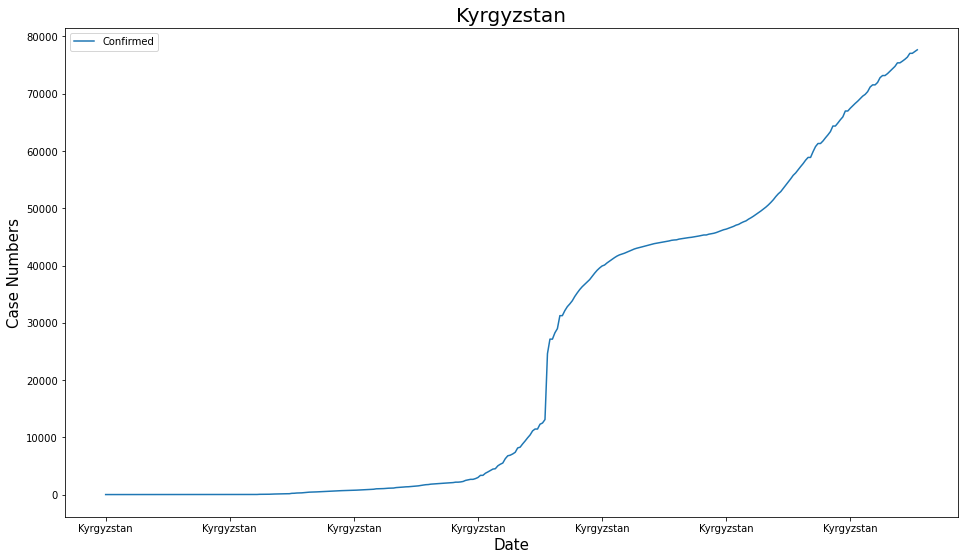

<Figure size 5760x2880 with 0 Axes>

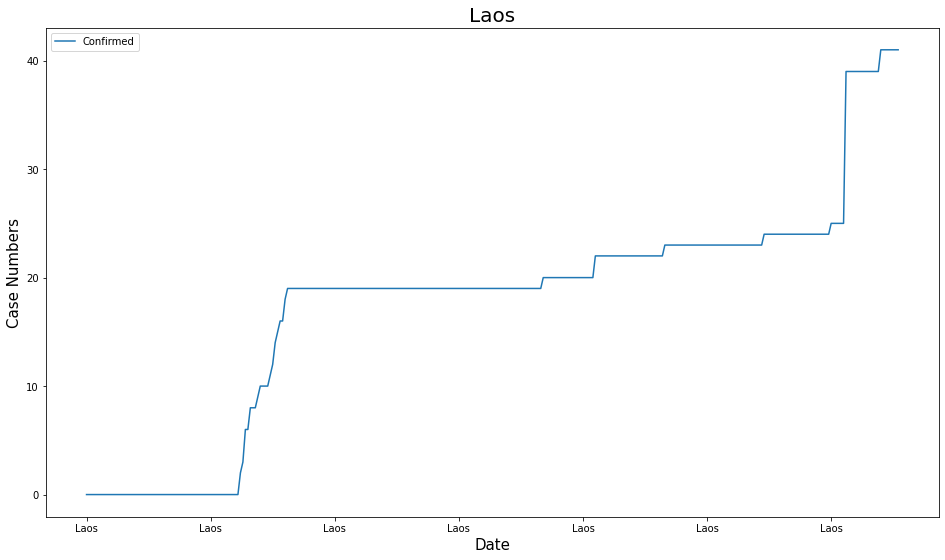

<Figure size 5760x2880 with 0 Axes>

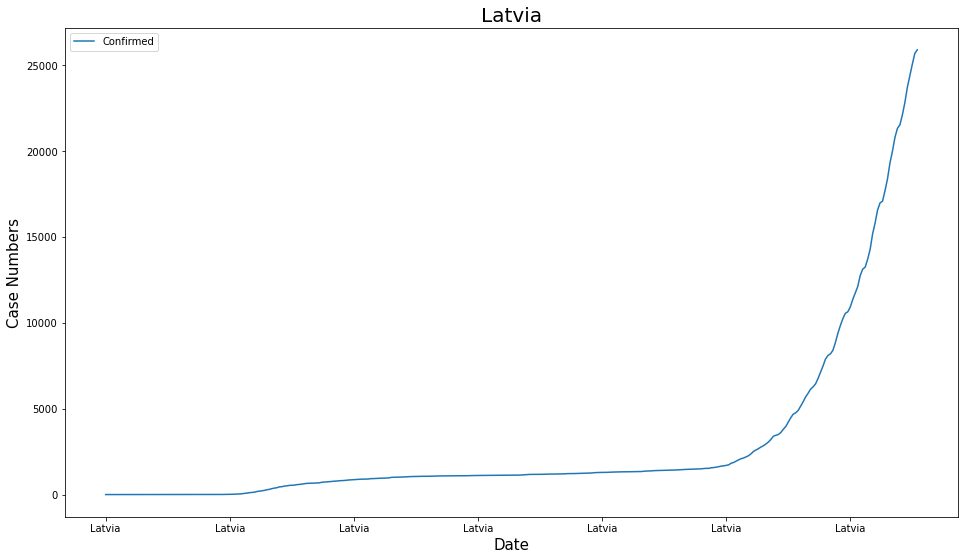

<Figure size 5760x2880 with 0 Axes>

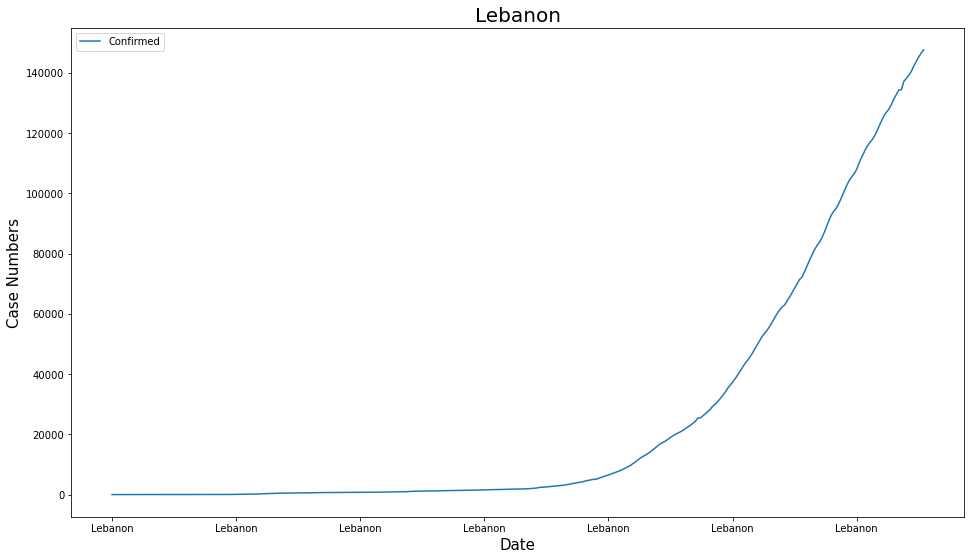

<Figure size 5760x2880 with 0 Axes>

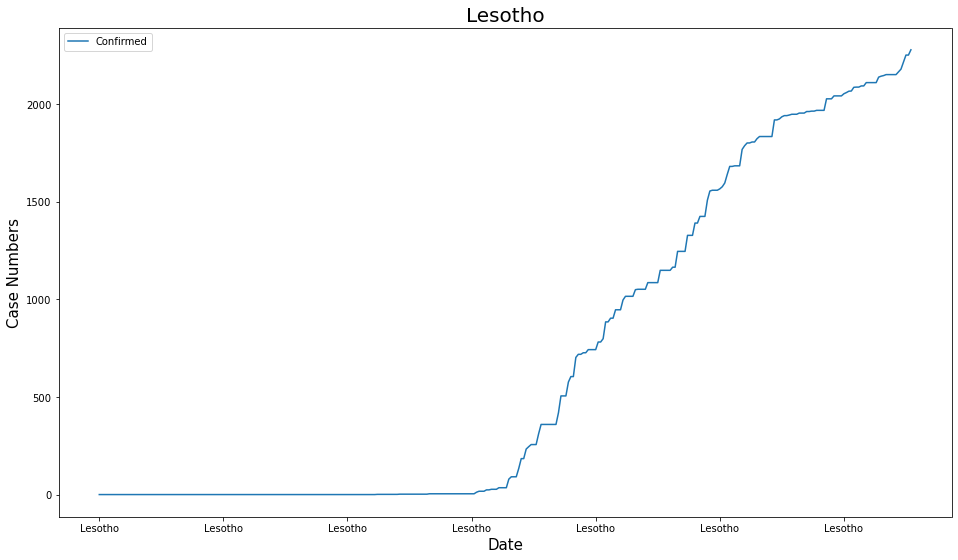

<Figure size 5760x2880 with 0 Axes>

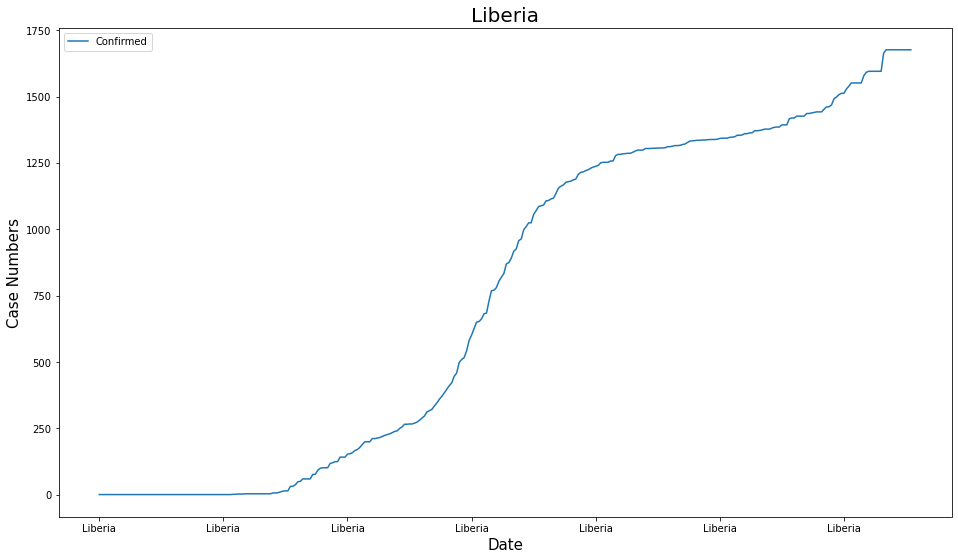

<Figure size 5760x2880 with 0 Axes>

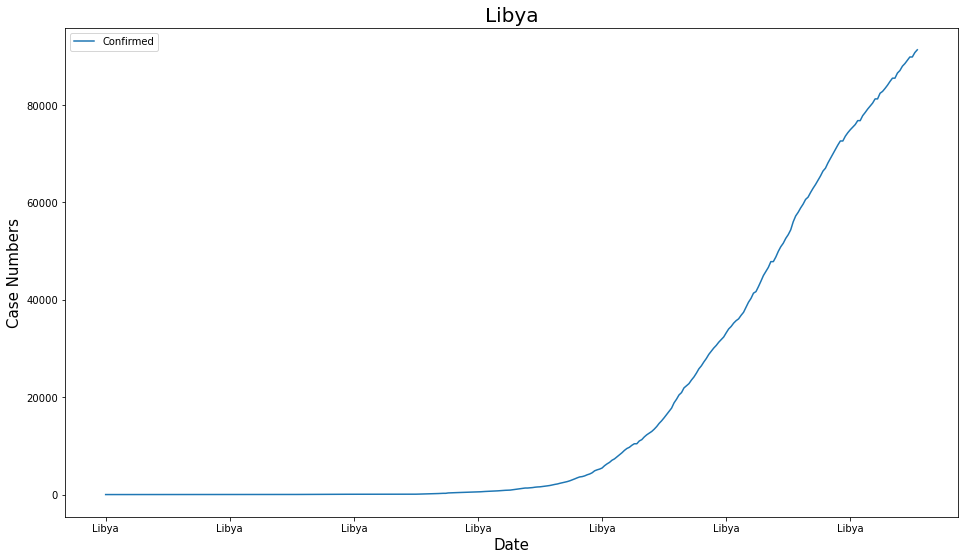

<Figure size 5760x2880 with 0 Axes>

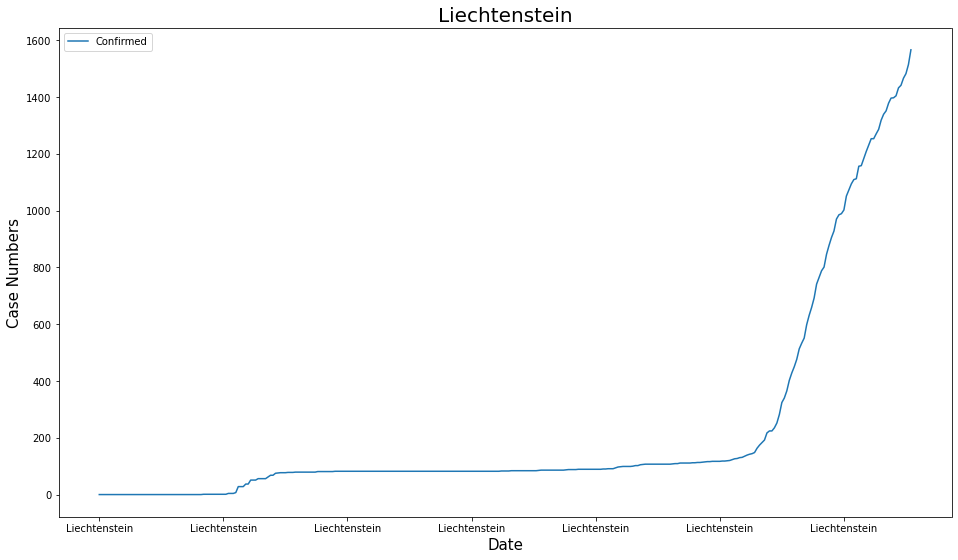

<Figure size 5760x2880 with 0 Axes>

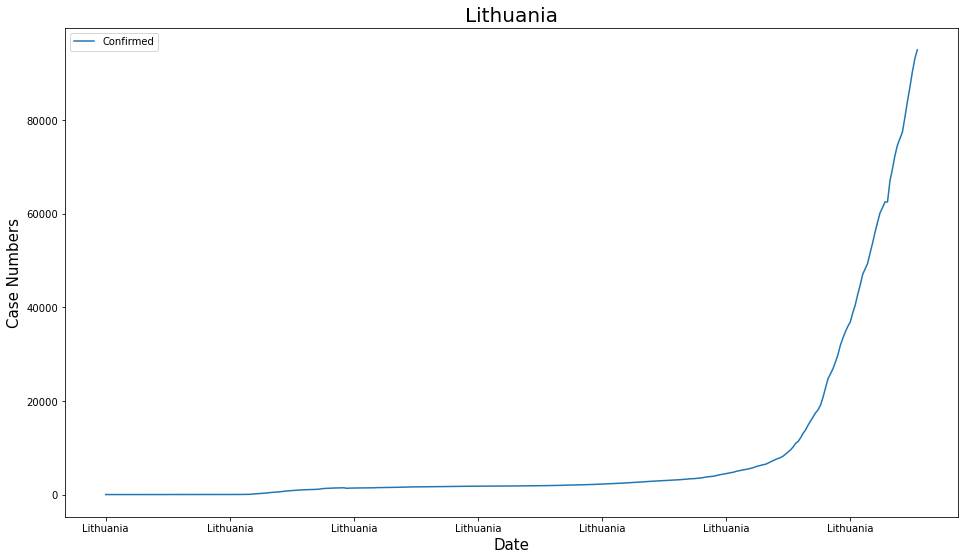

<Figure size 5760x2880 with 0 Axes>

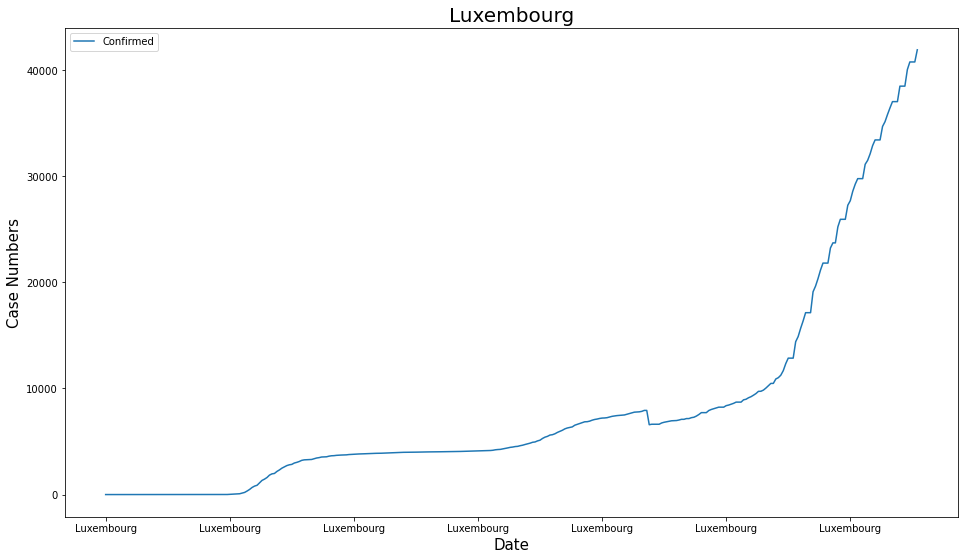

<Figure size 5760x2880 with 0 Axes>

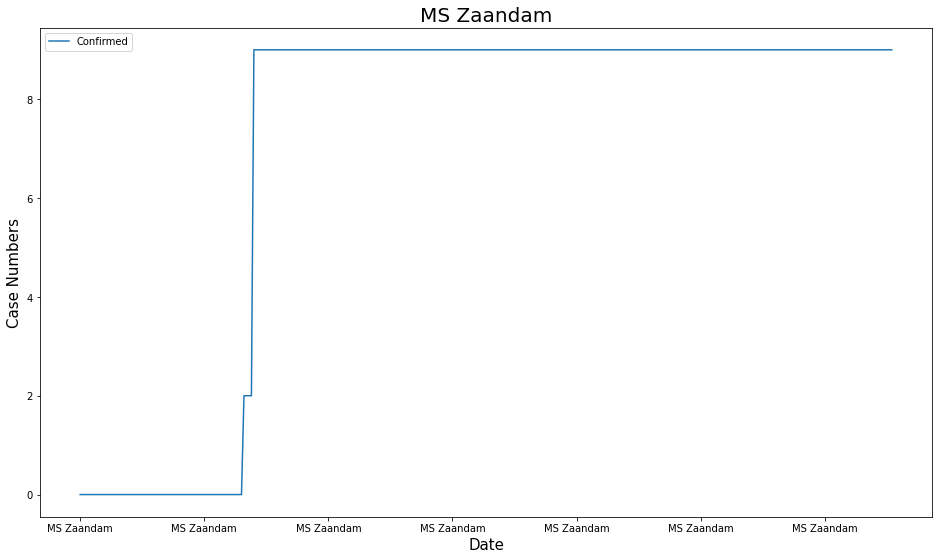

<Figure size 5760x2880 with 0 Axes>

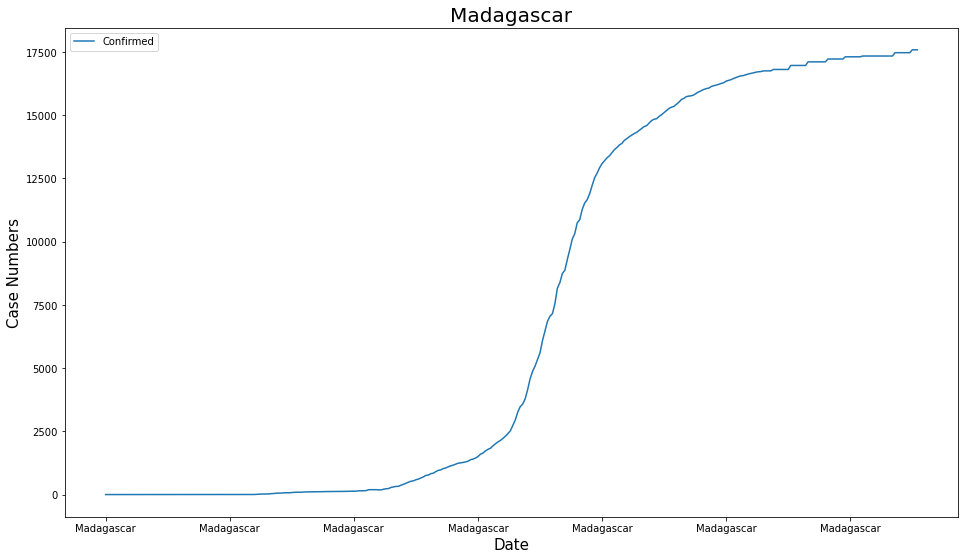

<Figure size 5760x2880 with 0 Axes>

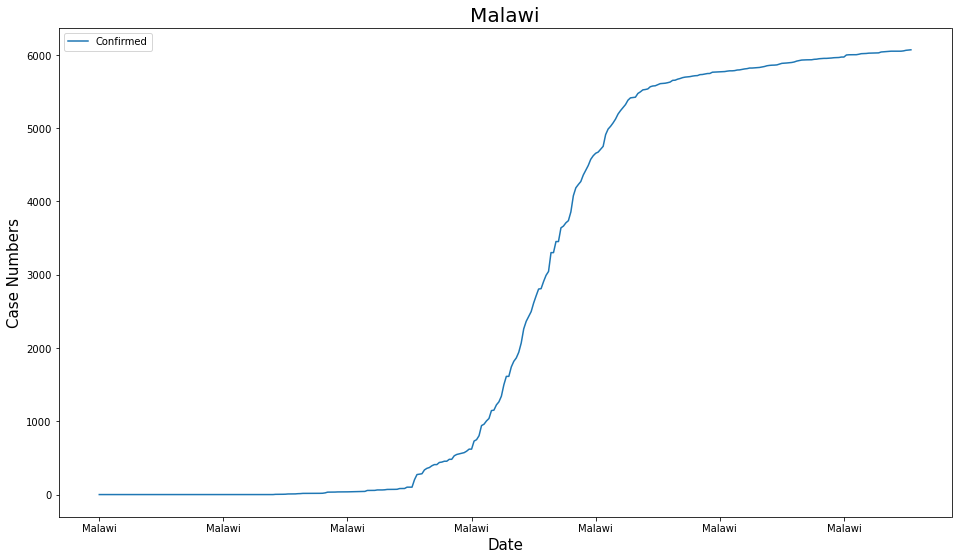

<Figure size 5760x2880 with 0 Axes>

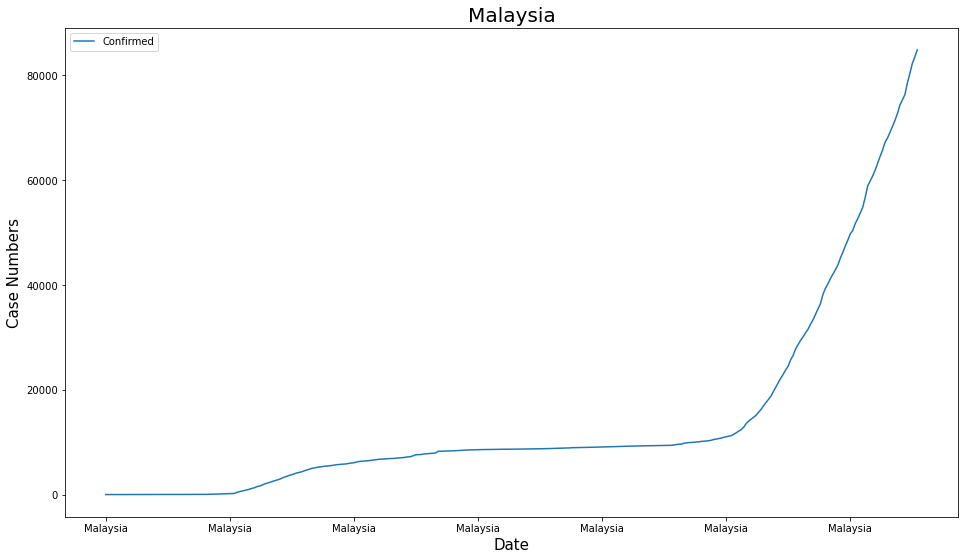

<Figure size 5760x2880 with 0 Axes>

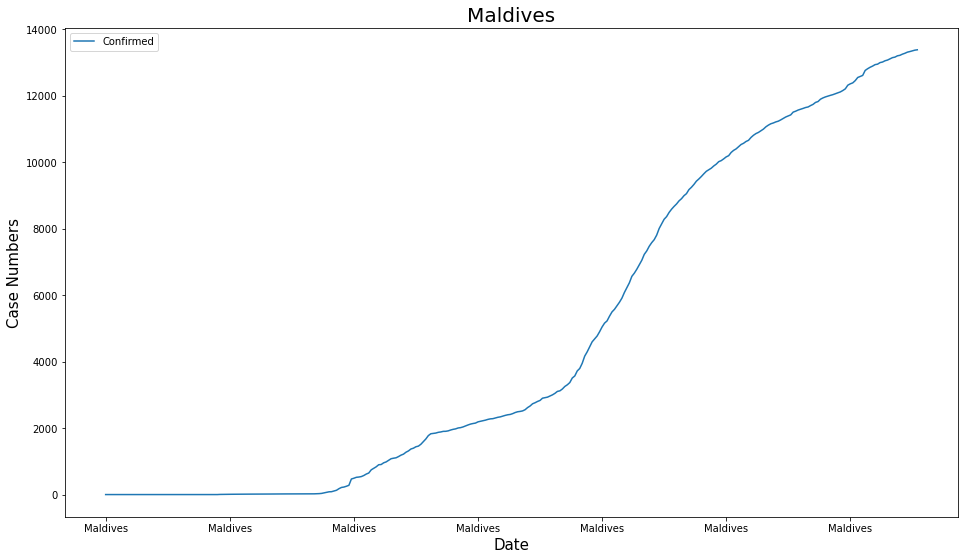

<Figure size 5760x2880 with 0 Axes>

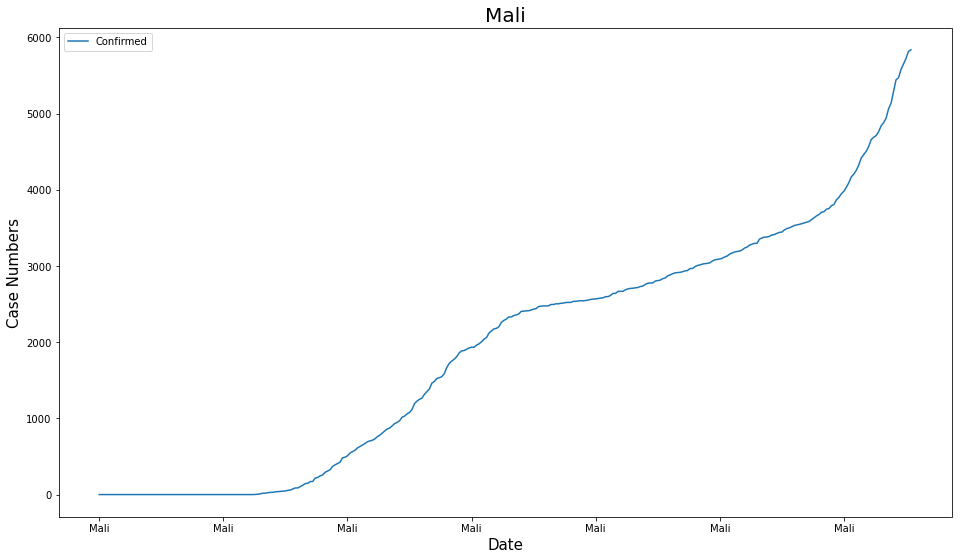

<Figure size 5760x2880 with 0 Axes>

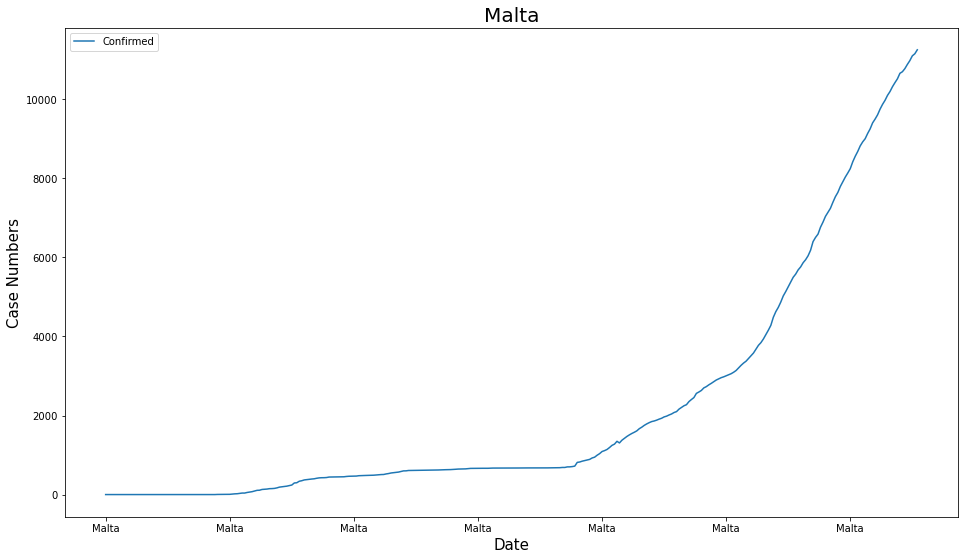

<Figure size 5760x2880 with 0 Axes>

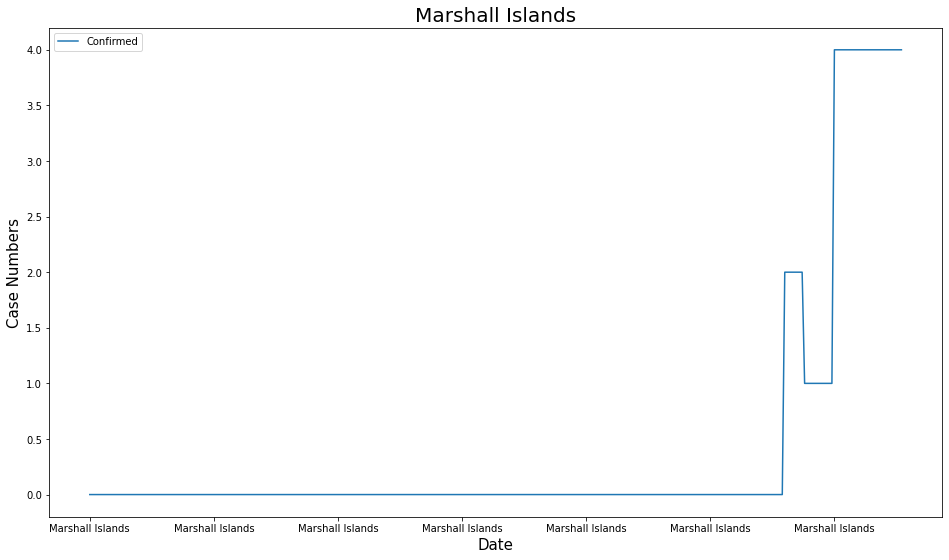

<Figure size 5760x2880 with 0 Axes>

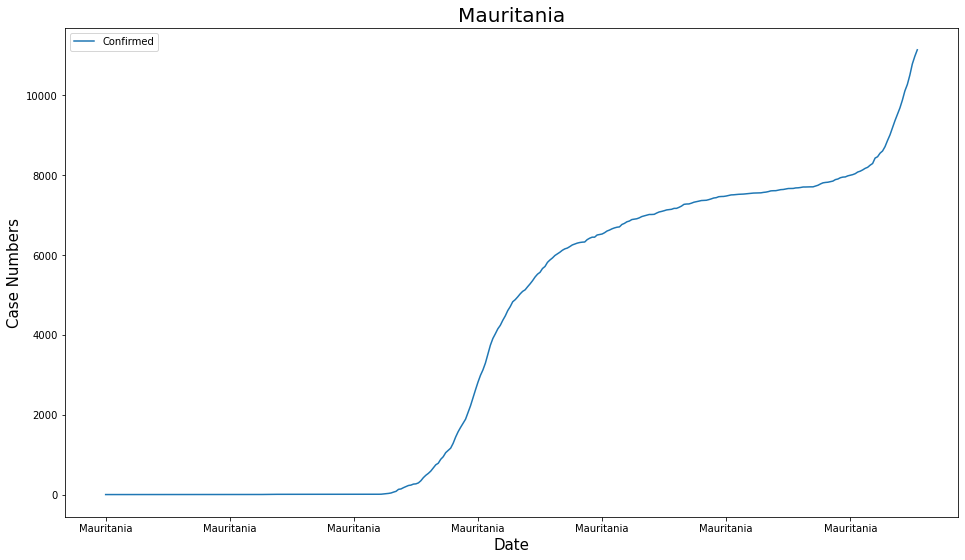

<Figure size 5760x2880 with 0 Axes>

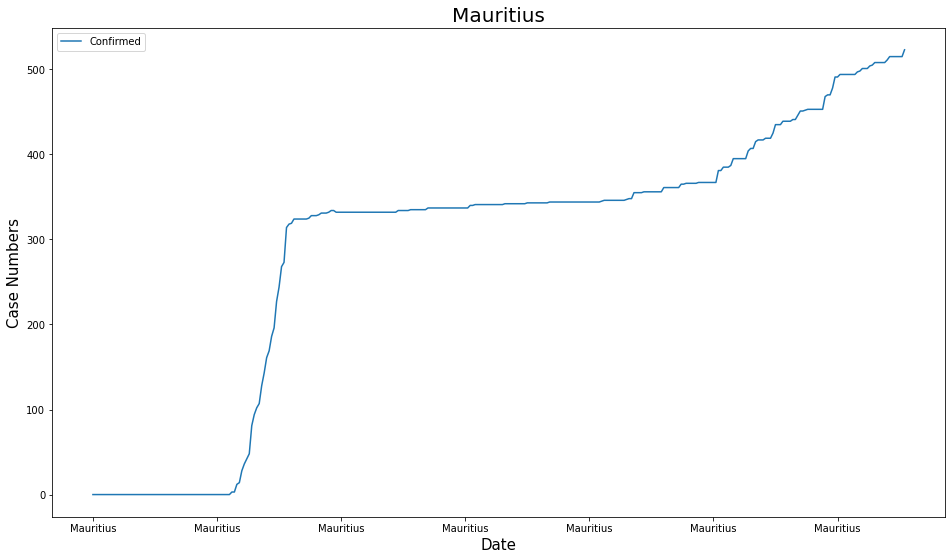

<Figure size 5760x2880 with 0 Axes>

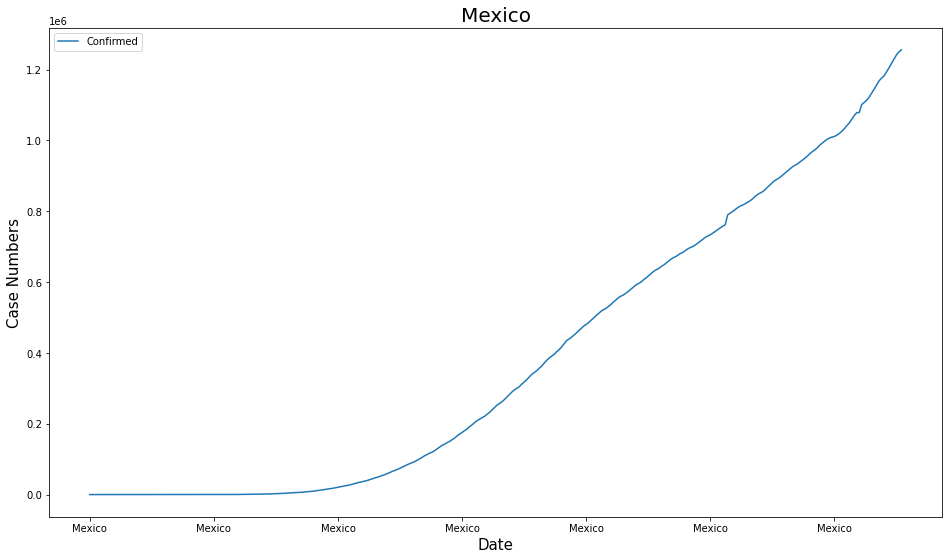

<Figure size 5760x2880 with 0 Axes>

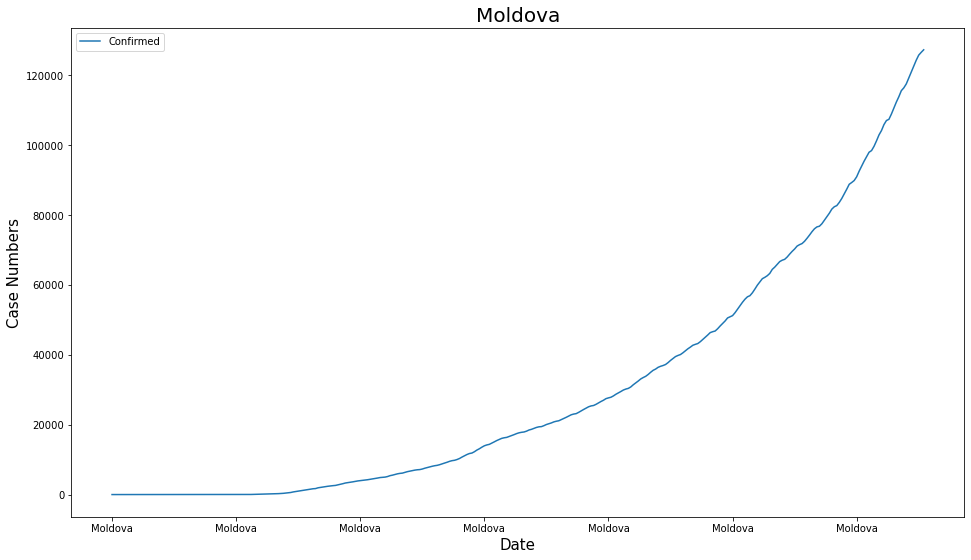

<Figure size 5760x2880 with 0 Axes>

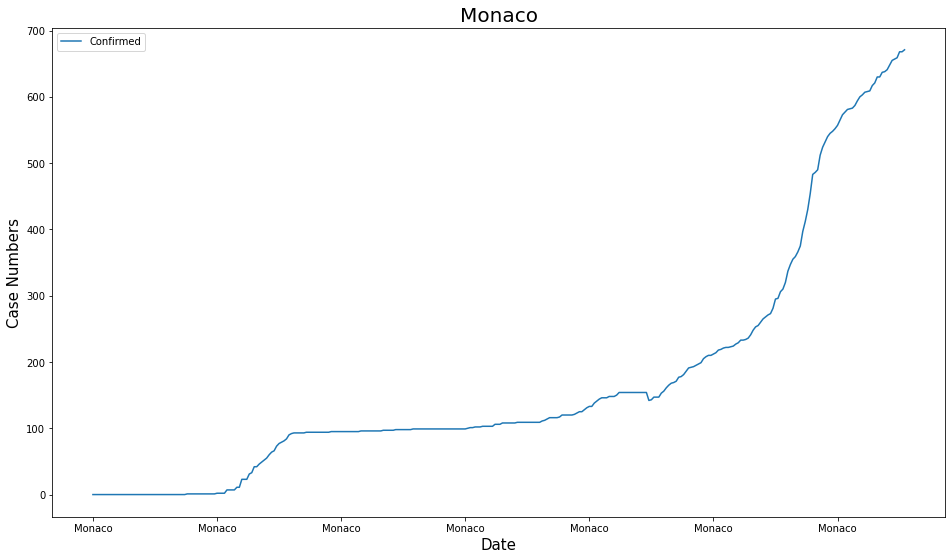

<Figure size 5760x2880 with 0 Axes>

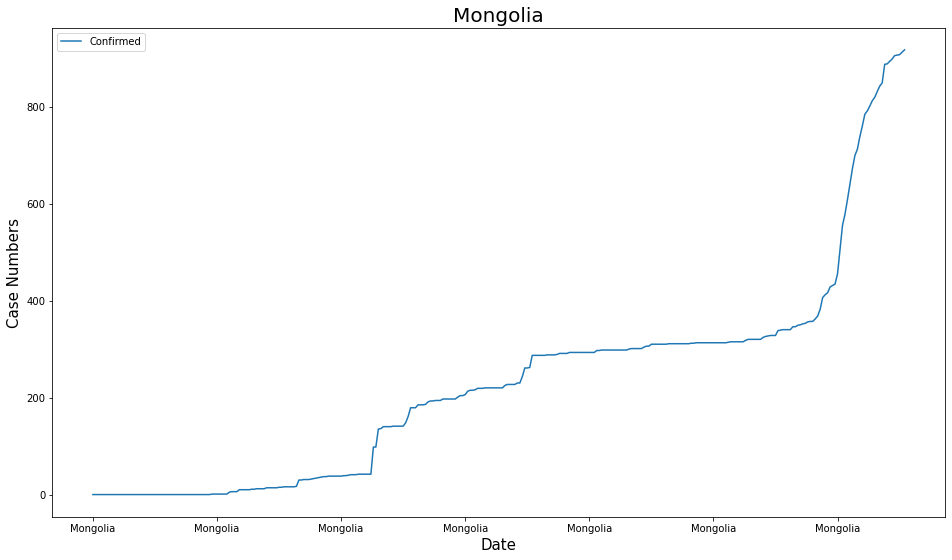

<Figure size 5760x2880 with 0 Axes>

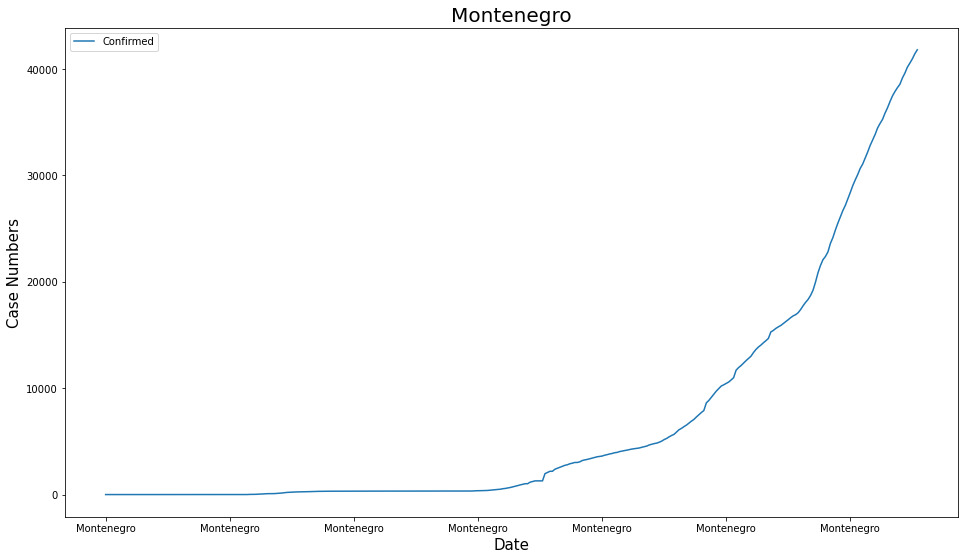

<Figure size 5760x2880 with 0 Axes>

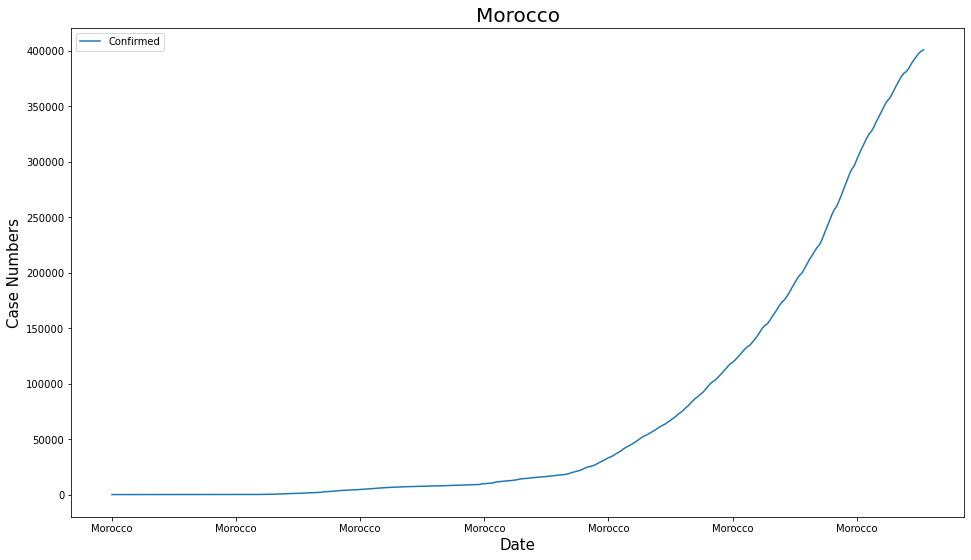

<Figure size 5760x2880 with 0 Axes>

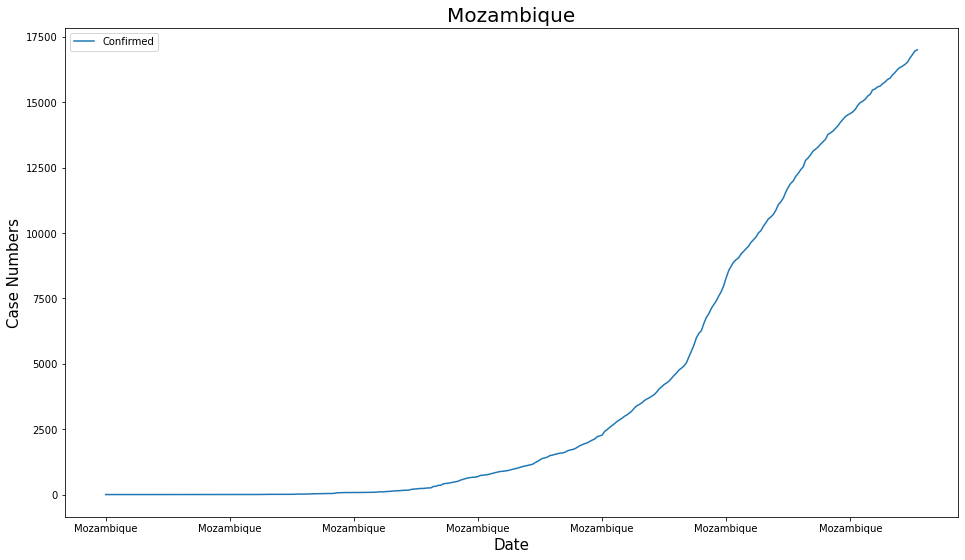

<Figure size 5760x2880 with 0 Axes>

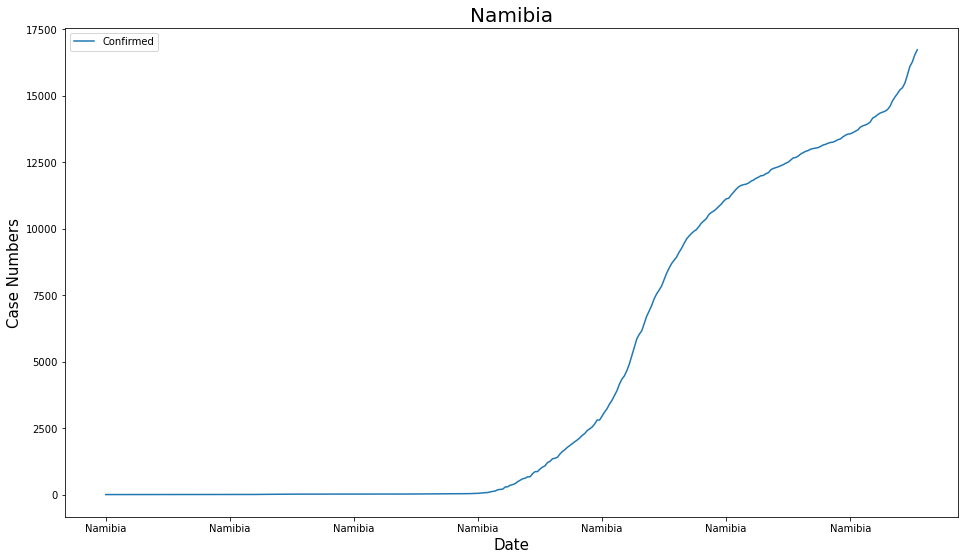

<Figure size 5760x2880 with 0 Axes>

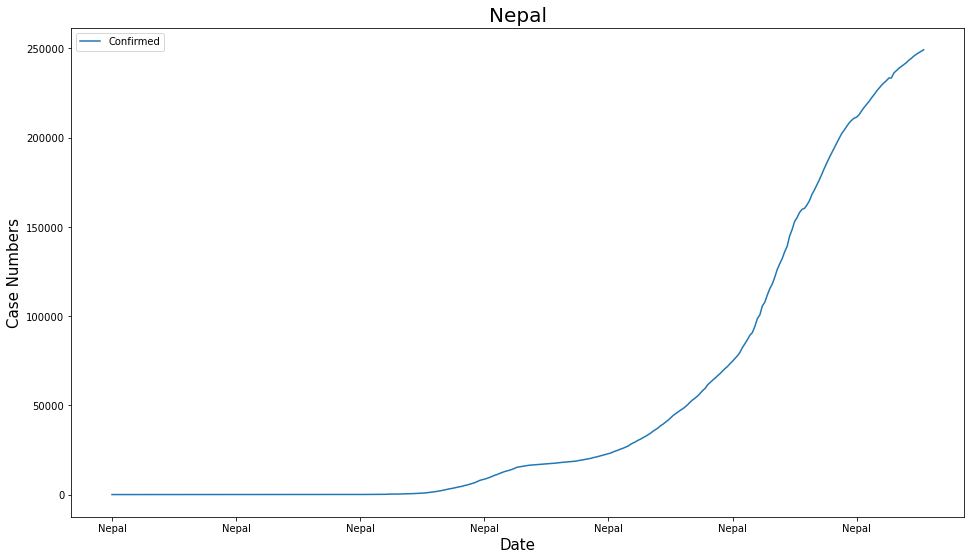

<Figure size 5760x2880 with 0 Axes>

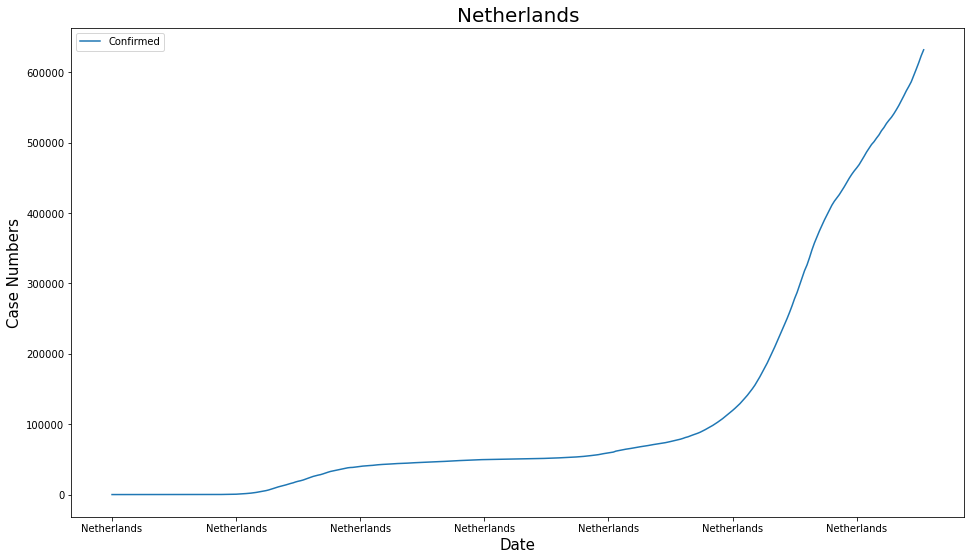

<Figure size 5760x2880 with 0 Axes>

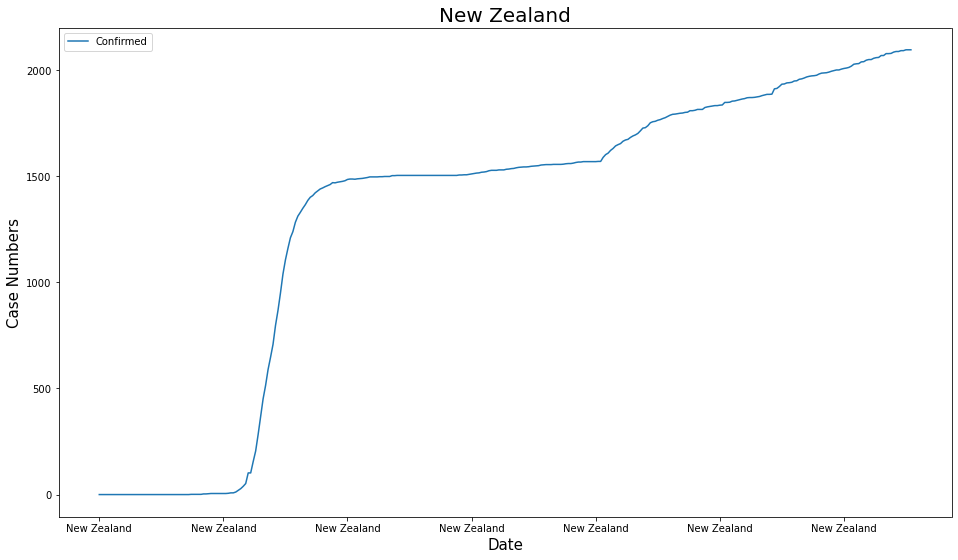

<Figure size 5760x2880 with 0 Axes>

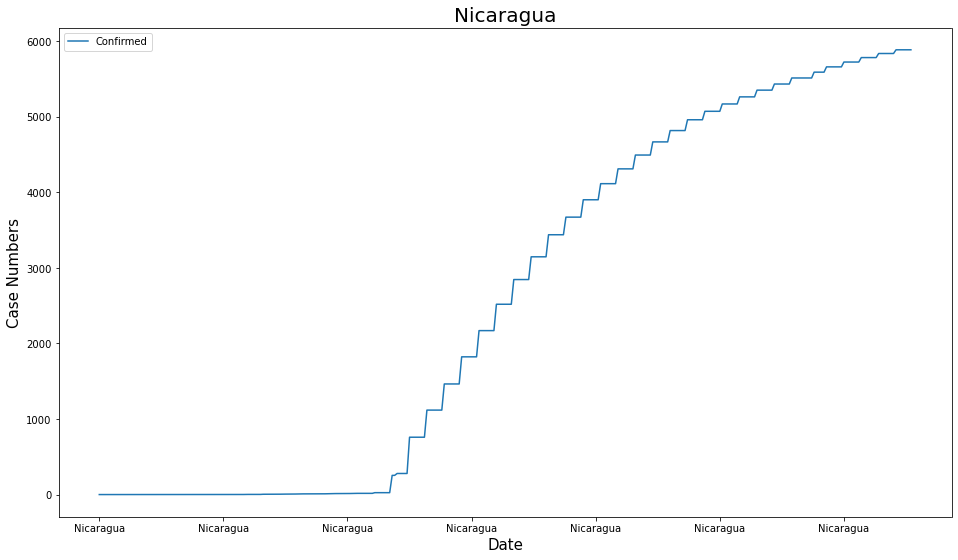

<Figure size 5760x2880 with 0 Axes>

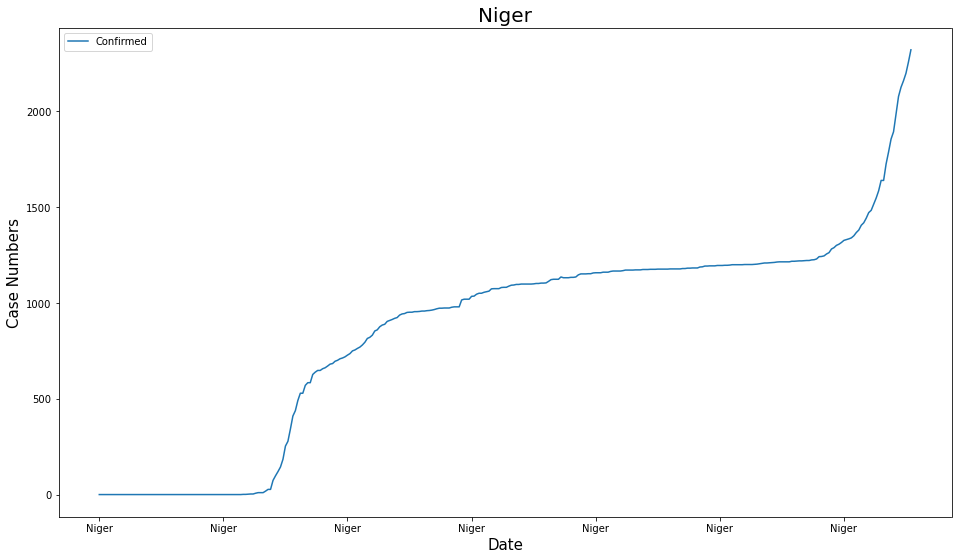

<Figure size 5760x2880 with 0 Axes>

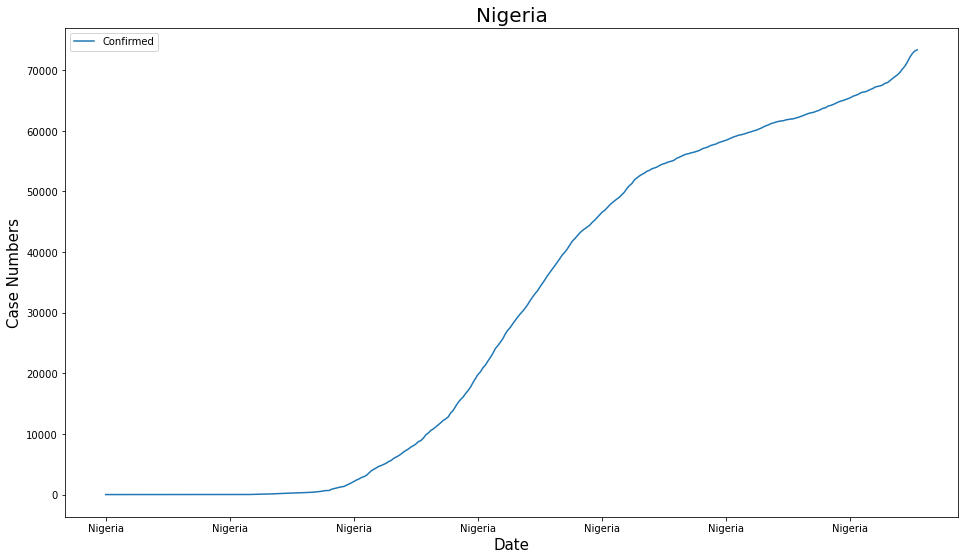

<Figure size 5760x2880 with 0 Axes>

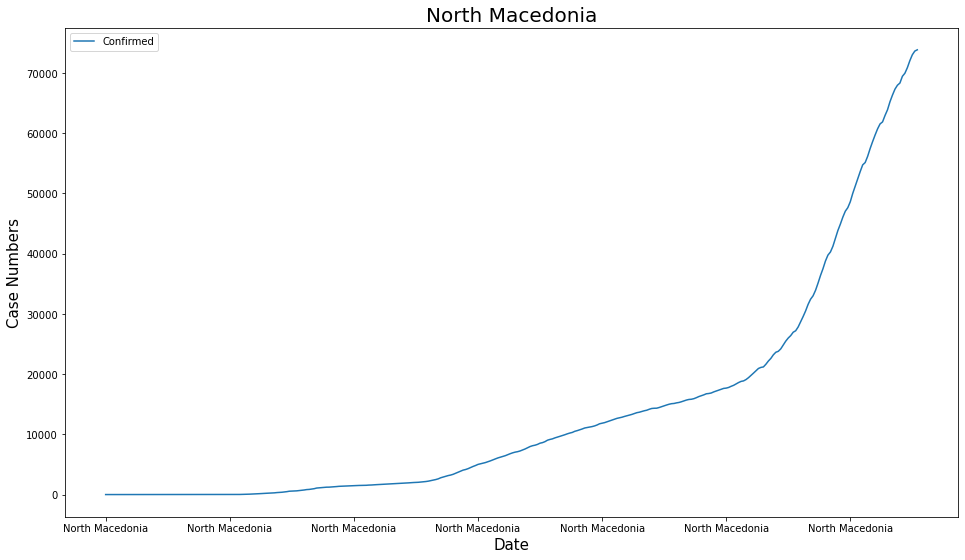

<Figure size 5760x2880 with 0 Axes>

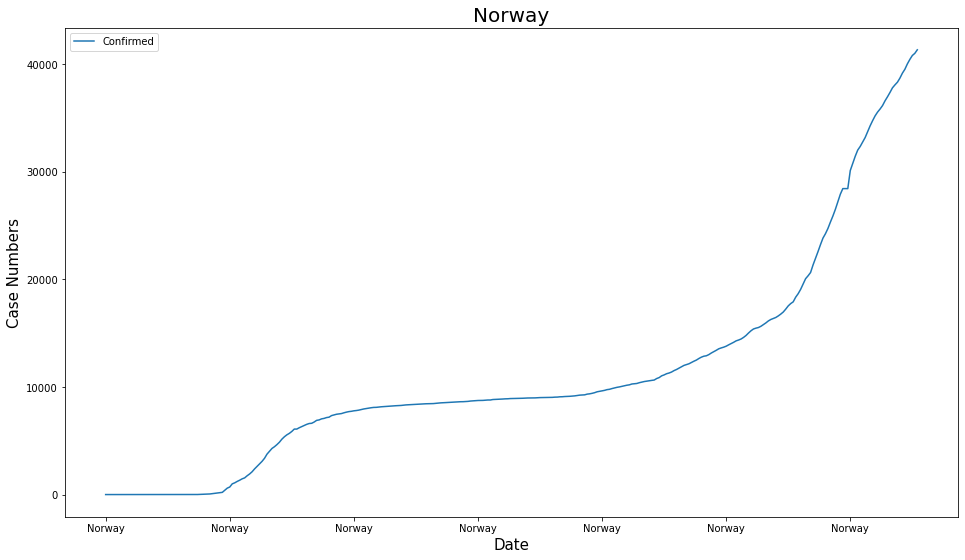

<Figure size 5760x2880 with 0 Axes>

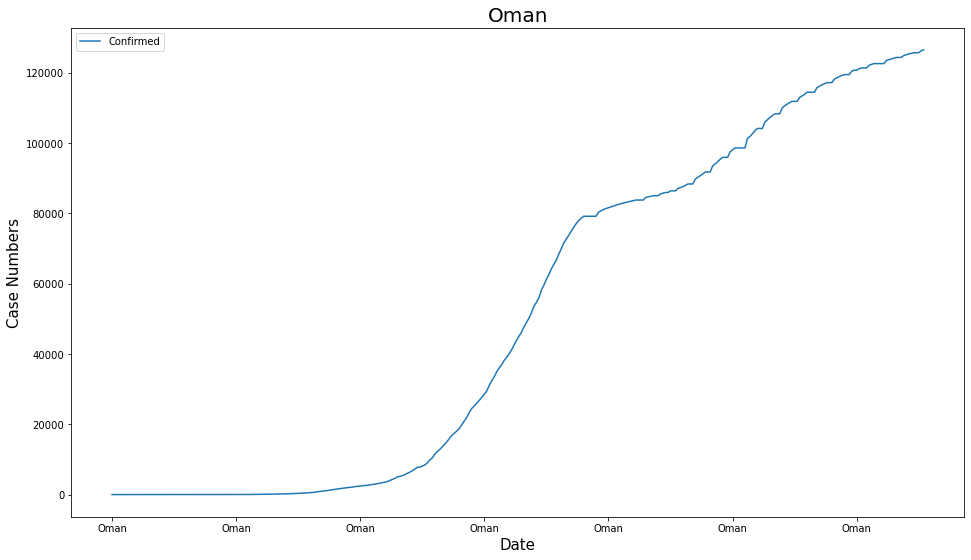

<Figure size 5760x2880 with 0 Axes>

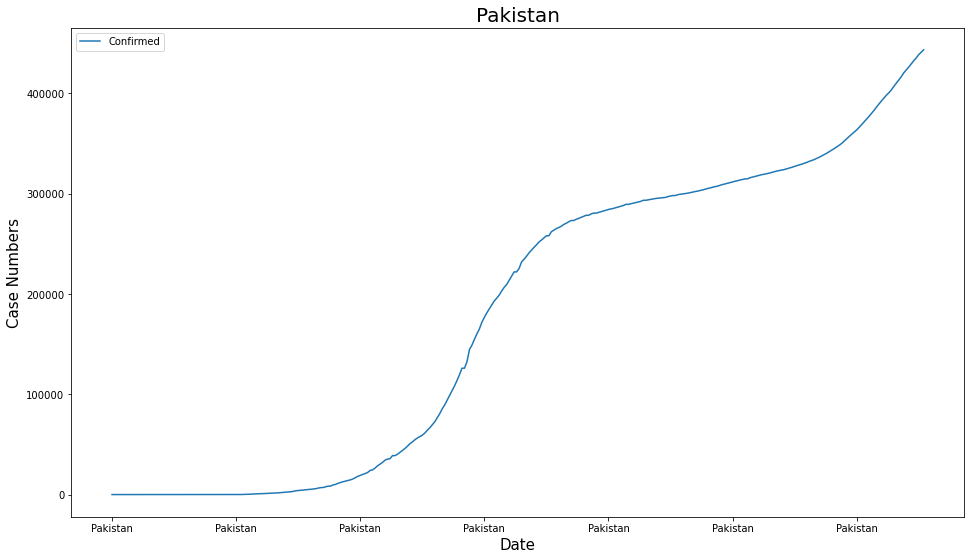

<Figure size 5760x2880 with 0 Axes>

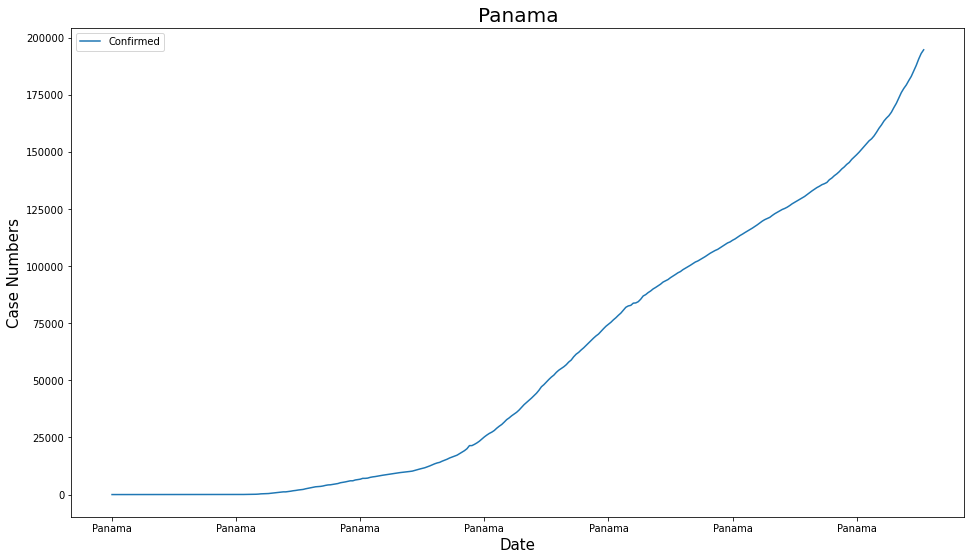

<Figure size 5760x2880 with 0 Axes>

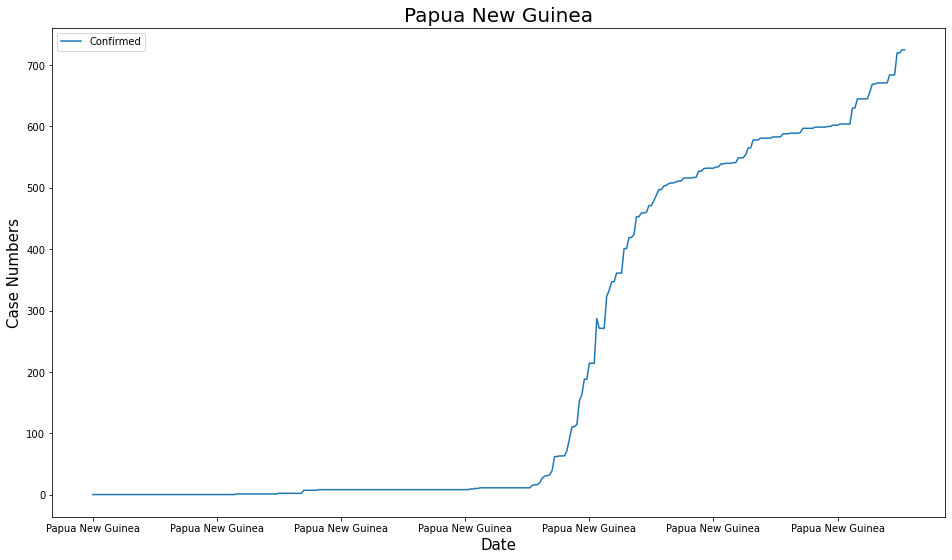

<Figure size 5760x2880 with 0 Axes>

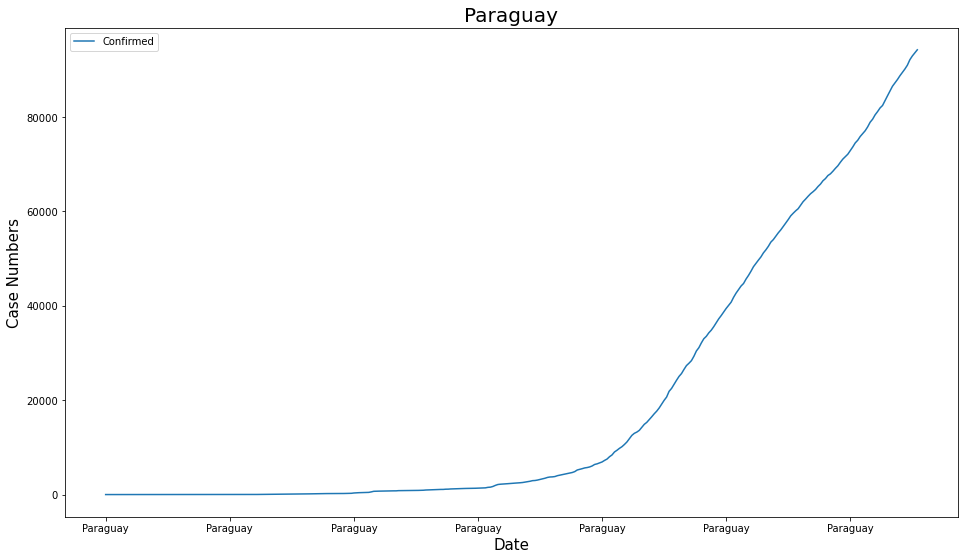

<Figure size 5760x2880 with 0 Axes>

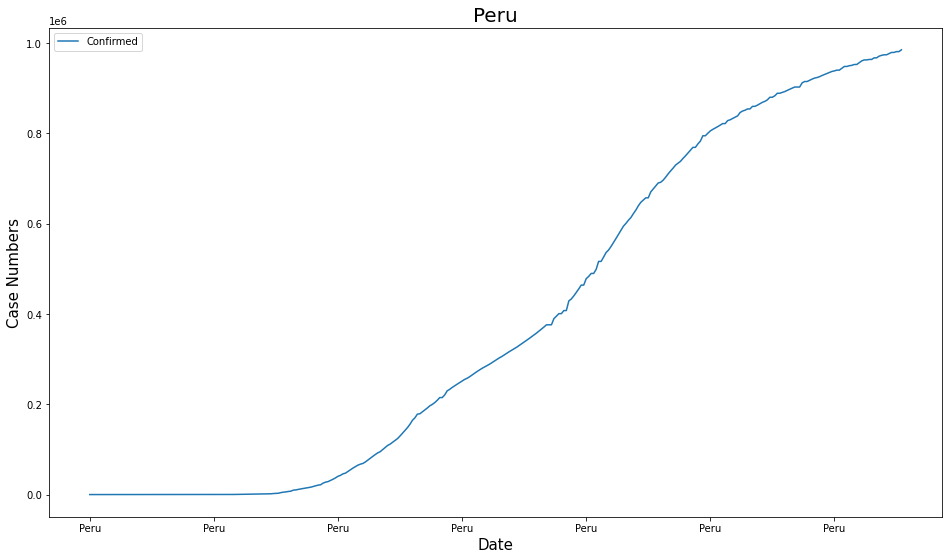

<Figure size 5760x2880 with 0 Axes>

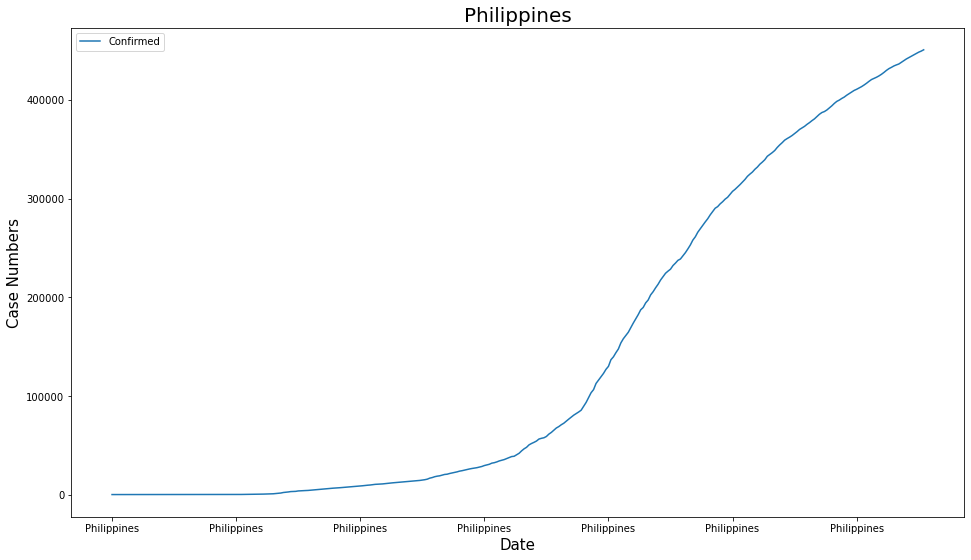

<Figure size 5760x2880 with 0 Axes>

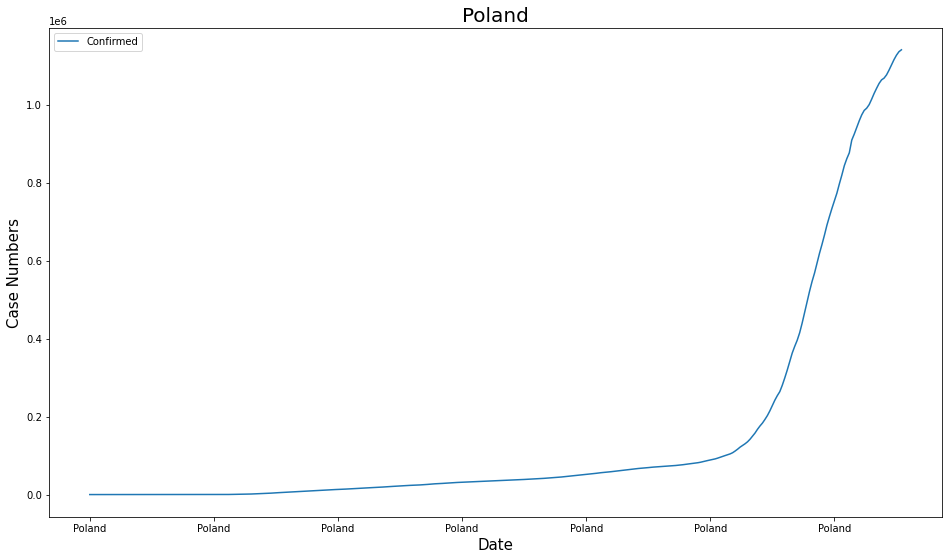

<Figure size 5760x2880 with 0 Axes>

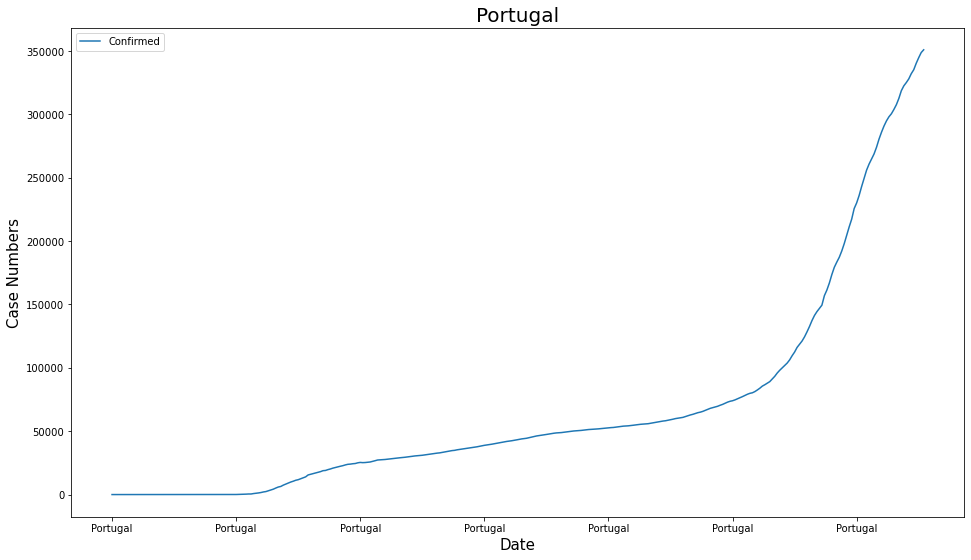

<Figure size 5760x2880 with 0 Axes>

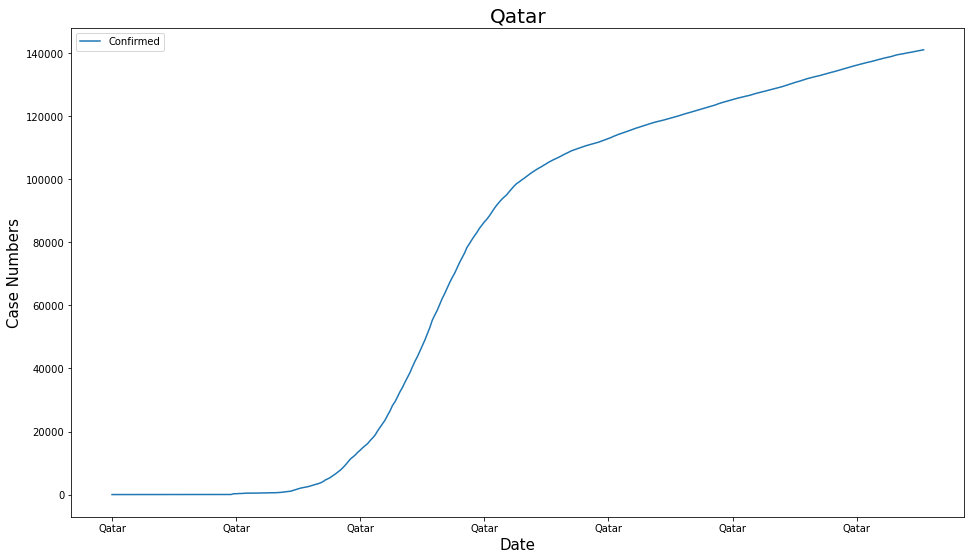

<Figure size 5760x2880 with 0 Axes>

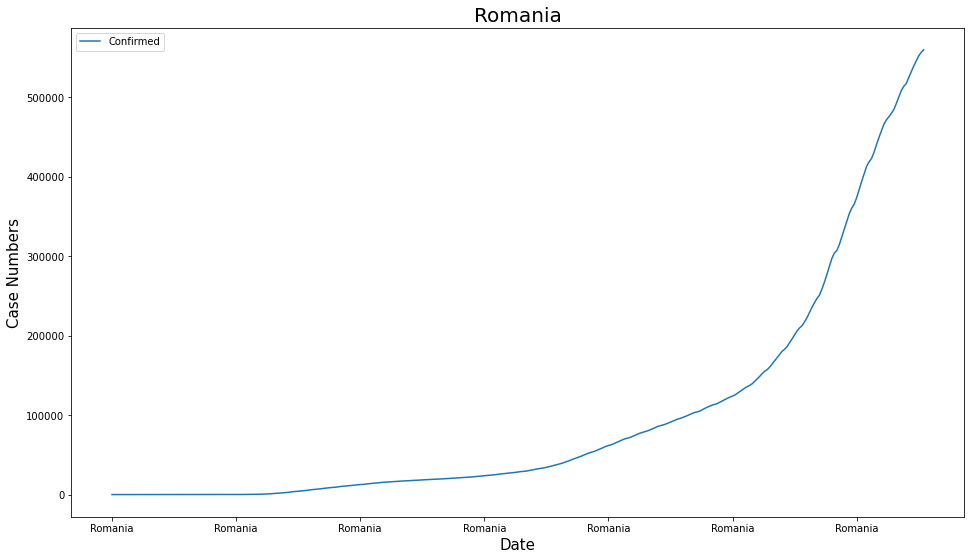

<Figure size 5760x2880 with 0 Axes>

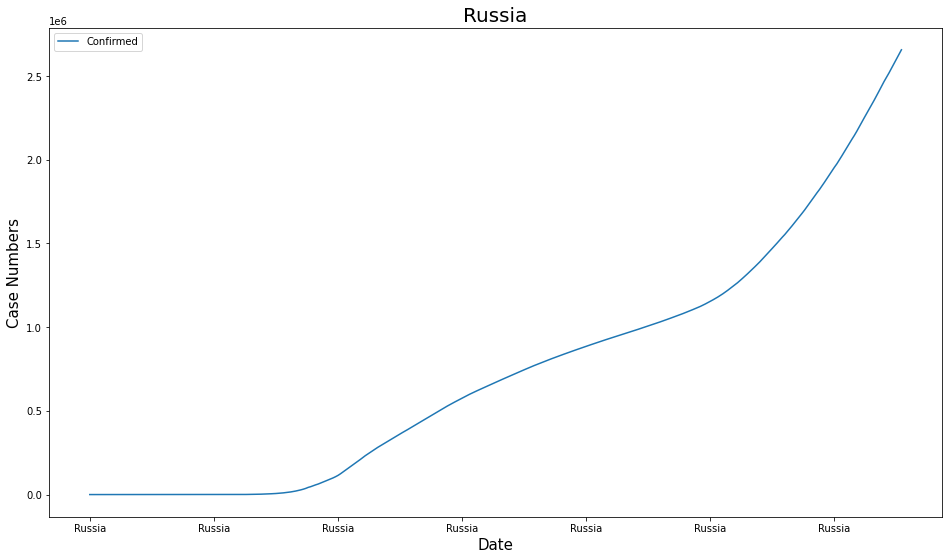

<Figure size 5760x2880 with 0 Axes>

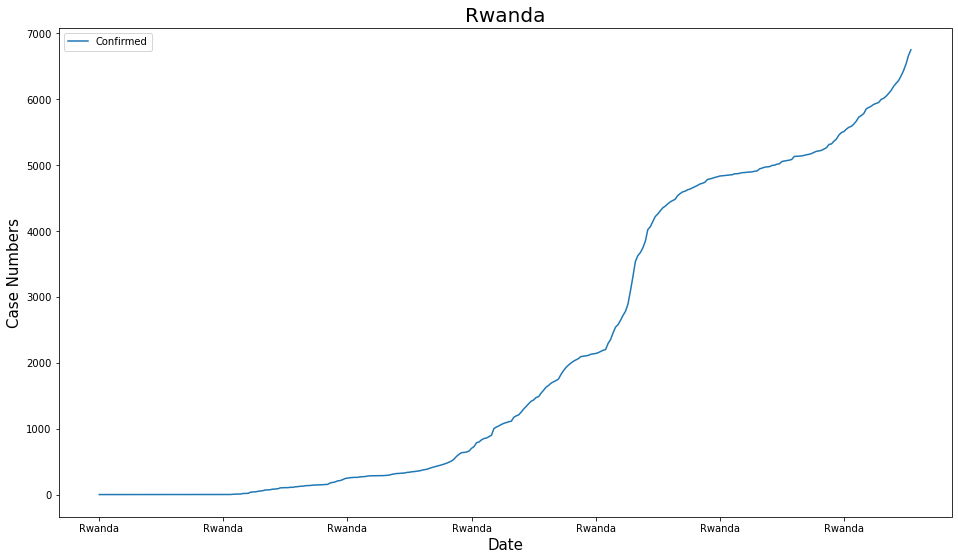

<Figure size 5760x2880 with 0 Axes>

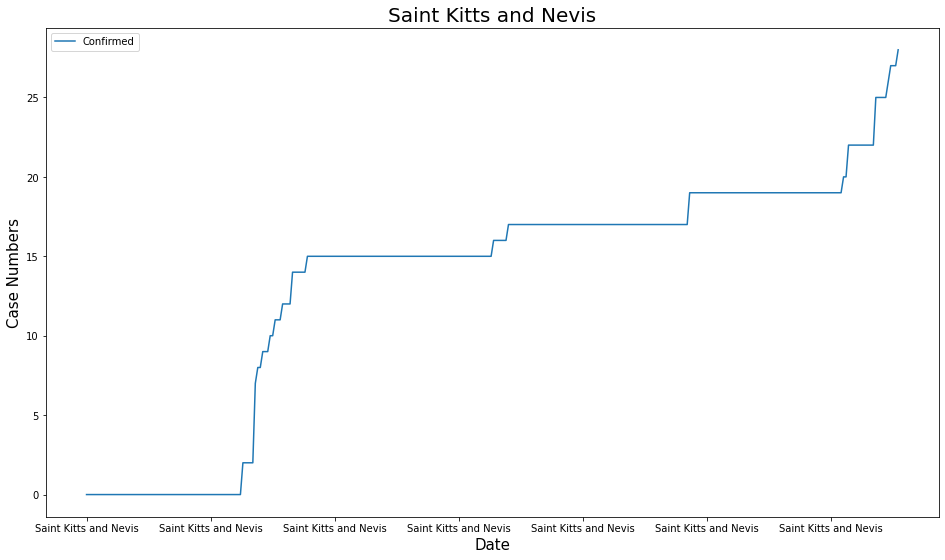

<Figure size 5760x2880 with 0 Axes>

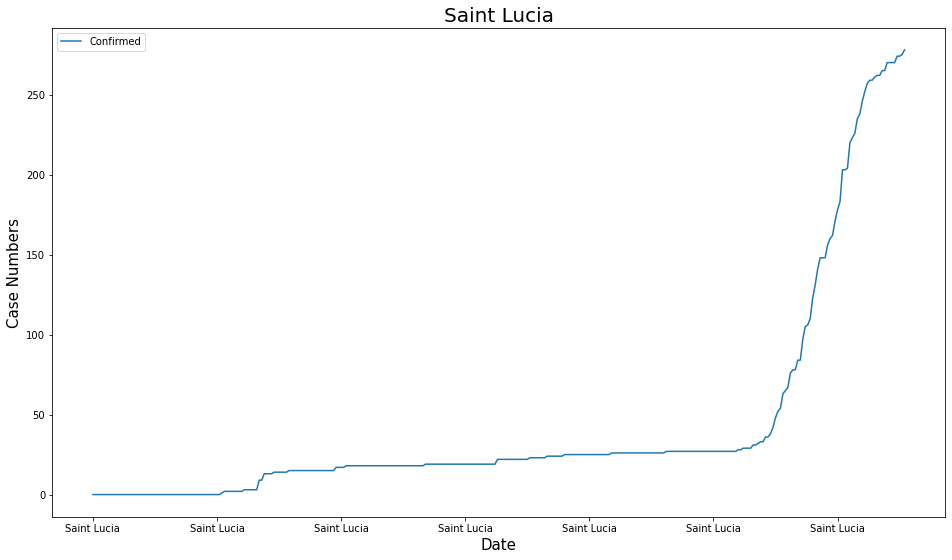

<Figure size 5760x2880 with 0 Axes>

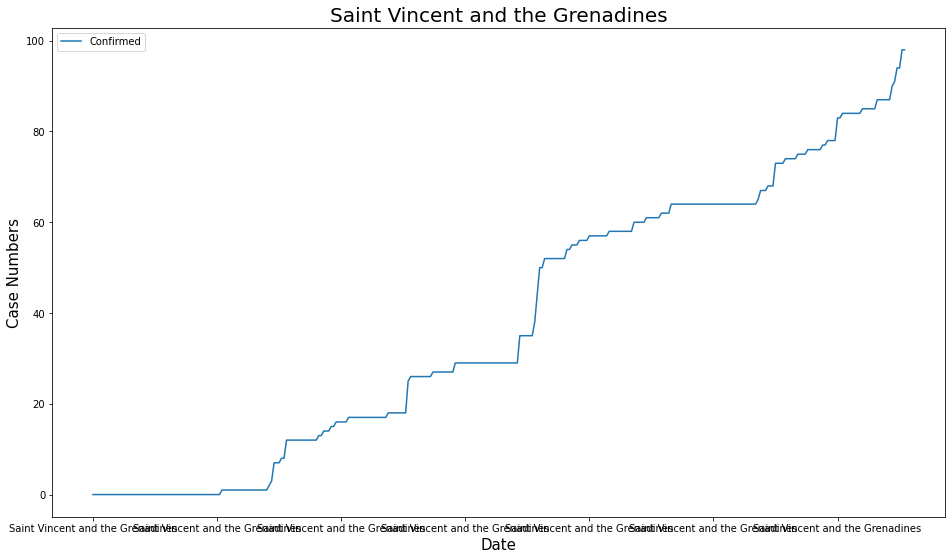

<Figure size 5760x2880 with 0 Axes>

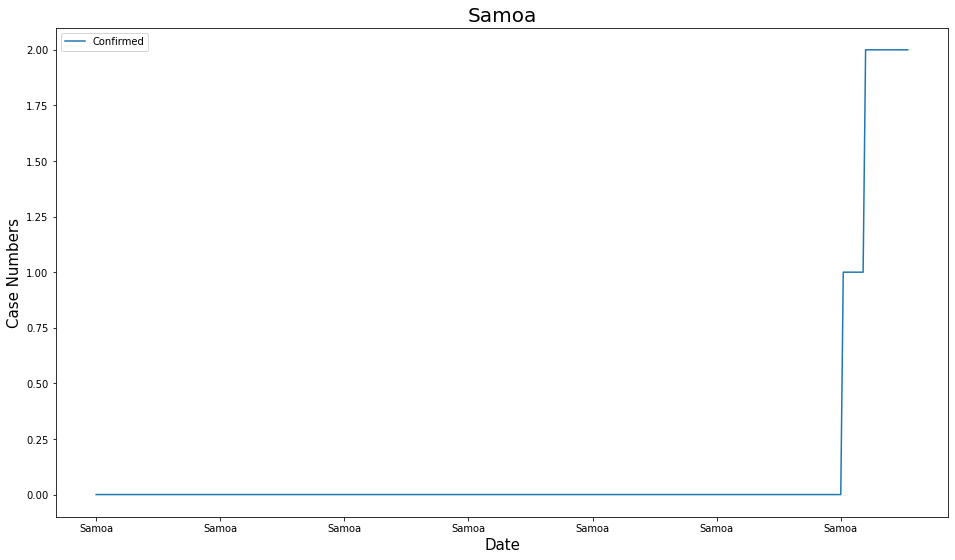

<Figure size 5760x2880 with 0 Axes>

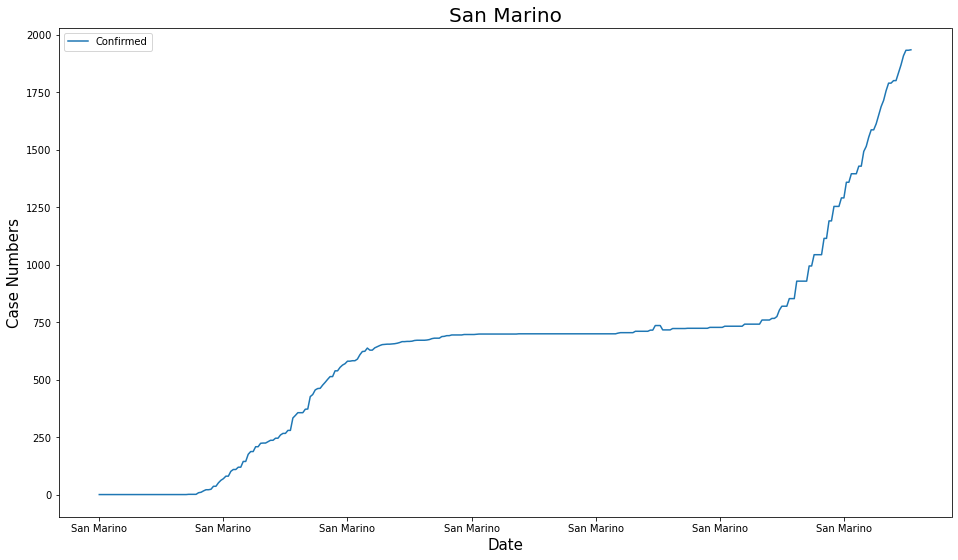

<Figure size 5760x2880 with 0 Axes>

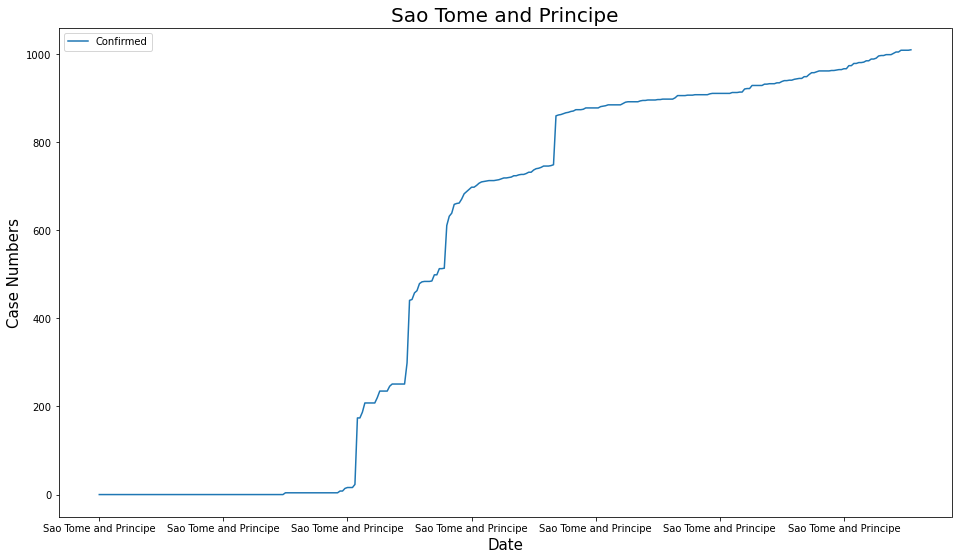

<Figure size 5760x2880 with 0 Axes>

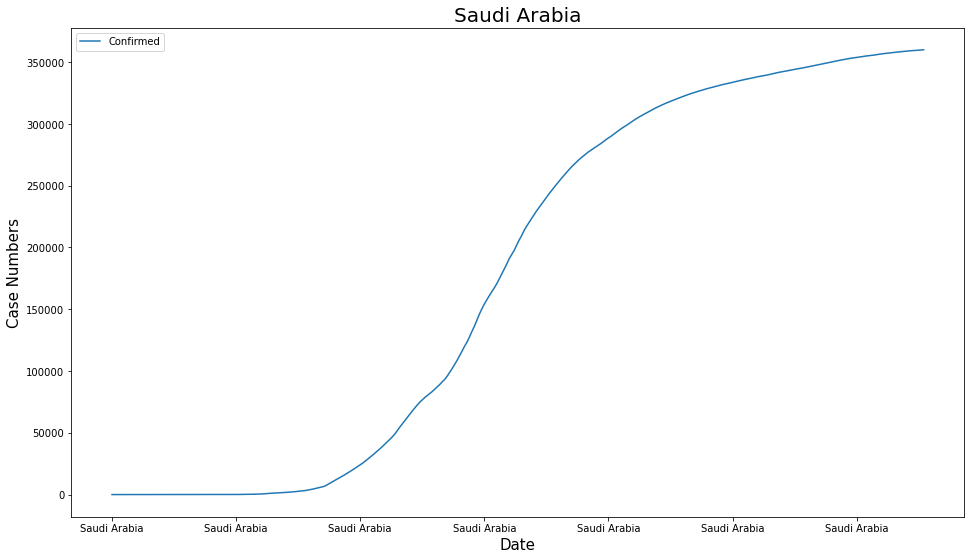

<Figure size 5760x2880 with 0 Axes>

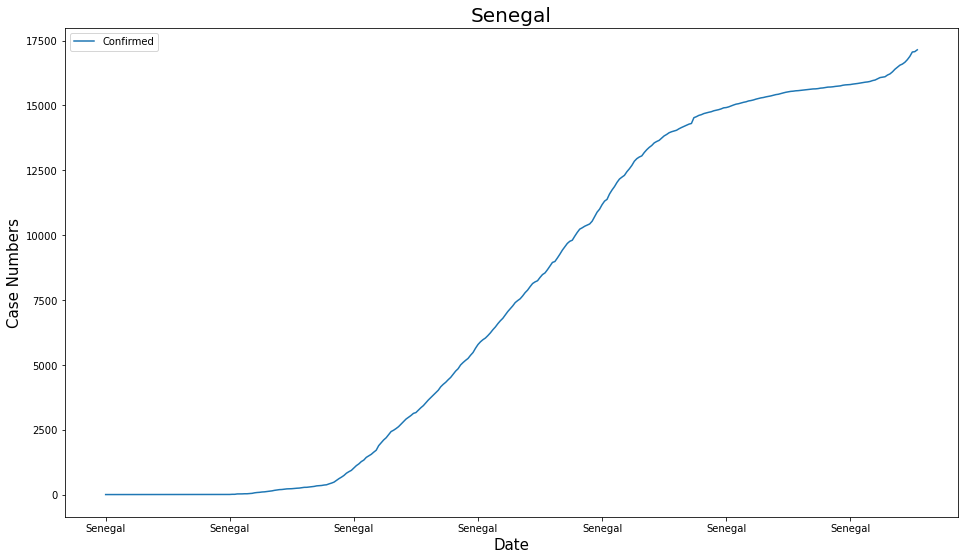

<Figure size 5760x2880 with 0 Axes>

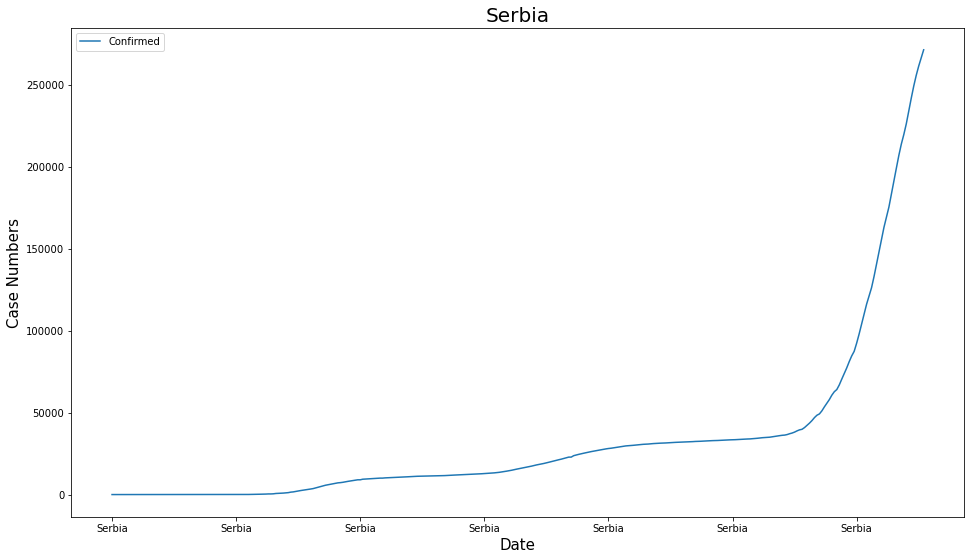

<Figure size 5760x2880 with 0 Axes>

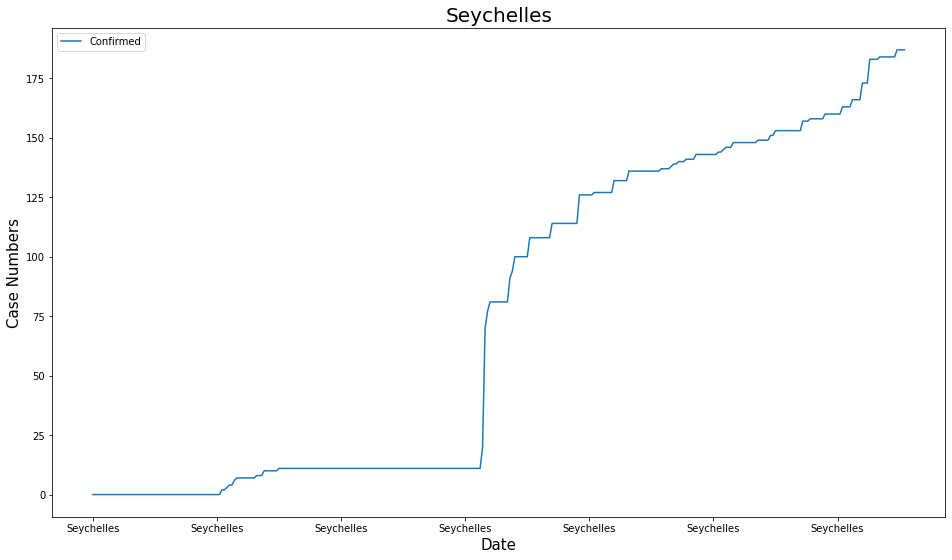

<Figure size 5760x2880 with 0 Axes>

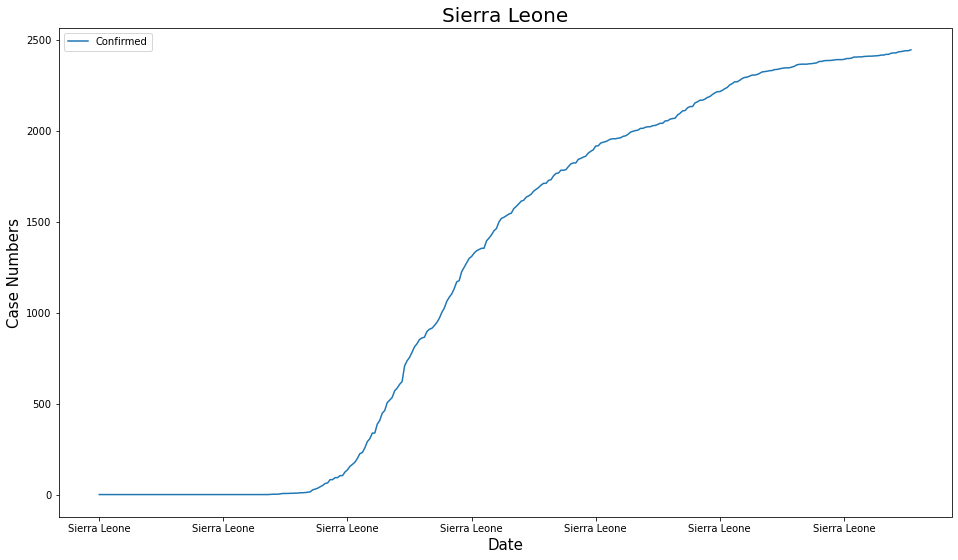

<Figure size 5760x2880 with 0 Axes>

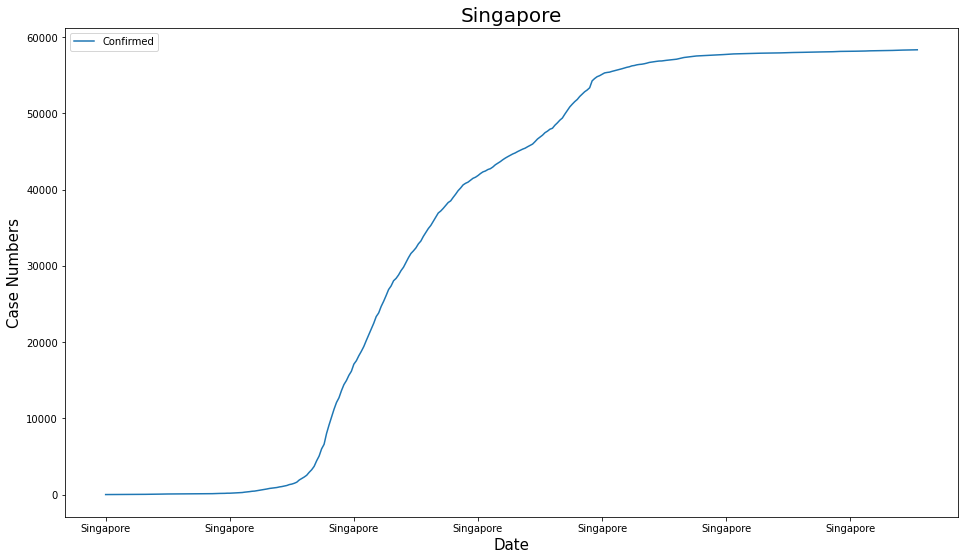

<Figure size 5760x2880 with 0 Axes>

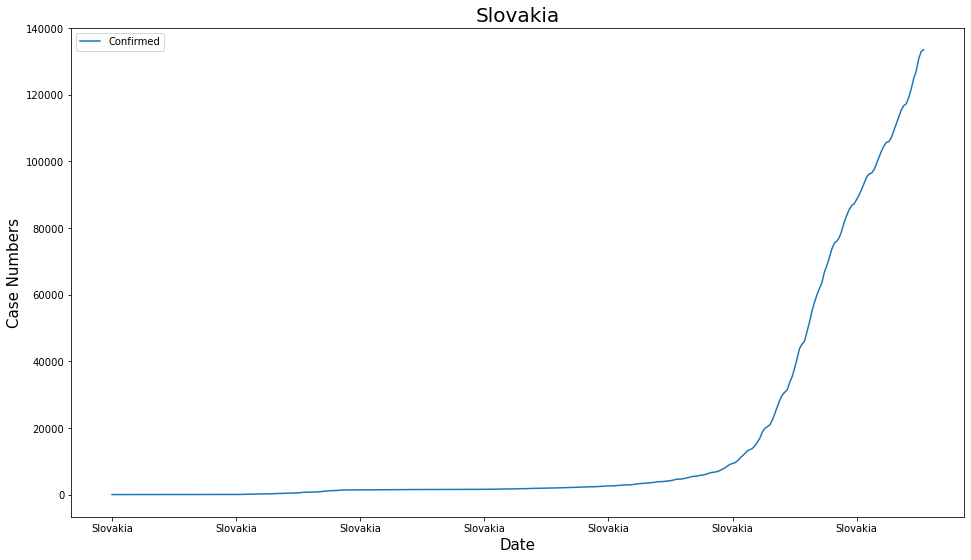

<Figure size 5760x2880 with 0 Axes>

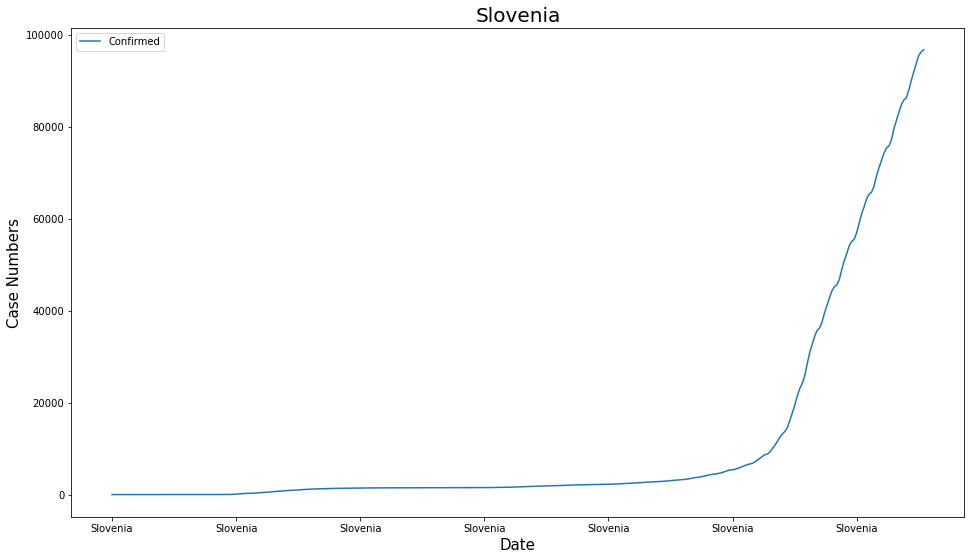

<Figure size 5760x2880 with 0 Axes>

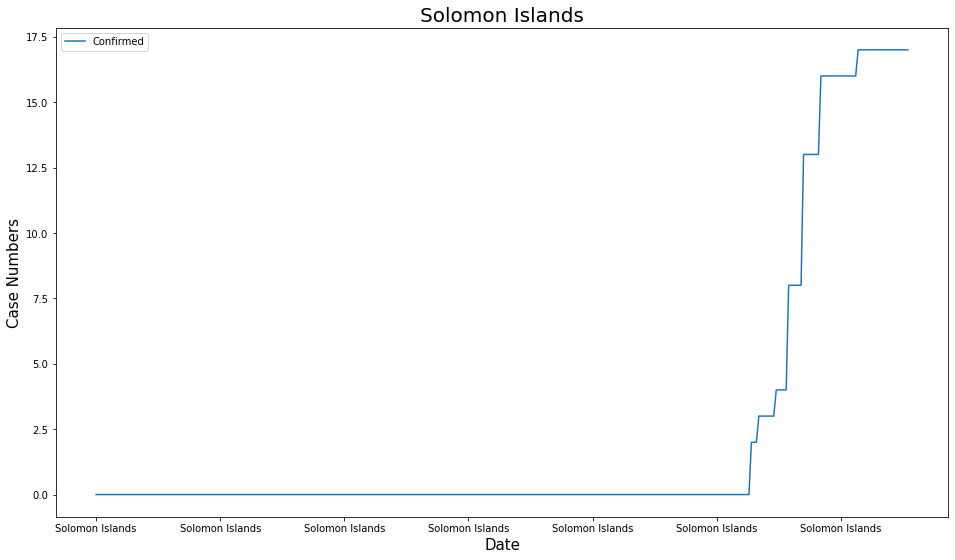

<Figure size 5760x2880 with 0 Axes>

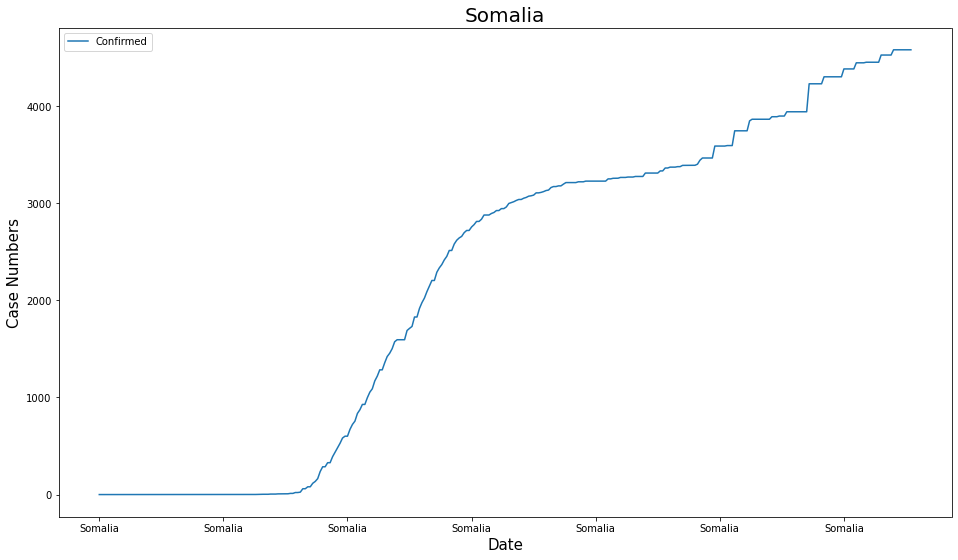

<Figure size 5760x2880 with 0 Axes>

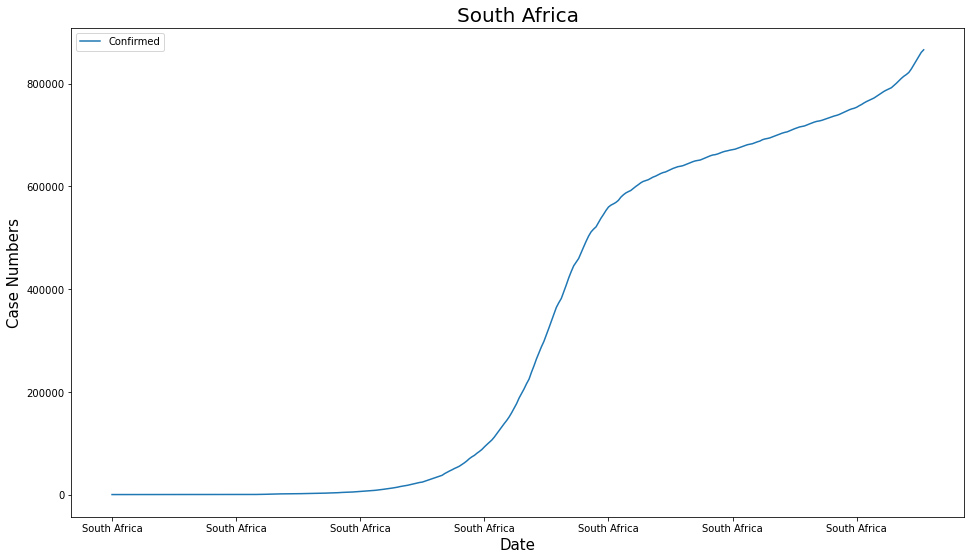

<Figure size 5760x2880 with 0 Axes>

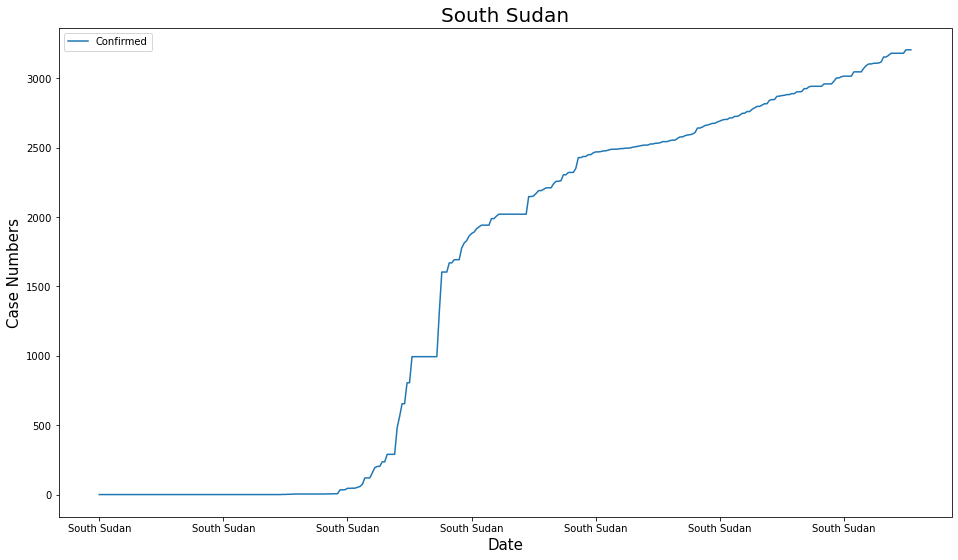

<Figure size 5760x2880 with 0 Axes>

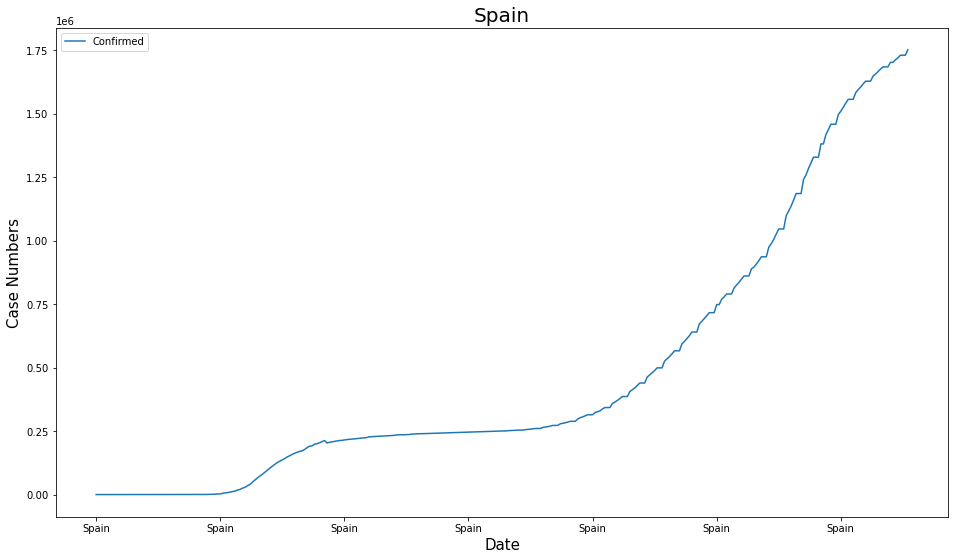

<Figure size 5760x2880 with 0 Axes>

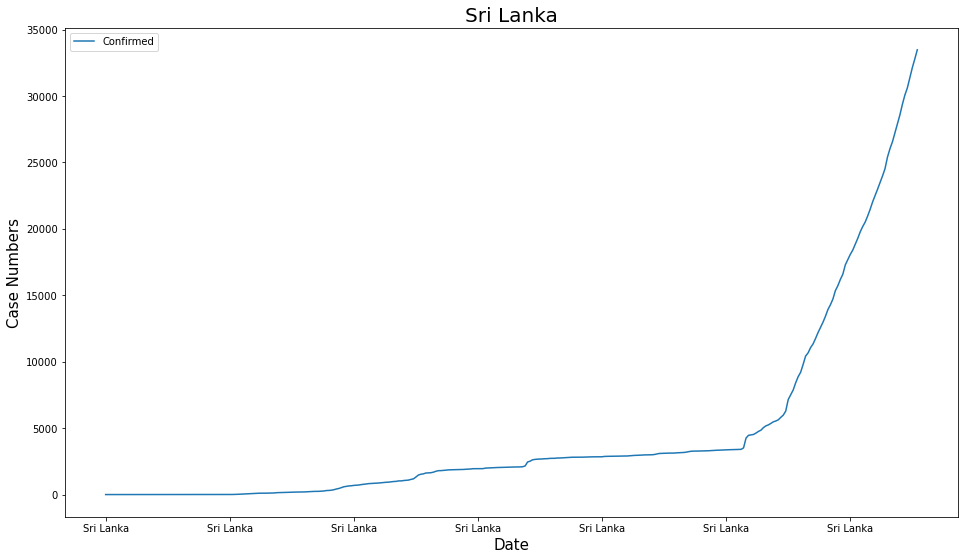

<Figure size 5760x2880 with 0 Axes>

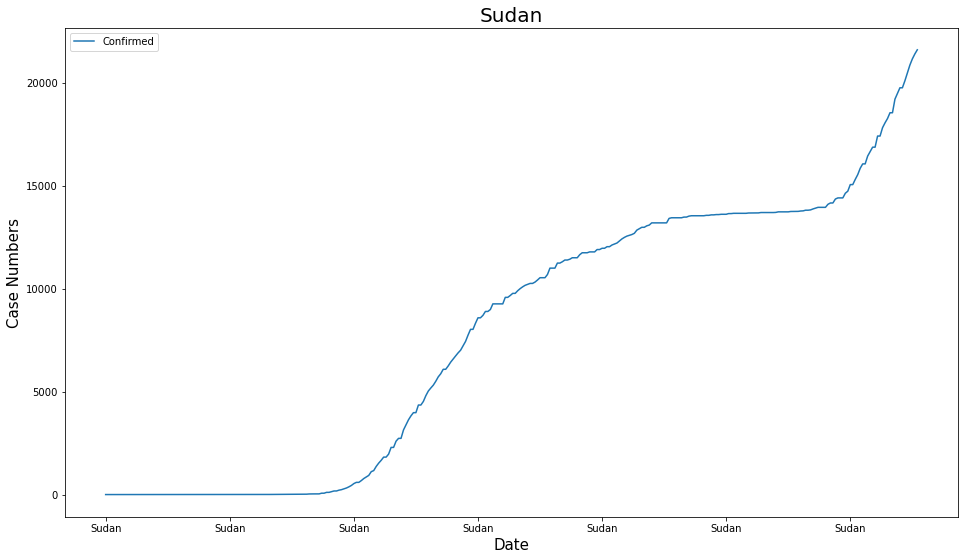

<Figure size 5760x2880 with 0 Axes>

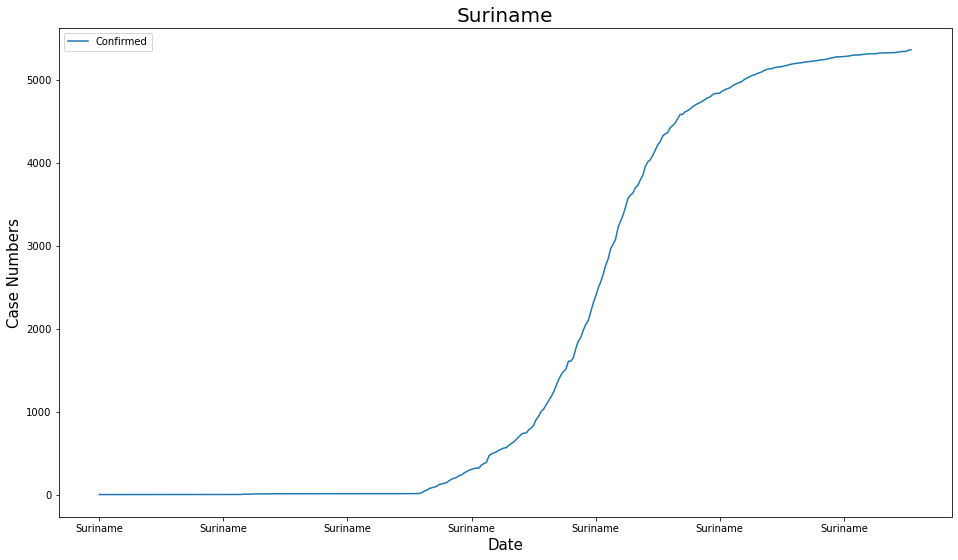

<Figure size 5760x2880 with 0 Axes>

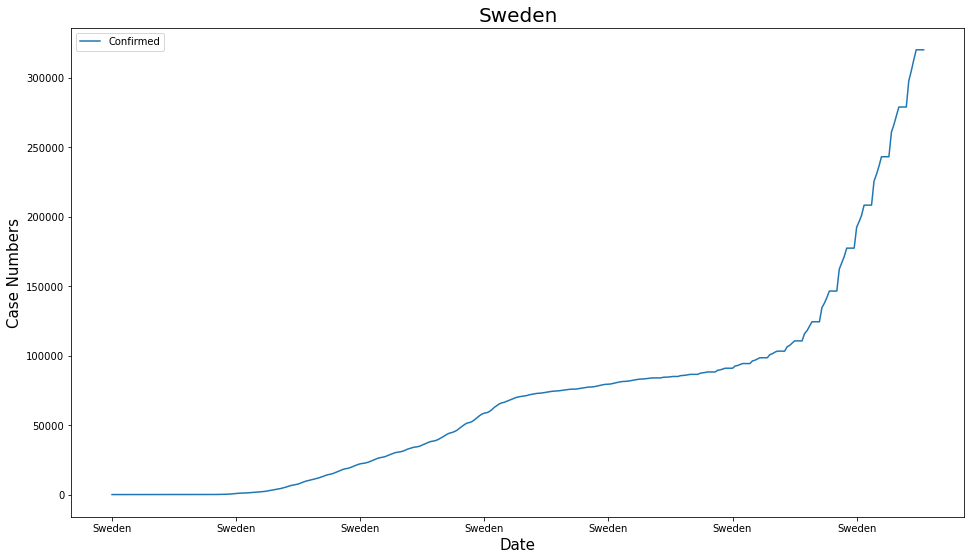

<Figure size 5760x2880 with 0 Axes>

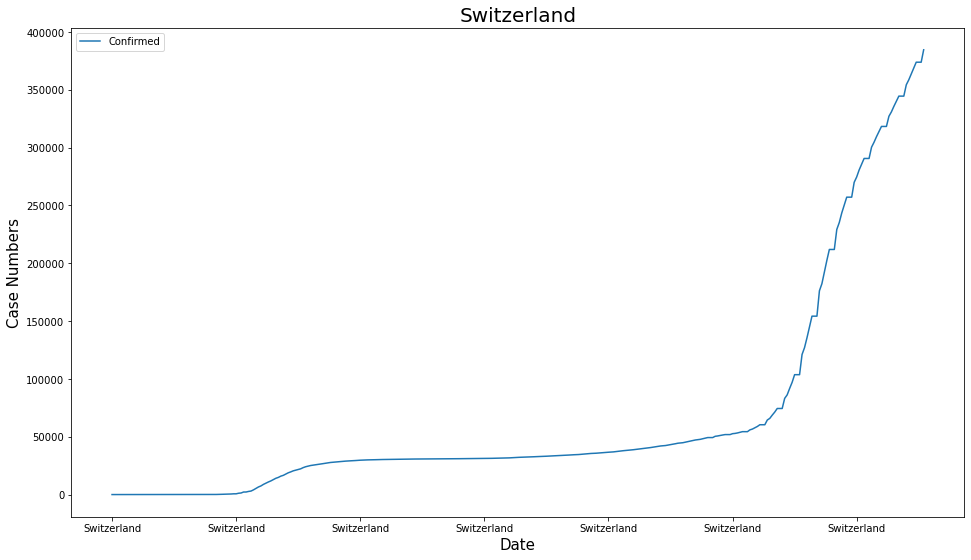

<Figure size 5760x2880 with 0 Axes>

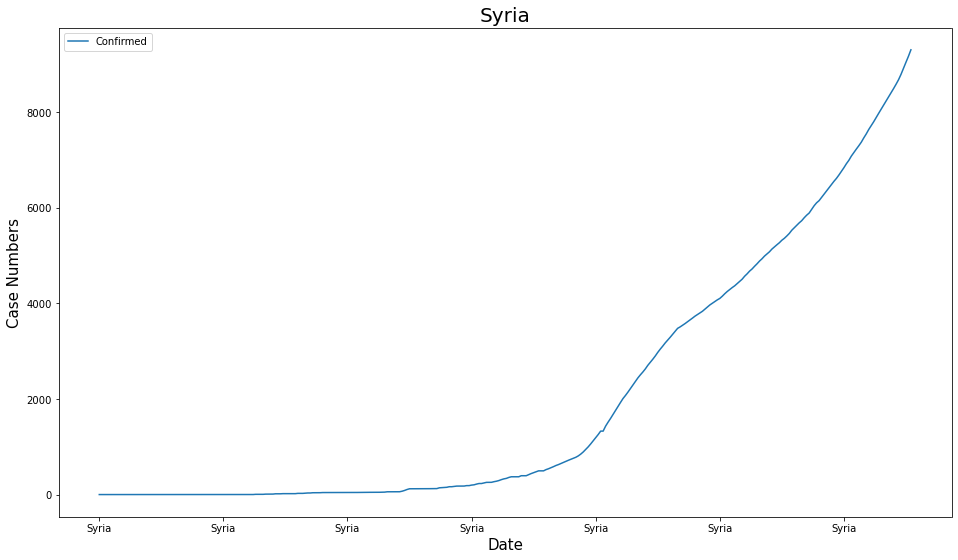

<Figure size 5760x2880 with 0 Axes>

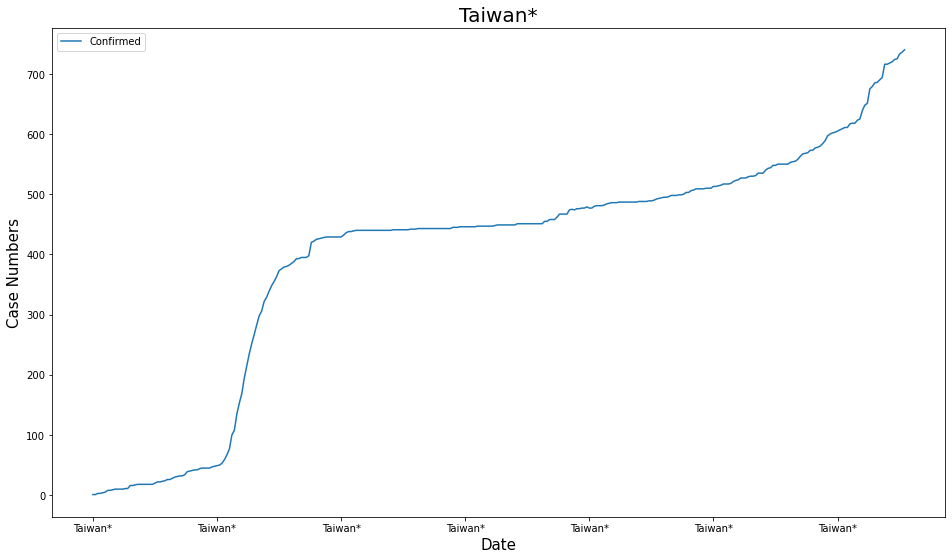

<Figure size 5760x2880 with 0 Axes>

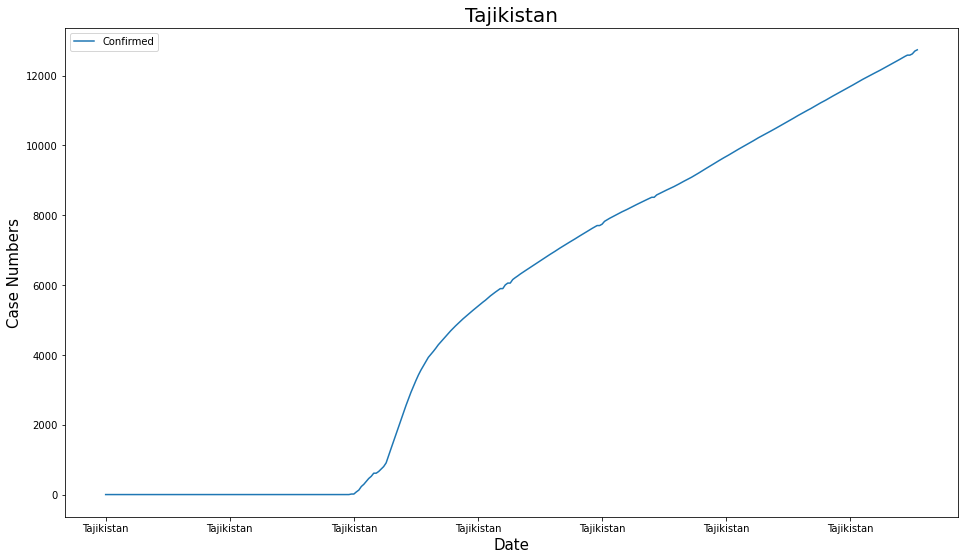

<Figure size 5760x2880 with 0 Axes>

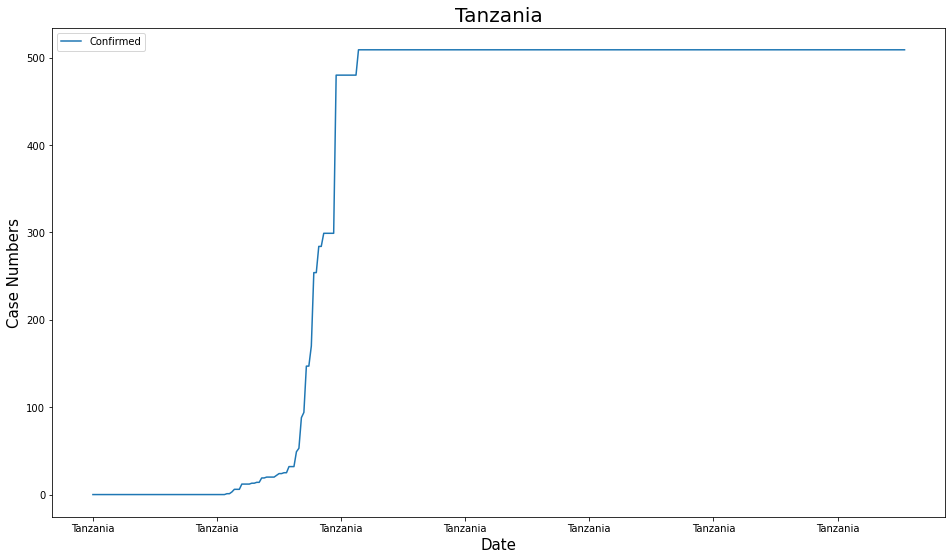

<Figure size 5760x2880 with 0 Axes>

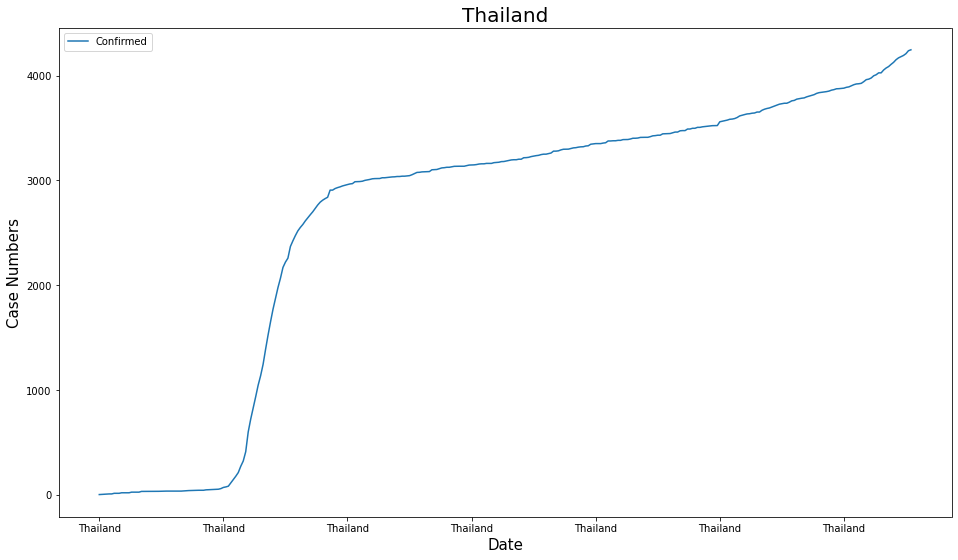

<Figure size 5760x2880 with 0 Axes>

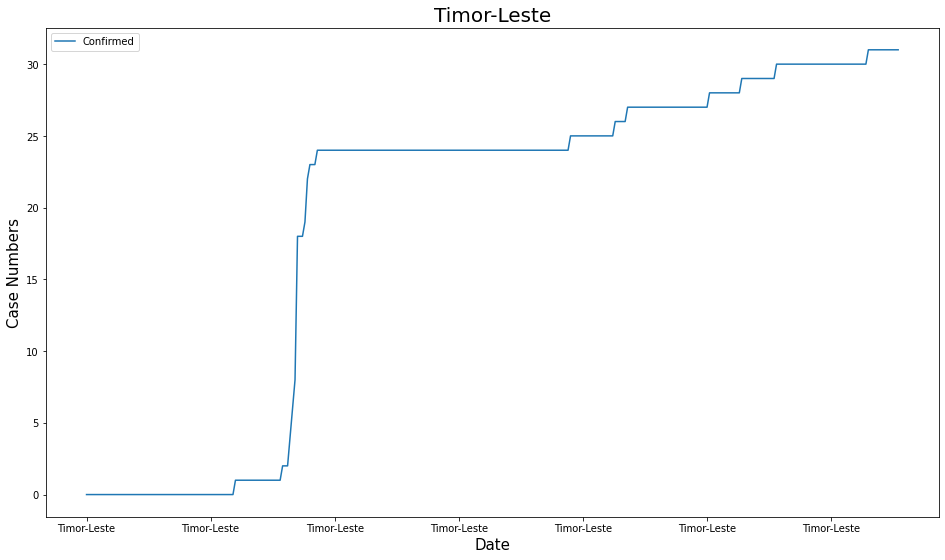

<Figure size 5760x2880 with 0 Axes>

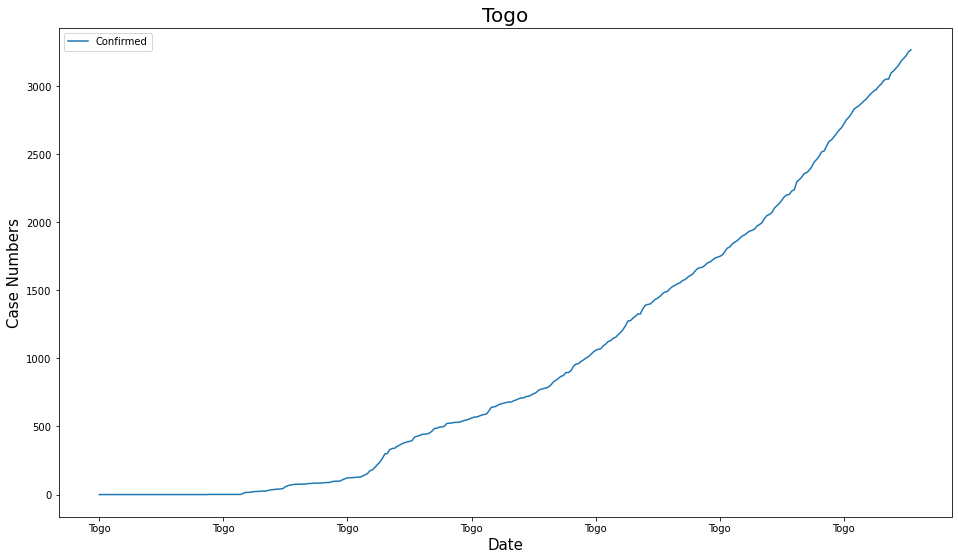

<Figure size 5760x2880 with 0 Axes>

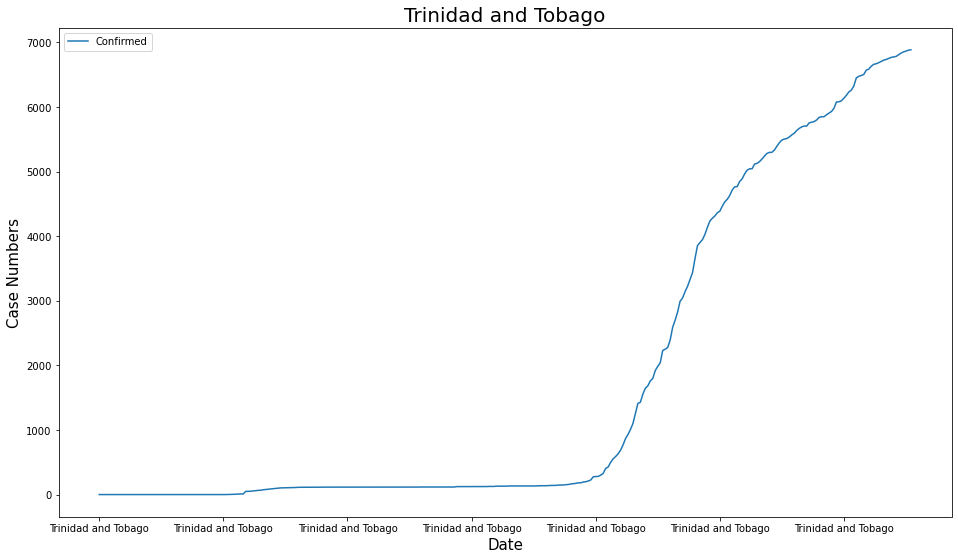

<Figure size 5760x2880 with 0 Axes>

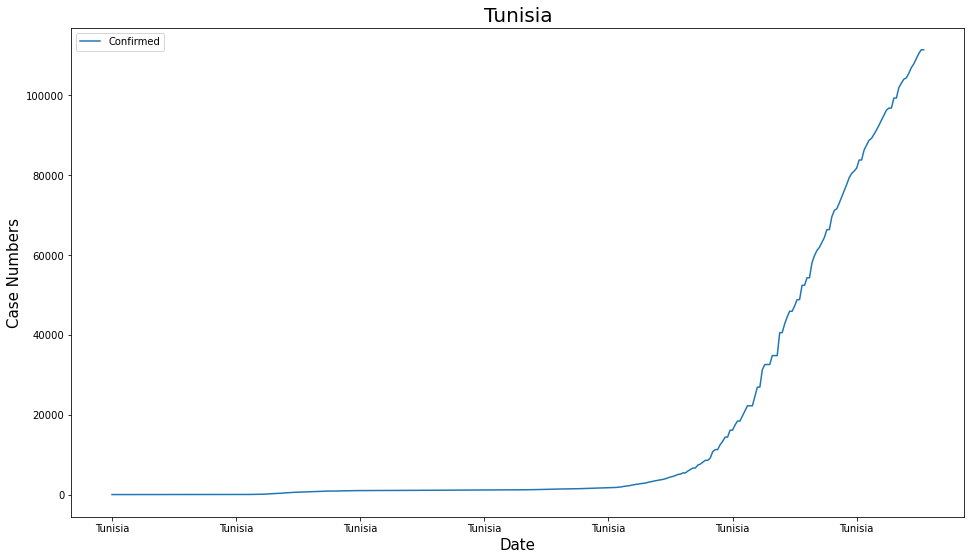

<Figure size 5760x2880 with 0 Axes>

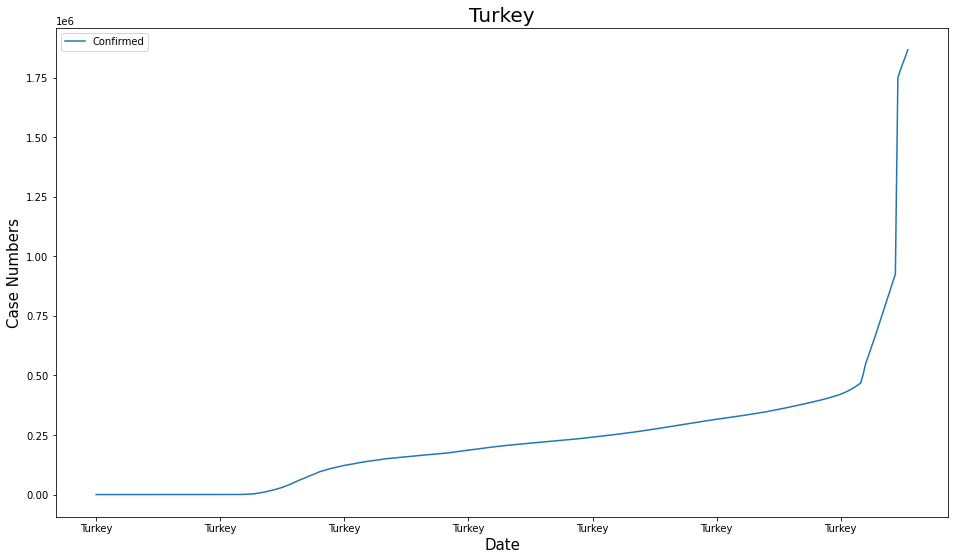

<Figure size 5760x2880 with 0 Axes>

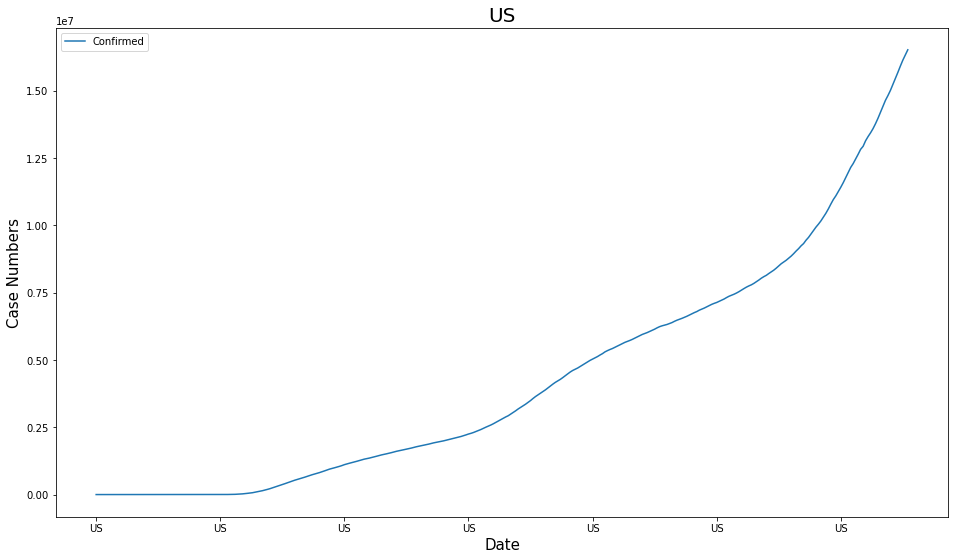

<Figure size 5760x2880 with 0 Axes>

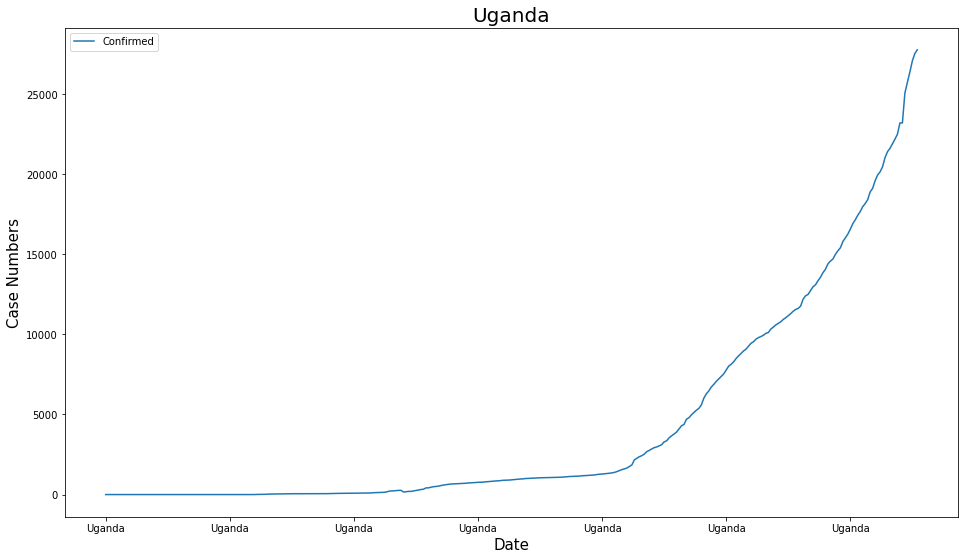

<Figure size 5760x2880 with 0 Axes>

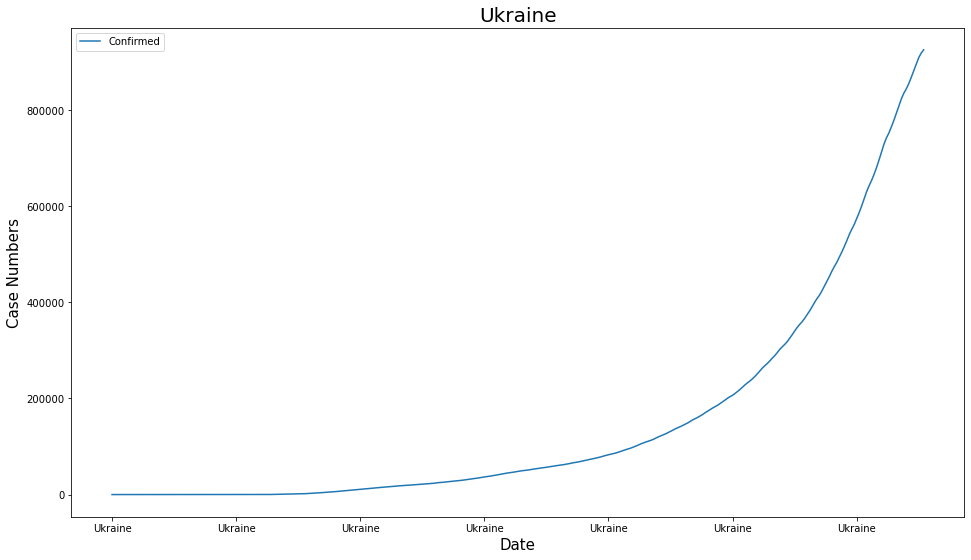

<Figure size 5760x2880 with 0 Axes>

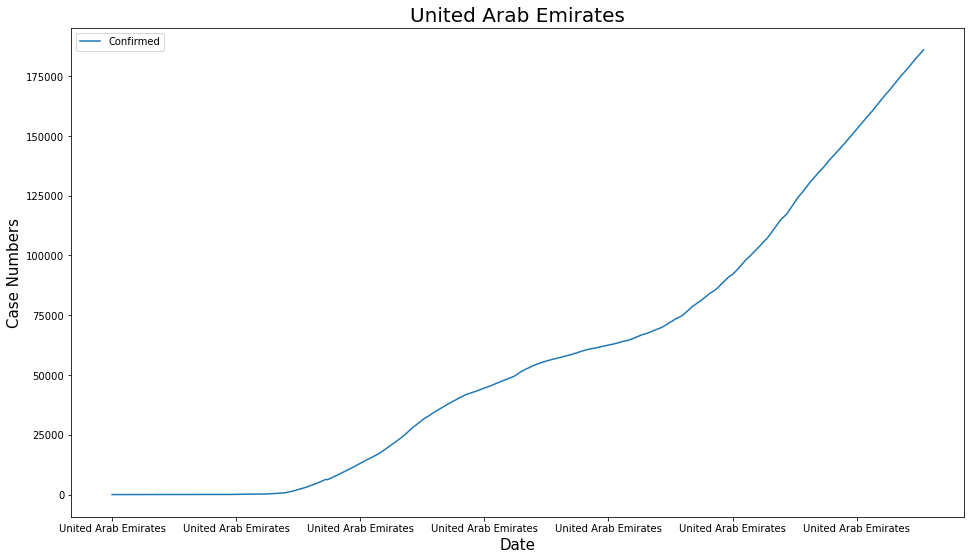

<Figure size 5760x2880 with 0 Axes>

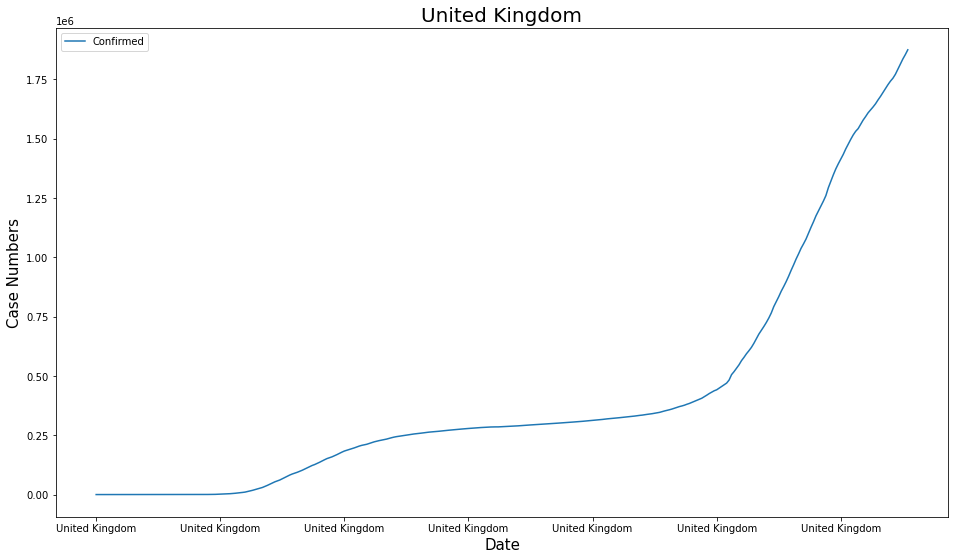

<Figure size 5760x2880 with 0 Axes>

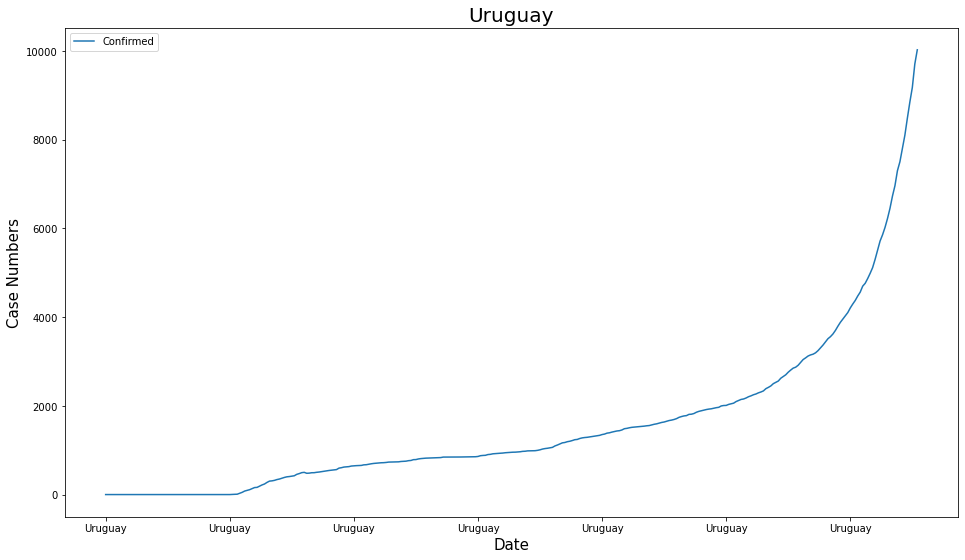

<Figure size 5760x2880 with 0 Axes>

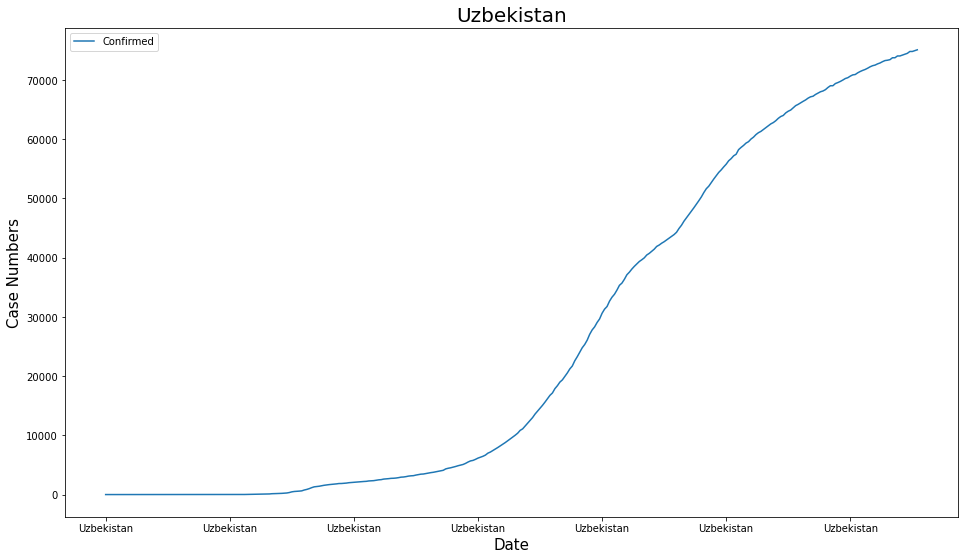

<Figure size 5760x2880 with 0 Axes>

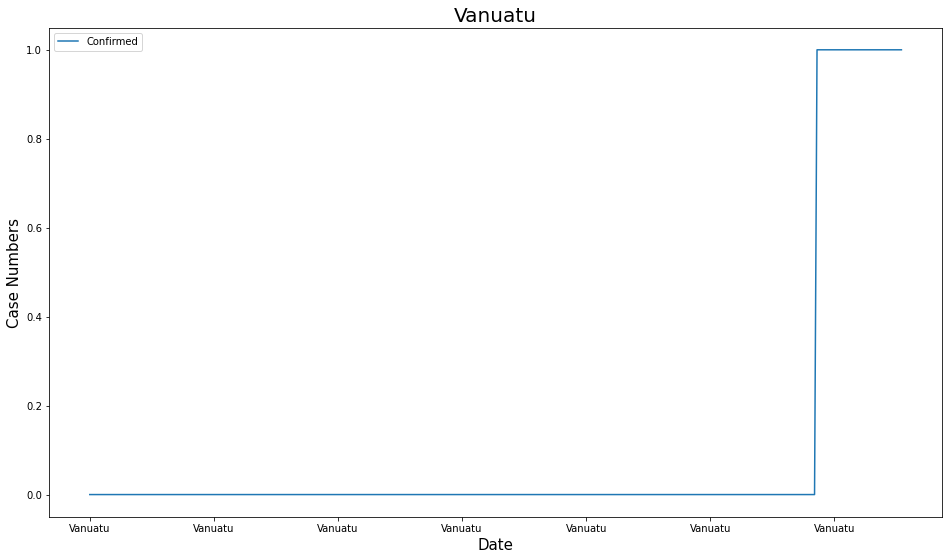

<Figure size 5760x2880 with 0 Axes>

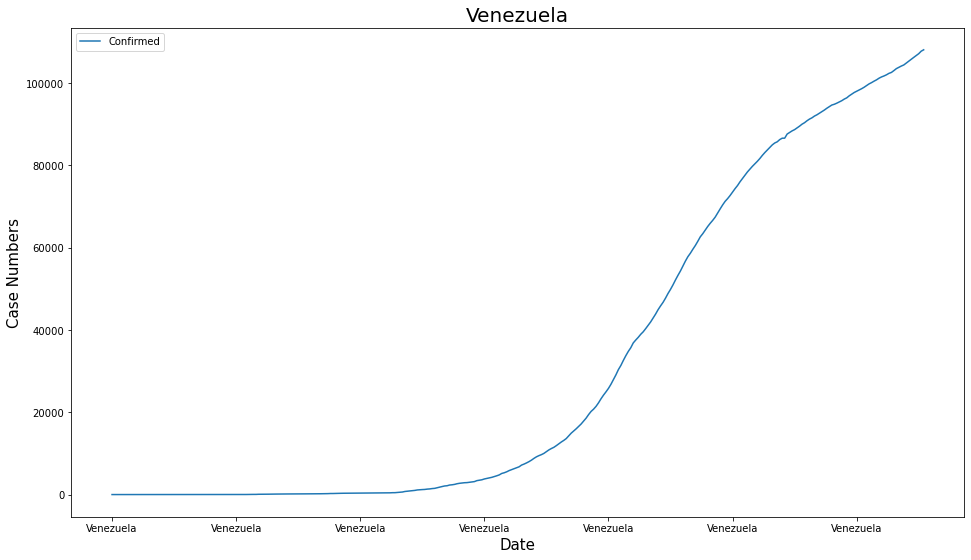

<Figure size 5760x2880 with 0 Axes>

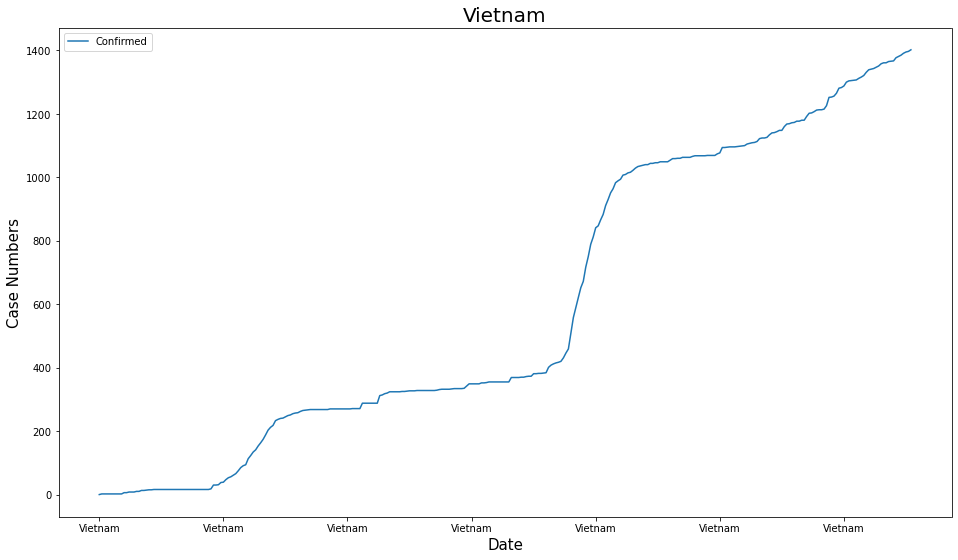

<Figure size 5760x2880 with 0 Axes>

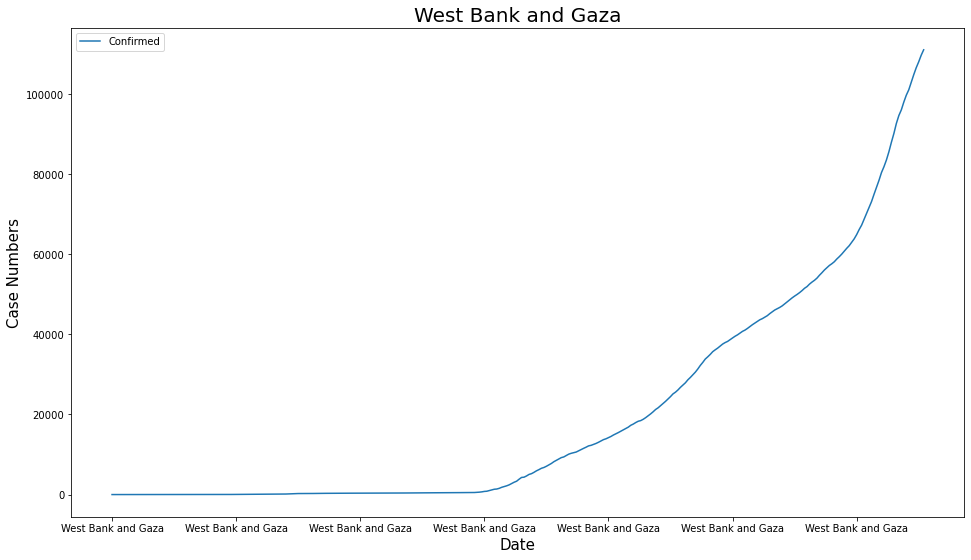

<Figure size 5760x2880 with 0 Axes>

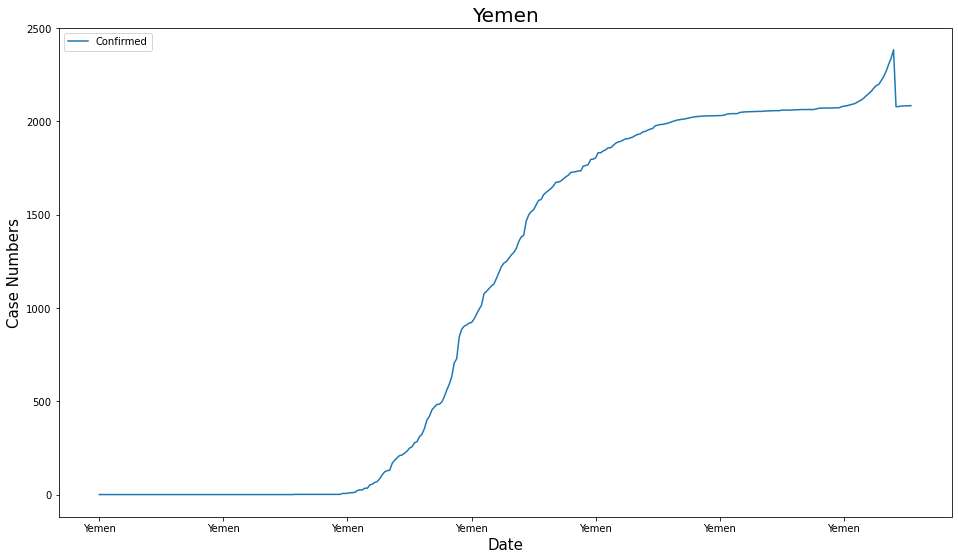

<Figure size 5760x2880 with 0 Axes>

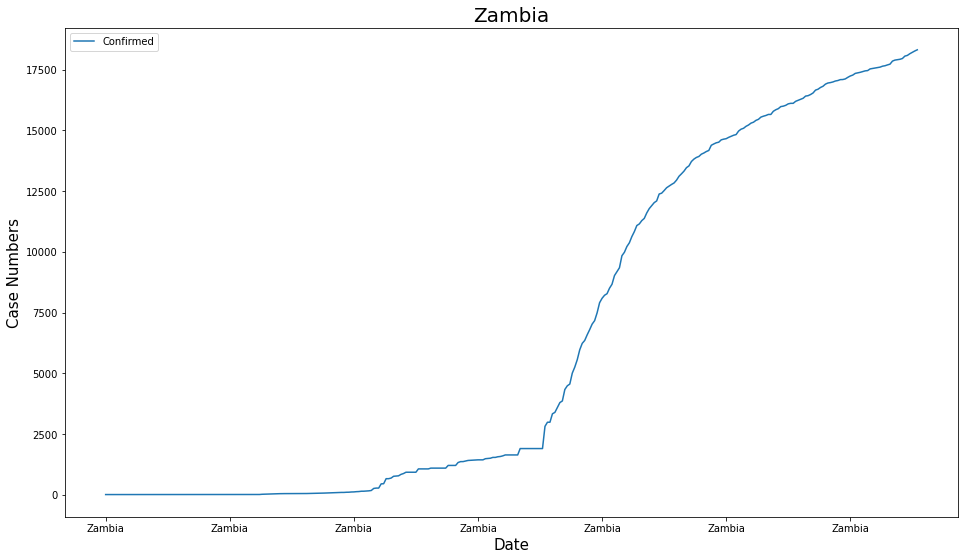

<Figure size 5760x2880 with 0 Axes>

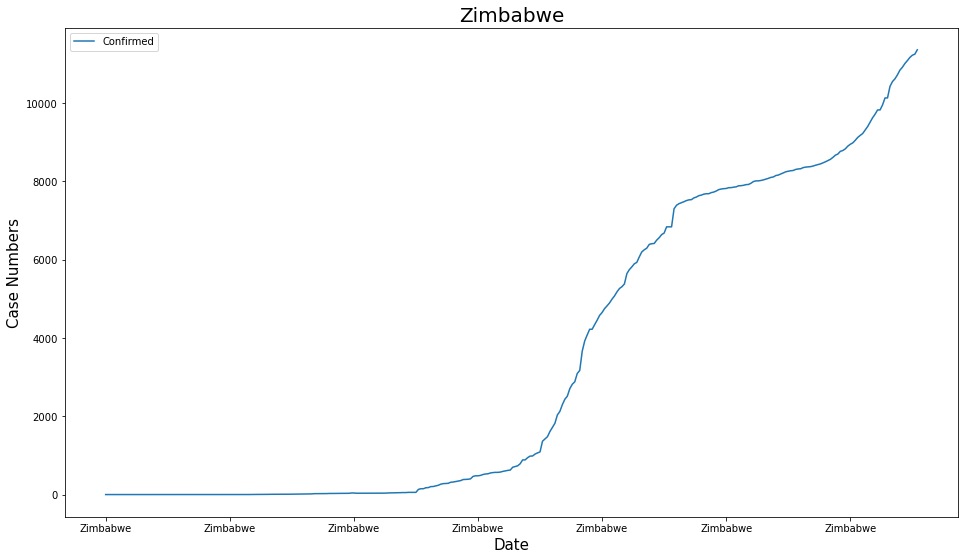

In [460]:
# Checking Each Country for exponential growth
from matplotlib.backends.backend_pdf import PdfPages


# I decided to save all of the graphs on a multipage pdf for ease of viewing and analyzing
pp = PdfPages('multipage.pdf')

countries = countries.rename(columns={'Country/Region': 'Countries'})

country_list = list(countries.Countries.unique())


fig, ax = plt.subplots(nrows=2, ncols=2)

for i in country_list:
    lil_df = countries[countries.Countries == i]
    plt.figure(figsize=(80,40)); lil_df.plot(x='Countries', y='Confirmed');
    
    plt.title(i, fontsize=20)

    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Case Numbers', fontsize=15)
    plt.savefig(pp, format='pdf')

    
pp.close()


    

In [461]:
#Bar Chart with Deaths to Cases Ratio

# Create a bar plot that shows the number of deaths per 100 confirmed cases (observed
# case-fatality ratio) for the 20 most affected countries. See Figure 1 for an example.

last_day_df.head()

last_day_df['Case Fatality Ratio'] = last_day_df['Deaths'] / last_day_df['Confirmed'] * 100
last_day_df = last_day_df.rename(columns={'Country/Region': 'Country'})


last_day_df[last_day_df.Country == 'Mexico'].head()

twenty_worst_fatality = last_day_df.sort_values(by='Case Fatality Ratio', ascending=False).head(21)
twenty_worst_fatality = twenty_worst_fatality[twenty_worst_fatality.Country != 'MS Zaandam']

bad_fatality = twenty_worst_fatality[['Country', 'Case Fatality Ratio']]



<ipython-input-462-c62ca157dcc7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_fatality.sort_values('Case Fatality Ratio',inplace=True, ascending=False)


<Figure size 5760x2880 with 0 Axes>

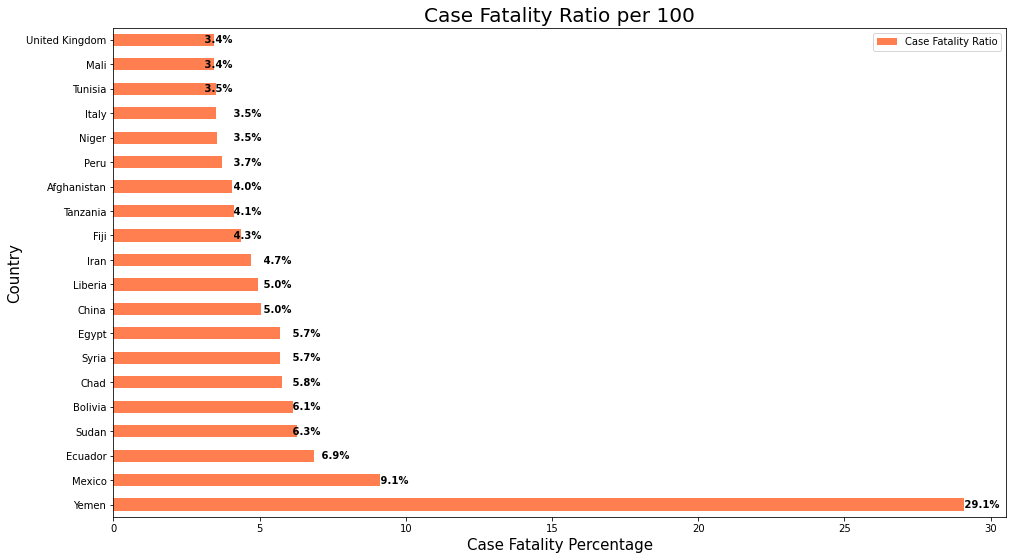

In [462]:
# Creating the barplot
plt.figure(figsize=(80,40)); bad_fatality.plot.barh(x='Country', y='Case Fatality Ratio', color='coral');

plt.title('Case Fatality Ratio per 100', fontsize=20)

plt.xlabel('Case Fatality Percentage', fontsize=15)
plt.ylabel('Country', fontsize=15)
bad_fatality.sort_values('Case Fatality Ratio',inplace=True, ascending=False)


for i, v in enumerate(bad_fatality['Case Fatality Ratio']):
    plt.text(round(v), i, " "+str(round(v, 1))+'%', va='center', fontweight='bold')


In [463]:
# 7. Compute the ratio between the total number of confirmed cases and the population
# size for each country. The file worldpopulation.json contains data on the population
# size of each country. What are the 10 countries with the highest number of confirmed
# COVID-19 cases per capita?

#Loading into a dataframe from a json file
pop = pd.read_json('../data/worldpopulation.json')
#I wanted to make sure I capture the US in the data
pop = pop.replace('U.S.', 'US')

totals = last_day_df[['Country', 'Confirmed', 'Deaths', 'Case Fatality Ratio']]

totals = totals.merge(pop, left_on='Country', right_on='country')
totals = totals.drop(columns=['country'])

totals['Cases per Capita'] = totals['Confirmed'] / totals['population'] 
per_capita = totals[['Country', 'Confirmed', 'population', 'Cases per Capita']].sort_values(by='Cases per Capita', ascending=False)



per_capita.sort_values(by='Cases per Capita', ascending=False).head(10)

Country  Confirmed  population  Cases per Capita
3       Andorra       7382       68728          0.107409
94   Luxembourg      41900      584103          0.071734
108  Montenegro      41803      626250          0.066751
12      Bahrain      89268     1418895          0.062914
128       Qatar     141121     2338085          0.060358
135  San Marino       1934       32104          0.060242
16      Belgium     609211    11443830          0.053235
164          US   16519462   326474013          0.050600
7       Armenia     148682     3031670          0.049043
58      Georgia     191063     3972532          0.048096

In [464]:
#  8. In this part we would like to test the hypothesis that the spread of the virus is slowed
# down by warm weather. Plot a graph of the monthly number of confirmed cases vs. the
# average monthly temperature for a few selected countries, and analyze the correlation
# between these two factors. You may use the file climate.json which contains monthly
# climate date from over 100 stations around the world, or you can use your own data
# sources.

#get json file and turn it into a dataframe

temperatures = pd.read_json('../data/climate.json')

#make into dataframe

#dropping unneccessary columns
temperatures = temperatures.drop(columns=['city', 'id'])
temperatures = temperatures.replace('United States', 'US')

#merge dataframe
totals = totals.merge(temperatures,left_on='Country', right_on='country')

#Checking the dataframe where I see monthlyAvgs did not load properly
totals.head()

Country  Confirmed  Deaths  Case Fatality Ratio  Rank  population  World  \
0  Argentina    1503222   41041             2.730202    32    44272125  0.006   
1  Australia      28048     908             3.237307    53    24641662  0.003   
2  Australia      28048     908             3.237307    53    24641662  0.003   
3  Australia      28048     908             3.237307    53    24641662  0.003   
4  Australia      28048     908             3.237307    53    24641662  0.003   

   Cases per Capita    country  \
0          0.033954  Argentina   
1          0.001138  Australia   
2          0.001138  Australia   
3          0.001138  Australia   
4          0.001138  Australia   

                                          monthlyAvg  
0  [{'high': 29, 'low': 21, 'dryDays': 21, 'snowD...  
1  [{'high': 29, 'low': 21, 'dryDays': 17, 'snowD...  
2  [{'high': 28, 'low': 13, 'dryDays': 22, 'snowD...  
3  [{'high': 25, 'low': 14, 'dryDays': 22, 'snowD...  
4  [{'high': 27, 'low': 19, 'dryDays': 15, 'snowD...

The Correlation is: 0.2590626990882743


<ipython-input-465-dce88a187277>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_df['Date'] = canada_df['Date'].str.slice(0,7)


<Figure size 5760x2880 with 0 Axes>

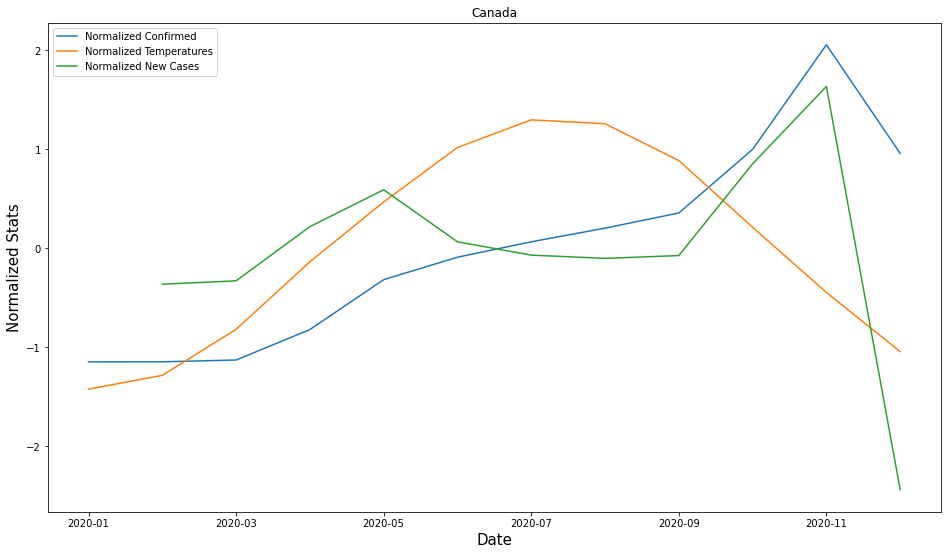

In [465]:

# Temperature Analysis in Canada
canada = totals[totals.Country == "Canada"]


canada_weather = []

for i in canada['monthlyAvg']:

    lil_df = pd.DataFrame(i)
    lil_df = lil_df[['high', 'low']]
    canada_weather.append(lil_df)

canada_weather = pd.concat(canada_weather, axis=1).mean(axis=1)
canada_weather.head()

dates = pd.DataFrame(['2020-01', 
                           '2020-02',
                          '2020-03',
                          '2020-04',
                          '2020-05',
                          '2020-06',
                          '2020-07',
                          '2020-08',
                          '2020-09',
                          '2020-10',
                          '2020-11',
                          '2020-12'])

dates = dates.rename(columns={0:'Date'})

canada_weather = pd.concat([dates, canada_weather], axis=1)

canada_weather = canada_weather.rename(columns={0:'avg_temp'})

canada_df = countries[countries.Countries == 'Canada']
# makes matching the frames possible
canada_df['Date'] = canada_df['Date'].str.slice(0,7)

canada_df = canada_df.groupby(['Date', 'Countries']).sum()
canada_df = canada_df.reset_index()


canada_df = canada_df.merge(canada_weather, on='Date')

#calculating the new cases is very important to actually understanding the growth of the virus
canada_df['New Cases'] = canada_df['Confirmed'].diff()


canada_df = canada_df[['Date', 'Confirmed', 'avg_temp', 'New Cases']]

#Normalizing the data will allow for an easier analysis
canada_df['Normalized Confirmed']=(canada_df['Confirmed']-canada_df['Confirmed'].mean())/canada_df['Confirmed'].std()
canada_df['Normalized Temperatures']=(canada_df['avg_temp']-canada_df['avg_temp'].mean())/canada_df['avg_temp'].std()
canada_df['Normalized New Cases']=(canada_df['New Cases']-canada_df['New Cases'].mean())/canada_df['New Cases'].std()


canada_df = canada_df[['Date', 'Normalized Confirmed', 'Normalized Temperatures', 'Normalized New Cases']]

plt.figure(figsize=(80,40)); canada_df.plot(x='Date');

plt.title('Canada')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Normalized Stats', fontsize=15)


column_1 = canada_df['Normalized Confirmed']
column_2 = canada_df['Normalized Temperatures']
correlation = column_1. corr(column_2)

print(f'The Correlation is: {correlation}')

In [466]:
totals = totals.rename(columns={'Country/Region': "Countries"})
countries = countries.rename(columns={'Country/Region': "Countries"})
canada_df.head()

Date  Normalized Confirmed  Normalized Temperatures  \
0  2020-01             -1.145756                -1.421991   
1  2020-02             -1.145678                -1.282504   
2  2020-03             -1.127540                -0.817548   
3  2020-04             -0.820037                -0.135612   
4  2020-05             -0.315688                 0.468831   

   Normalized New Cases  
0                   NaN  
1             -0.361844  
2             -0.327687  
3              0.219591  
4              0.591883

The Correlation is: -0.11429932058415714


<ipython-input-467-1253eb92856f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_df['Date'] = italy_df['Date'].str.slice(0,7)


<Figure size 5760x2880 with 0 Axes>

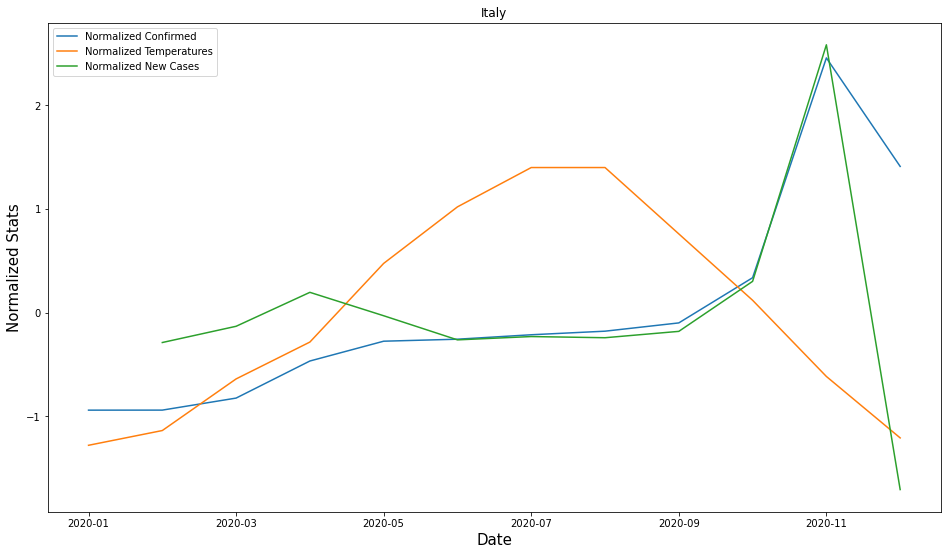

In [467]:
#Temperate analysis in Italy

italy = totals[totals.Country == "Italy"]


italy_weather = []

for i in italy['monthlyAvg']:

    lil_df = pd.DataFrame(i)
    lil_df = lil_df[['high', 'low']]
    italy_weather.append(lil_df)

italy_weather = pd.concat(italy_weather, axis=1).mean(axis=1)

dates = pd.DataFrame(['2020-01', 
                           '2020-02',
                          '2020-03',
                          '2020-04',
                          '2020-05',
                          '2020-06',
                          '2020-07',
                          '2020-08',
                          '2020-09',
                          '2020-10',
                          '2020-11',
                          '2020-12'])

dates = dates.rename(columns={0:'Date'})



italy_weather = pd.concat([dates, italy_weather], axis=1)

italy_weather = italy_weather.rename(columns={0:'avg_temp'})


italy_df = countries[countries.Countries == 'Italy']
# makes matching the frames possible
italy_df['Date'] = italy_df['Date'].str.slice(0,7)

italy_df = italy_df.groupby(['Date', 'Countries']).sum()
italy_df = italy_df.reset_index()
italy_df.head(10)

italy_df = italy_df.merge(italy_weather, on='Date')

#calculating the new cases is very important to actually understanding the growth of the virus
italy_df['New Cases'] = italy_df['Confirmed'].diff()

italy_df = italy_df[['Date', 'Confirmed', 'avg_temp', 'New Cases']]
#Again, normalizing for easy analysis
italy_df['Normalized Confirmed']=(italy_df['Confirmed']-italy_df['Confirmed'].mean())/italy_df['Confirmed'].std()
italy_df['Normalized Temperatures']=(italy_df['avg_temp']-italy_df['avg_temp'].mean())/italy_df['avg_temp'].std()
italy_df['Normalized New Cases']=(italy_df['New Cases']-italy_df['New Cases'].mean())/italy_df['New Cases'].std()

italy_df = italy_df[['Date', 'Normalized Confirmed', 'Normalized Temperatures', 'Normalized New Cases']]

plt.figure(figsize=(80,40)); italy_df.plot(x='Date');

plt.title('Italy')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Normalized Stats', fontsize=15)

column_1 = italy_df['Normalized Confirmed']
column_2 = italy_df['Normalized Temperatures']
correlation = column_1. corr(column_2)

print(f'The Correlation is: {correlation}')


The Correlation is: 0.10130650080196218


<ipython-input-468-8d31ca8f6a54>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sweden_df['Date'] = sweden_df['Date'].str.slice(0,7)


<Figure size 5760x2880 with 0 Axes>

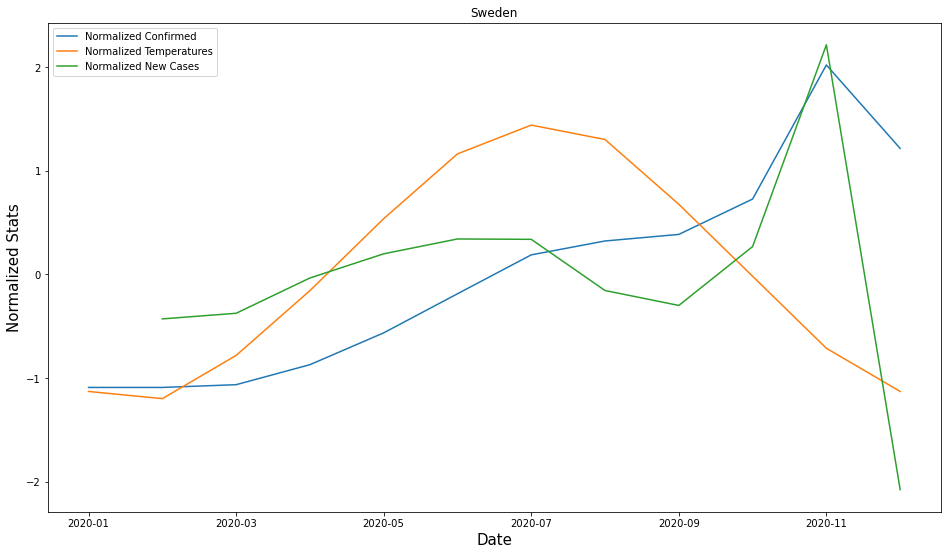

In [468]:
#Temperature Analysis in Sweden

sweden = totals[totals.Country == "Sweden"]



sweden_weather = []

for i in sweden['monthlyAvg']:

    lil_df = pd.DataFrame(i)
    lil_df = lil_df[['high', 'low']]
    sweden_weather.append(lil_df)

sweden_weather = pd.concat(sweden_weather, axis=1).mean(axis=1)
sweden_weather.head(12)


dates = pd.DataFrame(['2020-01', 
                           '2020-02',
                          '2020-03',
                          '2020-04',
                          '2020-05',
                          '2020-06',
                          '2020-07',
                          '2020-08',
                          '2020-09',
                          '2020-10',
                          '2020-11',
                          '2020-12'])

dates = dates.rename(columns={0:'Date'})

sweden_weather = pd.concat([dates, sweden_weather], axis=1)

sweden_weather = sweden_weather.rename(columns={0:'avg_temp'})

sweden_df = countries[countries.Countries == 'Sweden']
# makes matching the frames possible
sweden_df['Date'] = sweden_df['Date'].str.slice(0,7)

sweden_df = sweden_df.groupby(['Date', 'Countries']).sum()
sweden_df = sweden_df.reset_index()


sweden_df = sweden_df.merge(sweden_weather, on='Date')



#calculating the new cases is very important to actually understanding the growth of the virus
sweden_df['New Cases'] = sweden_df['Confirmed'].diff()

sweden_df = sweden_df[['Date', 'Confirmed', 'avg_temp', 'New Cases']]

sweden_df['Normalized Confirmed']=(sweden_df['Confirmed']-sweden_df['Confirmed'].mean())/sweden_df['Confirmed'].std()
sweden_df['Normalized Temperatures']=(sweden_df['avg_temp']-sweden_df['avg_temp'].mean())/sweden_df['avg_temp'].std()
sweden_df['Normalized New Cases']=(sweden_df['New Cases']-sweden_df['New Cases'].mean())/sweden_df['New Cases'].std()

sweden_df = sweden_df[['Date', 'Normalized Confirmed', 'Normalized Temperatures', 'Normalized New Cases']]

plt.figure(figsize=(80,40)); sweden_df.plot(x='Date');

plt.title('Sweden')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Normalized Stats', fontsize=15)

column_1 = sweden_df['Normalized Confirmed']
column_2 = sweden_df['Normalized Temperatures']
correlation = column_1. corr(column_2)

print(f'The Correlation is: {correlation}')

<h2> The next section is used to analyze my own research question.</h2>
<br>
<h3> Can we better understand the seasonal impact on covid by looking at the different hemispheres?</h3>

In [469]:
# 9. my research question..

# Did the Southern Hemisphere Spike in the summer (can check with rising temperatures)

#Southern Hemisphere Countries

southern_hem = ['Australia', 
                'Papua New Guinea',
                'Argentina',
                'Bolivia',
                'Chile',
                'Paraguay',
                'Peru',
                'Uruguay',
                'Brazil',
                'Ecuador',
                'Angola',
                'Botswana',
                'Burundi',
                'Comoros',
                'Eswatini',
                'Lesotho',
                'Madagascar',
                'Malawi',
                'Mauritius',
                'Mayotte',
                'Mozambique',
                'Namibia',
                'Reunion',
                'Rwanda',
                'Seychelles',
                'South Africa',
                'Tanzania',
                'Zambia',
                'Zimbabwe']


#Northern Hemisphere Countries



northern_hem = ['Austria',
              'Belgium',
              'Bulgaria', 
              'Canada', 
              'China', 
              'France', 
              'Germany', 
              'Hungary', 
              'India', 
              'Japan', 
              'Mexico', 
              'Netherlands', 
              'Norway', 
              'Poland', 
              'Romania', 
              'Russia', 
              'Spain', 
              'Sweden', 
              'Switzerland']





<ipython-input-470-a60de7aa1935>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-470-a60de7aa1935>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)


The Correlation is: -0.40195232913927
Papua New Guinea Not Found
The Correlation is: 0.08415631851376432
Bolivia Not Found


<ipython-input-470-a60de7aa1935>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-470-a60de7aa1935>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)


The Correlation is: -0.39353378557965646
Paraguay Not Found
Peru Not Found
Uruguay Not Found
The Correlation is: -0.13434030798329036
Ecuador Not Found
Angola Not Found
Botswana Not Found
Burundi Not Found
Comoros Not Found
Eswatini Not Found
Lesotho Not Found
Madagascar Not Found
Malawi Not Found
Mauritius Not Found
Mayotte Not Found
Mozambique Not Found
Namibia Not Found
Reunion Not Found
Rwanda Not Found
Seychelles Not Found
The Correlation is: -0.15269611230207272
Tanzania Not Found
Zambia Not Found
Zimbabwe Not Found


<ipython-input-470-a60de7aa1935>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)


<Figure size 5760x2880 with 0 Axes>

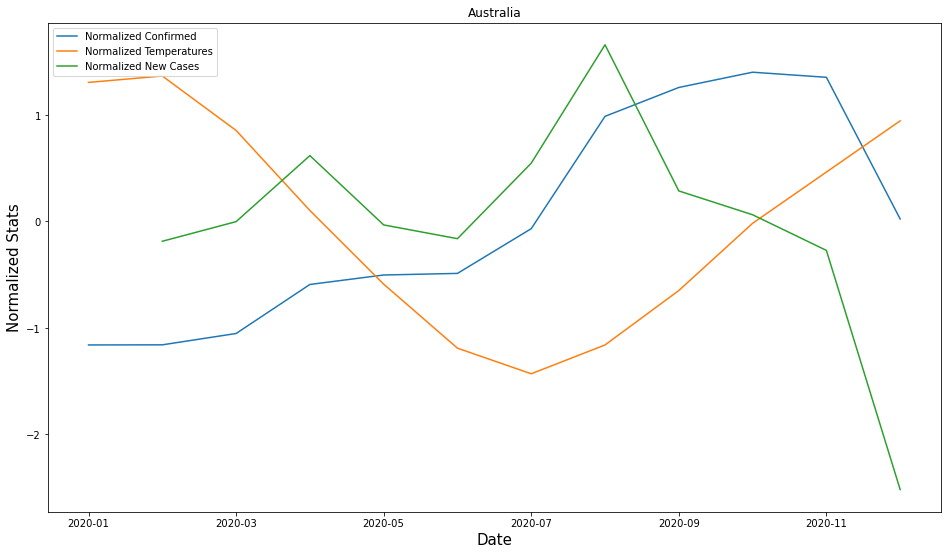

<Figure size 5760x2880 with 0 Axes>

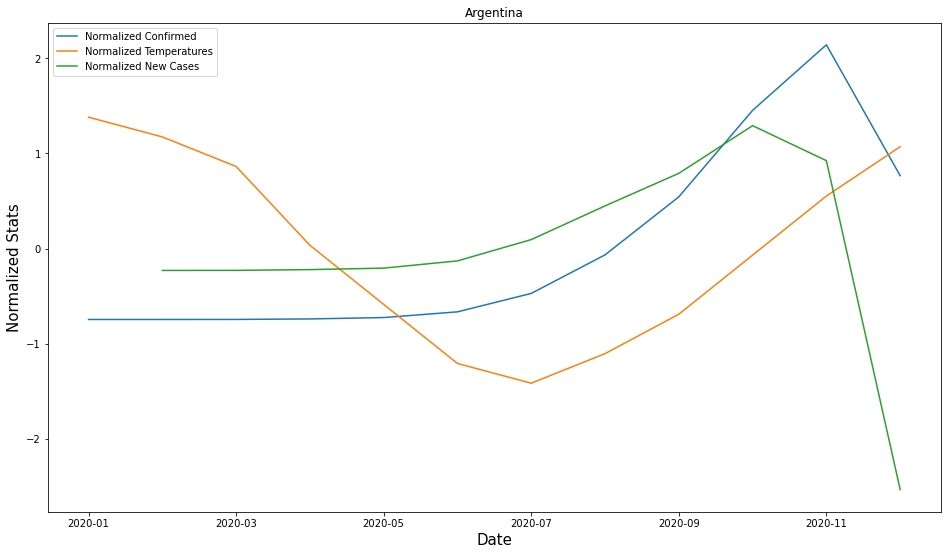

<Figure size 5760x2880 with 0 Axes>

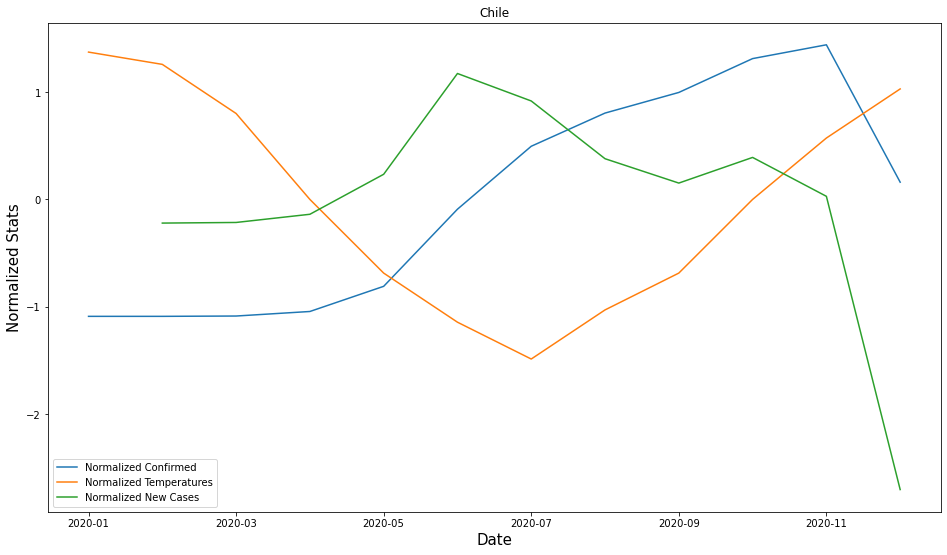

<Figure size 5760x2880 with 0 Axes>

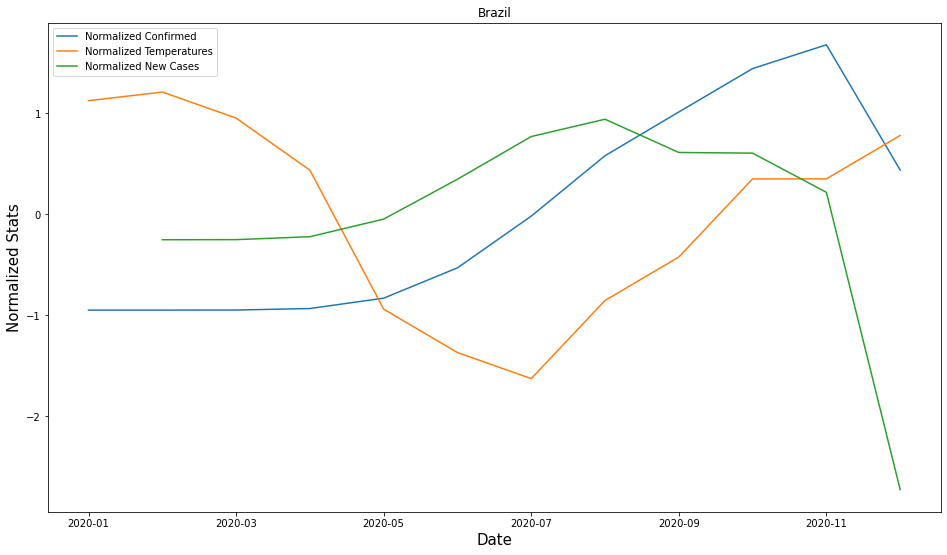

<Figure size 5760x2880 with 0 Axes>

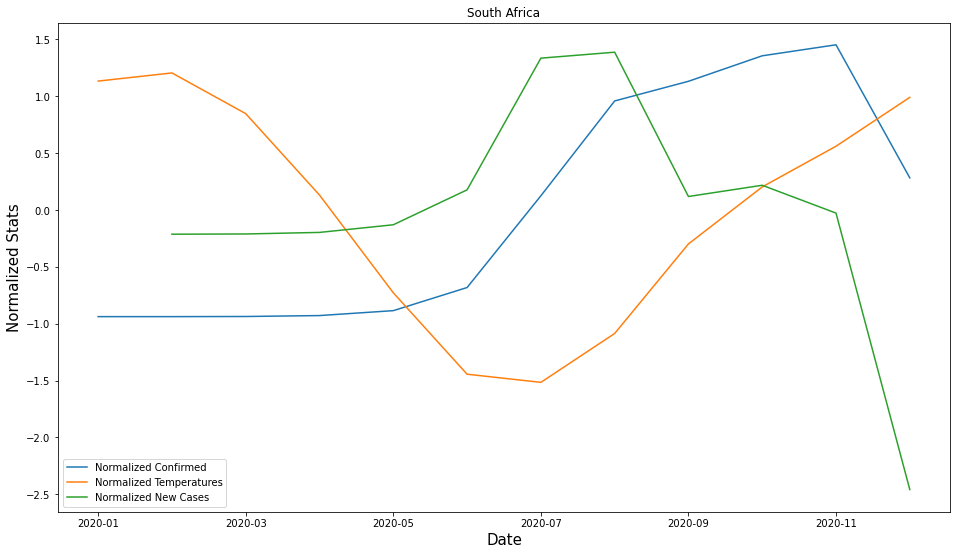

In [470]:
southern = PdfPages('southern.pdf')

#Copies the exact procedure from above

for c in southern_hem:
    
    try:
        country = totals[totals.Country == c]



        weather = []

        for i in country['monthlyAvg']:

            lil_df = pd.DataFrame(i)
            lil_df = lil_df[['high', 'low']]
            weather.append(lil_df)

        weather = pd.concat(weather, axis=1).mean(axis=1)
        weather.head(12)


        dates = pd.DataFrame(['2020-01', 
                                   '2020-02',
                                  '2020-03',
                                  '2020-04',
                                  '2020-05',
                                  '2020-06',
                                  '2020-07',
                                  '2020-08',
                                  '2020-09',
                                  '2020-10',
                                  '2020-11',
                                  '2020-12'])

        dates = dates.rename(columns={0:'Date'})

        weather = pd.concat([dates, weather], axis=1)

        weather = weather.rename(columns={0:'avg_temp'})

        country_df = countries[countries.Countries == c]
        country_df['Date'] = country_df['Date'].str.slice(0,7)

        country_df = country_df.groupby(['Date', 'Countries']).sum()
        country_df = country_df.reset_index()


        country_df = country_df.merge(weather, on='Date')



        country_df.head()
        country_df['New Cases'] = country_df['Confirmed'].diff()
        country_df = country_df[['Date', 'Confirmed', 'avg_temp', 'New Cases']]

        country_df['Normalized Confirmed']=(country_df['Confirmed']-country_df['Confirmed'].mean())/country_df['Confirmed'].std()
        country_df['Normalized Temperatures']=(country_df['avg_temp']-country_df['avg_temp'].mean())/country_df['avg_temp'].std()
        country_df['Normalized New Cases']=(country_df['New Cases']-country_df['New Cases'].mean())/country_df['New Cases'].std()

        country_df = country_df[['Date', 'Normalized Confirmed', 'Normalized Temperatures', 'Normalized New Cases']]

        plt.figure(figsize=(80,40)); country_df.plot(x='Date');

        plt.title(c)

        plt.xlabel('Date', fontsize=15)
        plt.ylabel('Normalized Stats', fontsize=15)

        column_1 = country_df['Normalized Confirmed']
        column_2 = country_df['Normalized Temperatures']
        correlation = column_1. corr(column_2)

        print(f'The Correlation is: {correlation}')
        
        plt.savefig(southern, format='pdf')
        
    except:
        print(f'{c} Not Found')
        
southern.close()

<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)


The Correlation is: -0.3051400676284491
The Correlation is: -0.2082788007993017


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

The Correlation is: -0.32403118129542885
The Correlation is: 0.2590626990882743
The Correlation is: 0.7292465848862368
The Correlation is: -0.2093958984047294


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)


The Correlation is: -0.020898329667171346
The Correlation is: -0.4104221452991628


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)


The Correlation is: -0.056941648091726506
The Correlation is: 0.20686337594215964


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. 

The Correlation is: -0.27465025727602355
The Correlation is: -0.1922054893456875


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); country_df.plot(x='Date');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

The Correlation is: 0.07210883646265381
The Correlation is: -0.3489943311053517


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); country_df.plot(x='Date');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

Romania Not Found
The Correlation is: 0.14698496737319974


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); country_df.plot(x='Date');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

The Correlation is: 0.015122040787629758


<ipython-input-471-d2d9b50b6f94>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Date'] = country_df['Date'].str.slice(0,7)
<ipython-input-471-d2d9b50b6f94>:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(80,40)); country_df.plot(x='Date');
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

The Correlation is: 0.10130650080196218
The Correlation is: -0.2571024040429303


<Figure size 5760x2880 with 0 Axes>

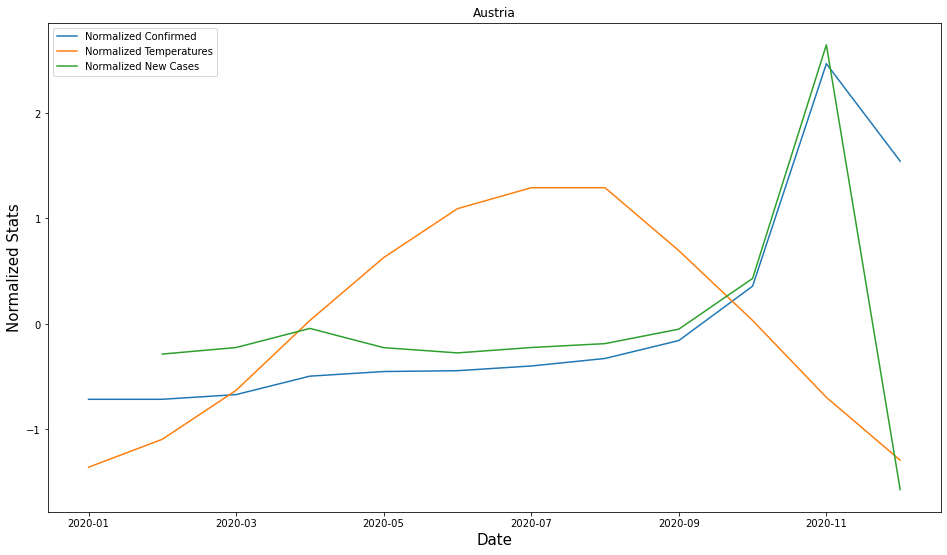

<Figure size 5760x2880 with 0 Axes>

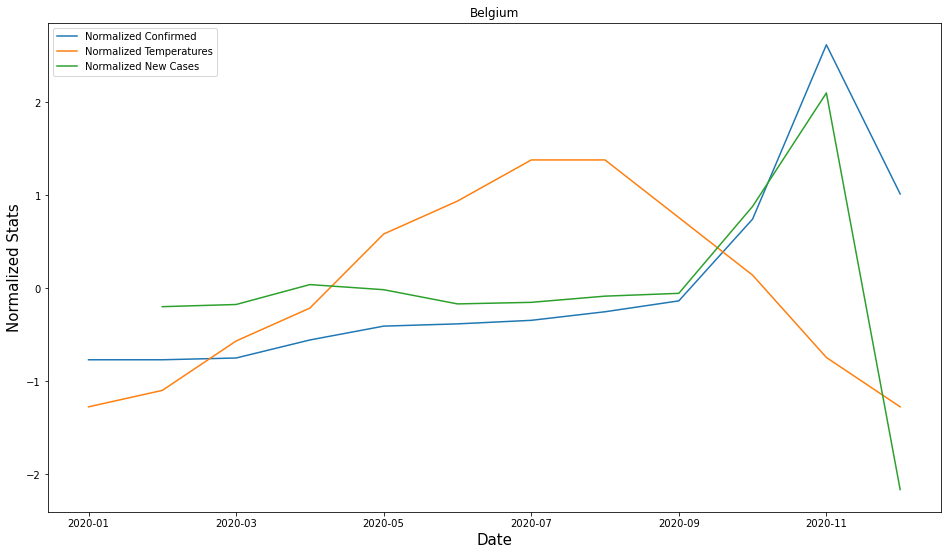

<Figure size 5760x2880 with 0 Axes>

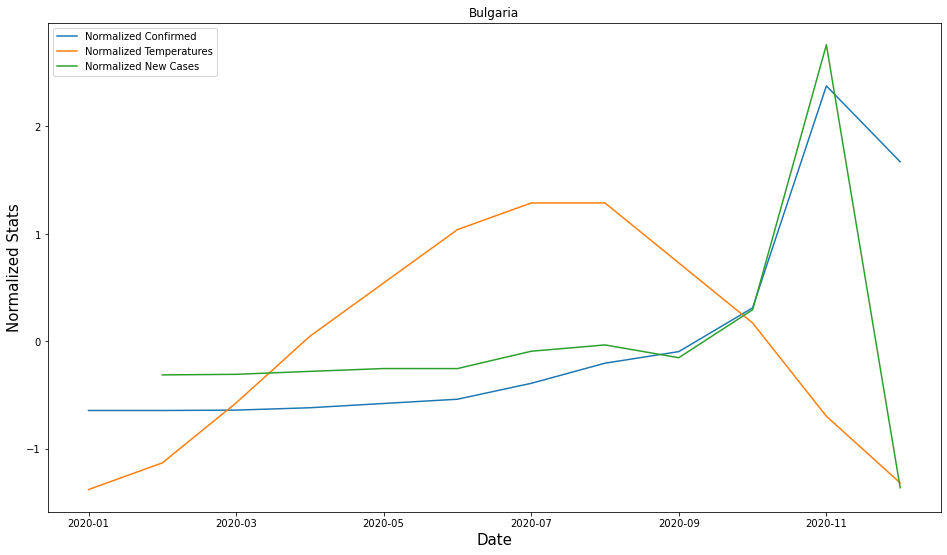

<Figure size 5760x2880 with 0 Axes>

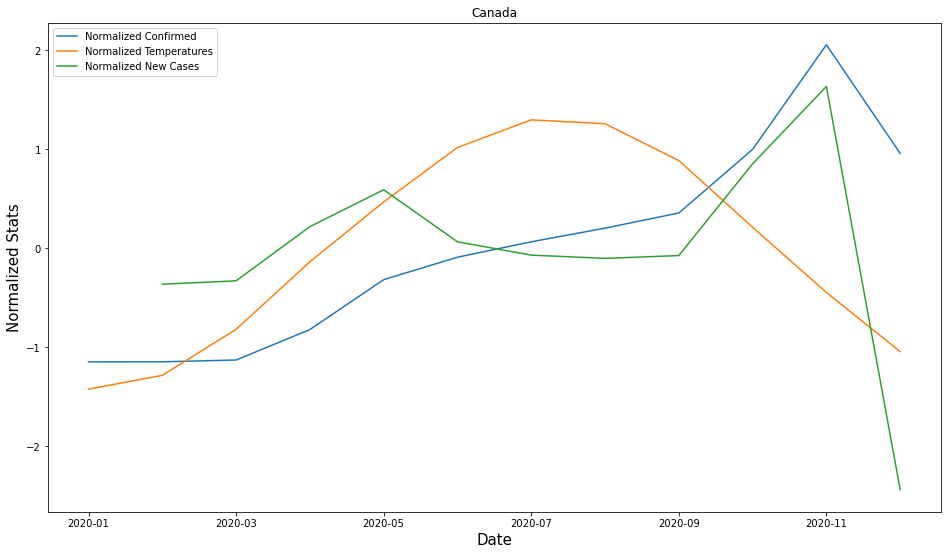

<Figure size 5760x2880 with 0 Axes>

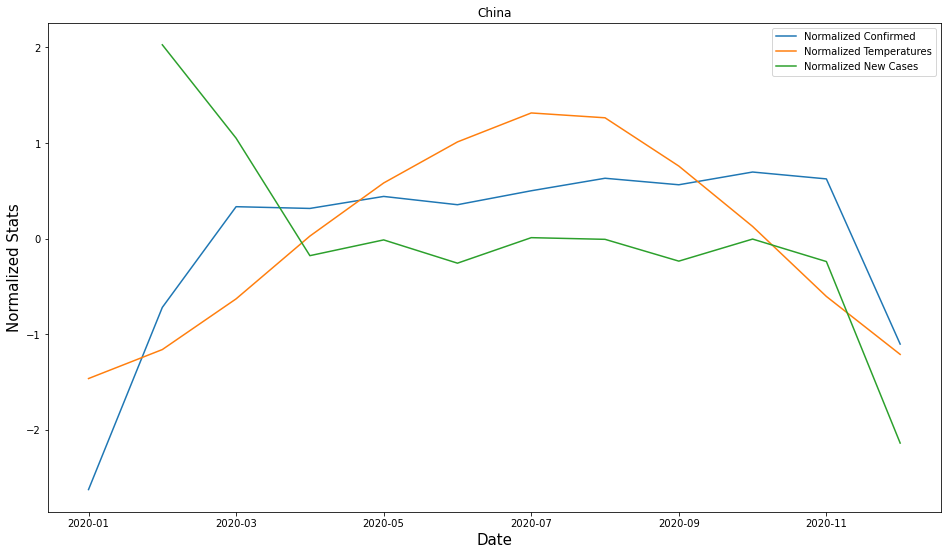

<Figure size 5760x2880 with 0 Axes>

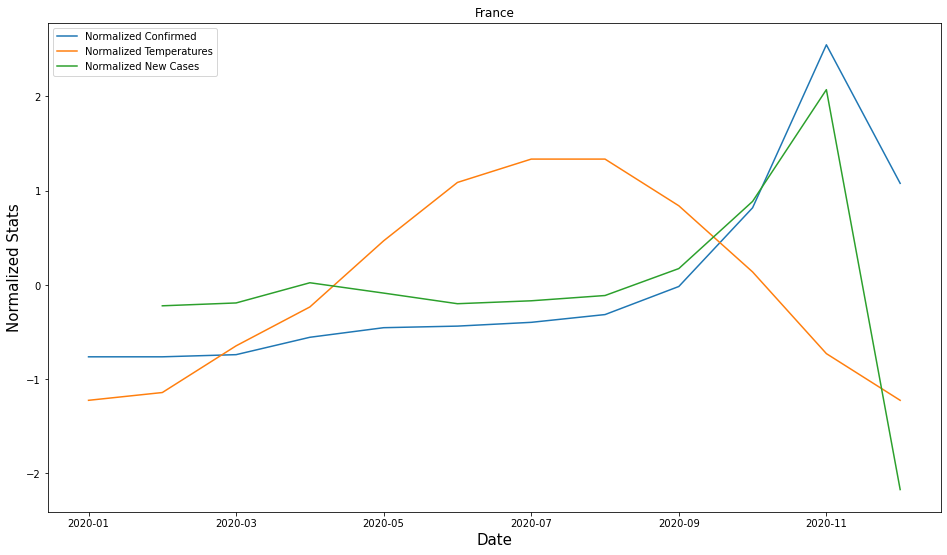

<Figure size 5760x2880 with 0 Axes>

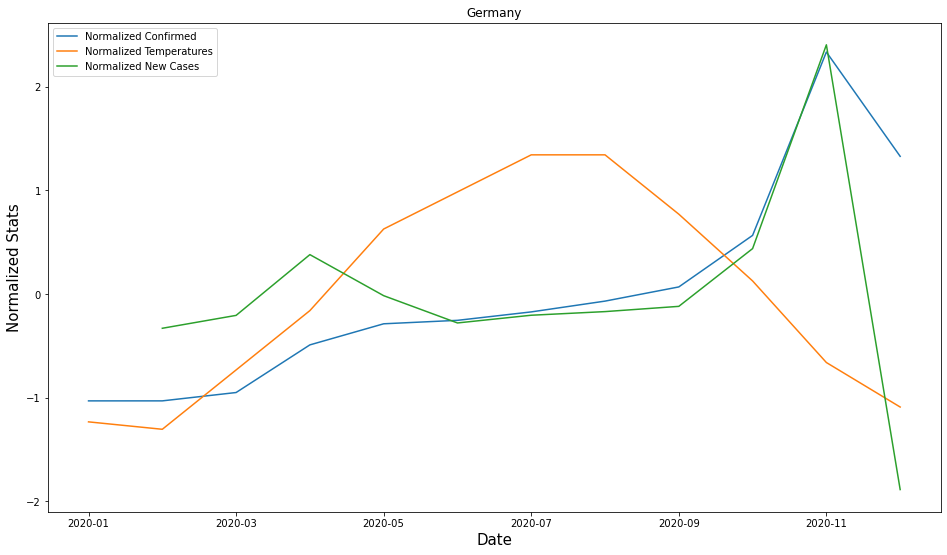

<Figure size 5760x2880 with 0 Axes>

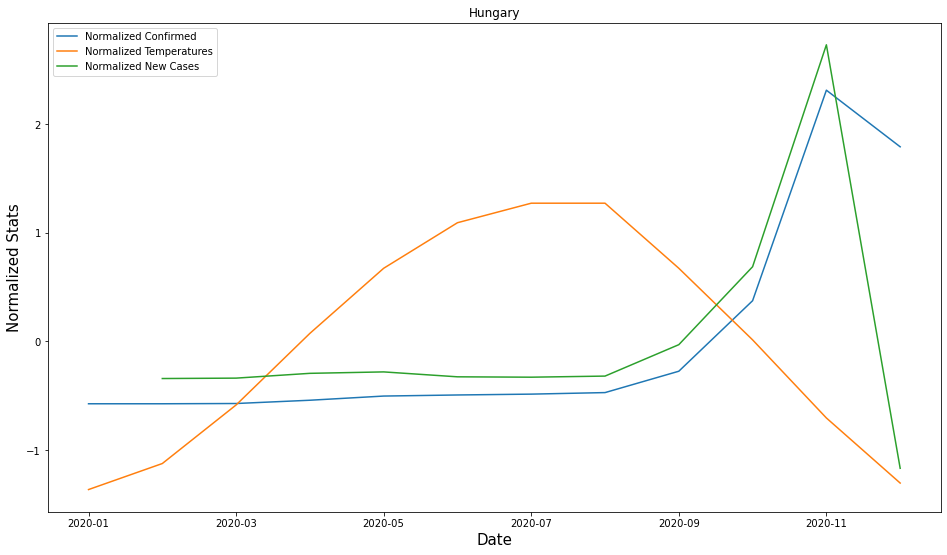

<Figure size 5760x2880 with 0 Axes>

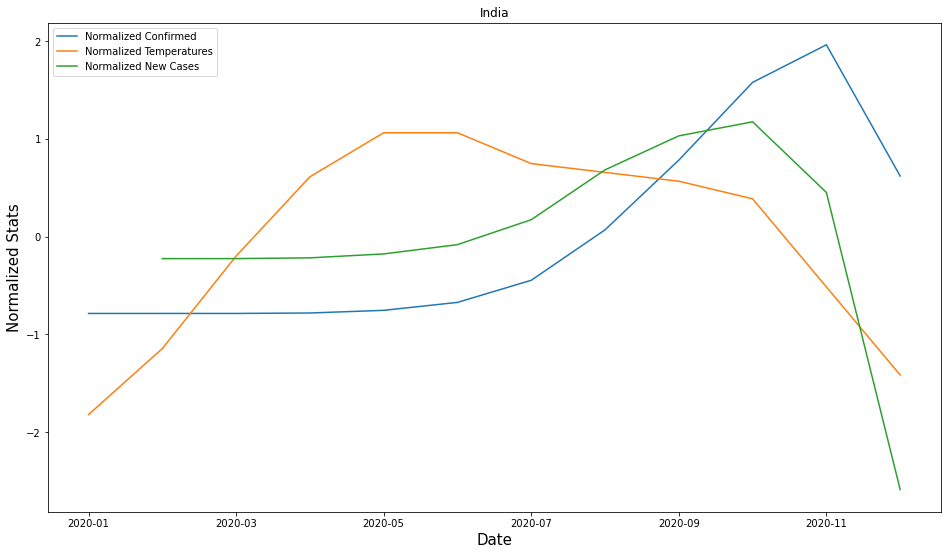

<Figure size 5760x2880 with 0 Axes>

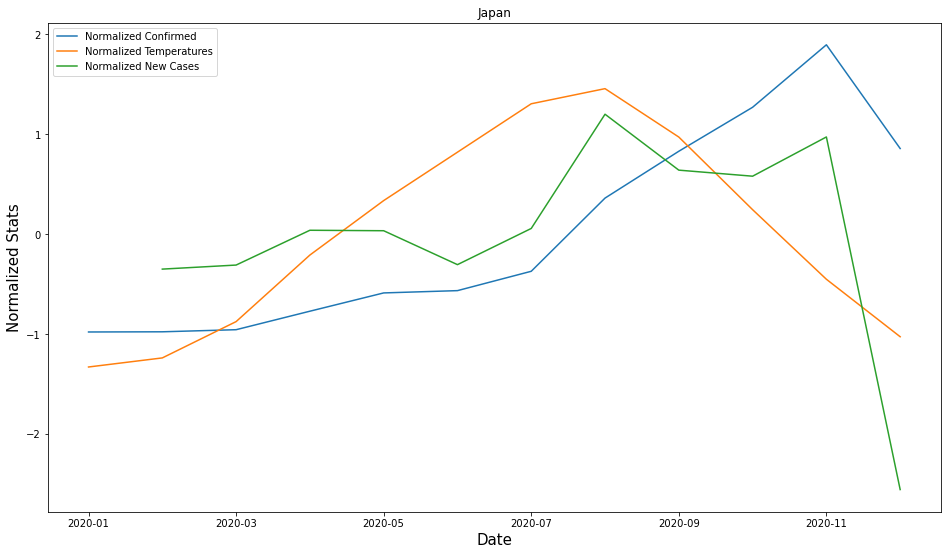

<Figure size 5760x2880 with 0 Axes>

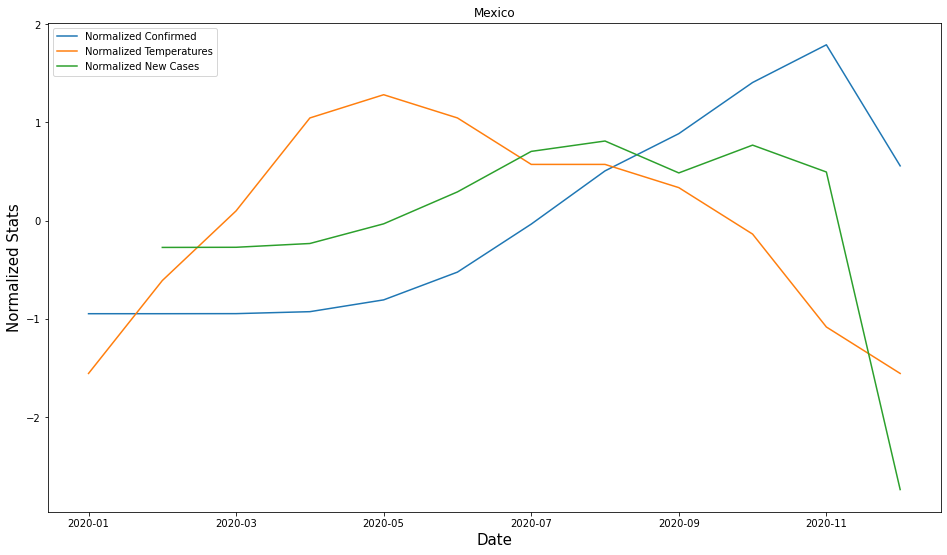

<Figure size 5760x2880 with 0 Axes>

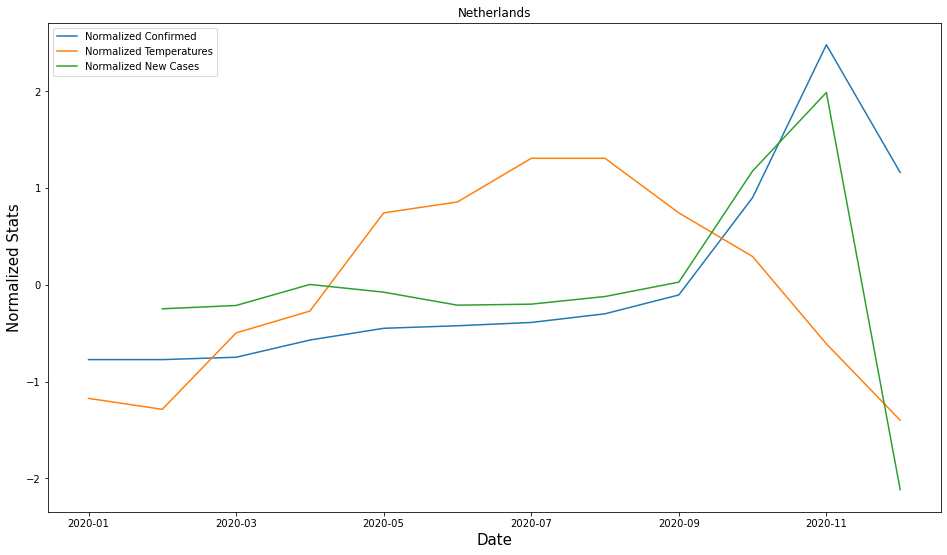

<Figure size 5760x2880 with 0 Axes>

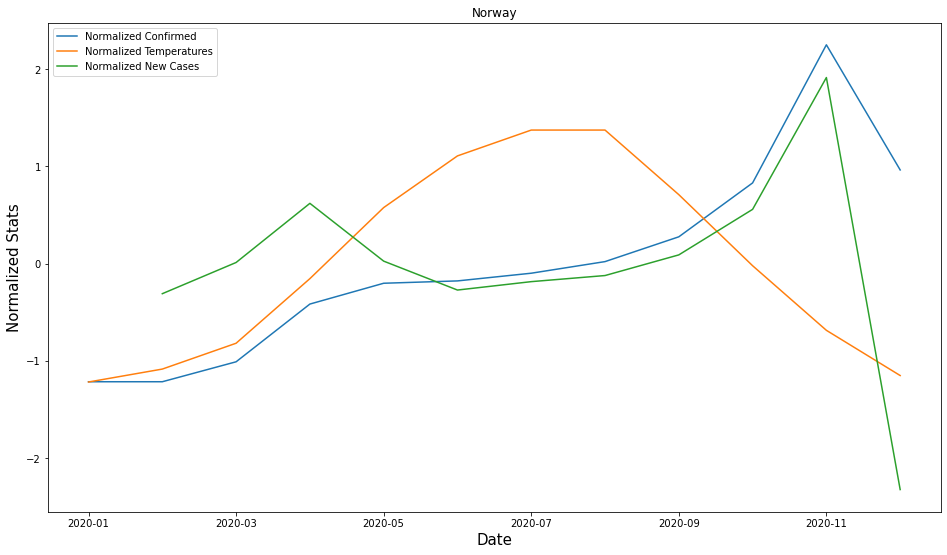

<Figure size 5760x2880 with 0 Axes>

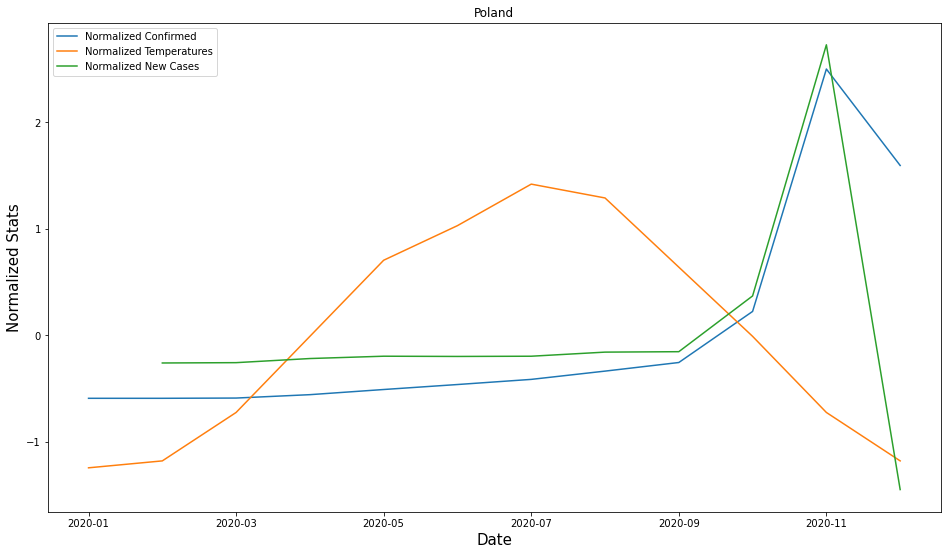

<Figure size 5760x2880 with 0 Axes>

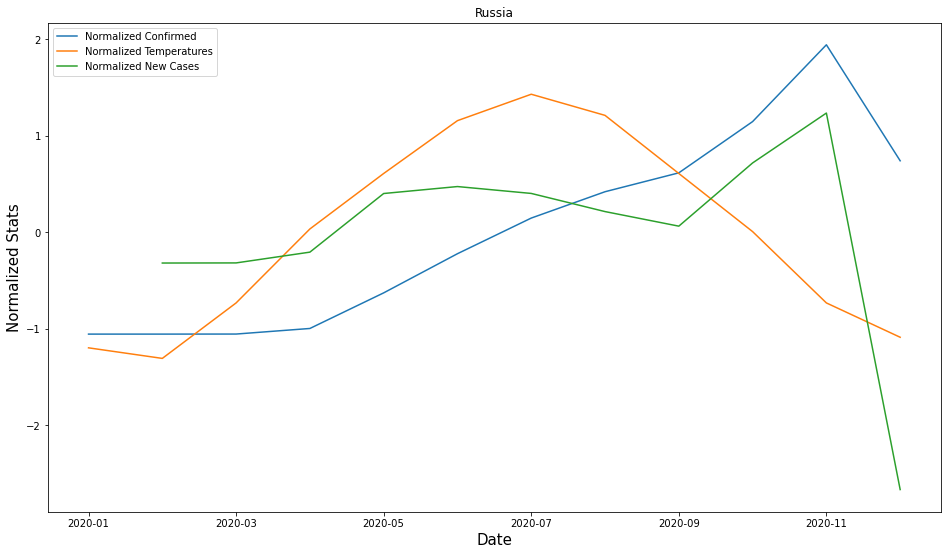

<Figure size 5760x2880 with 0 Axes>

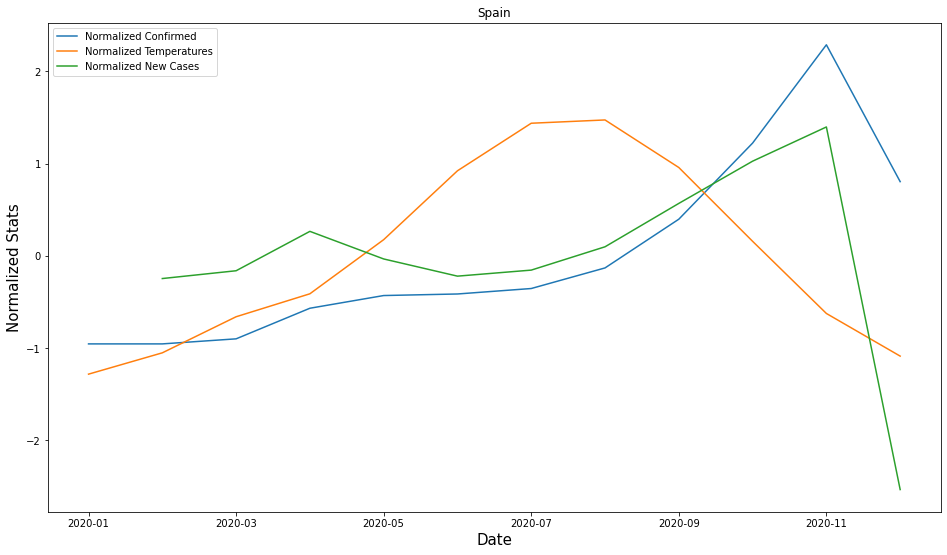

<Figure size 5760x2880 with 0 Axes>

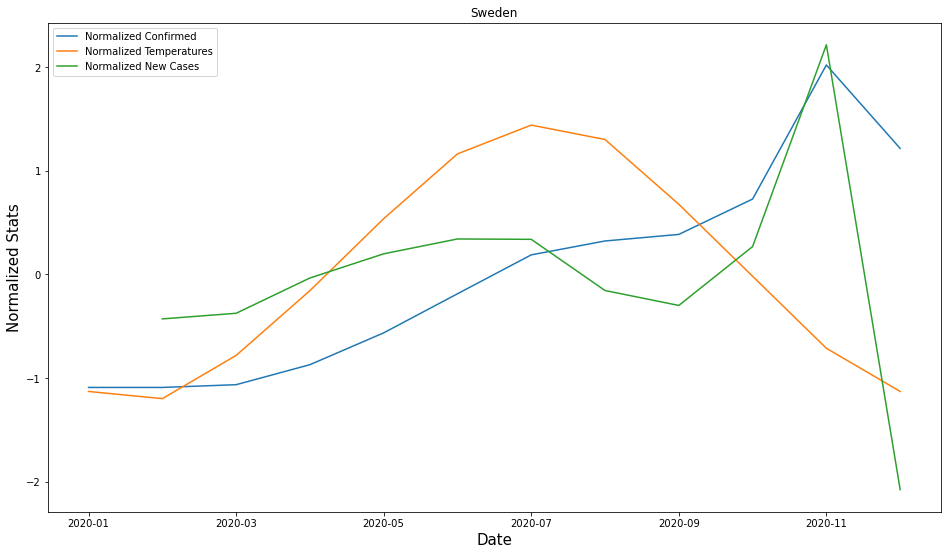

<Figure size 5760x2880 with 0 Axes>

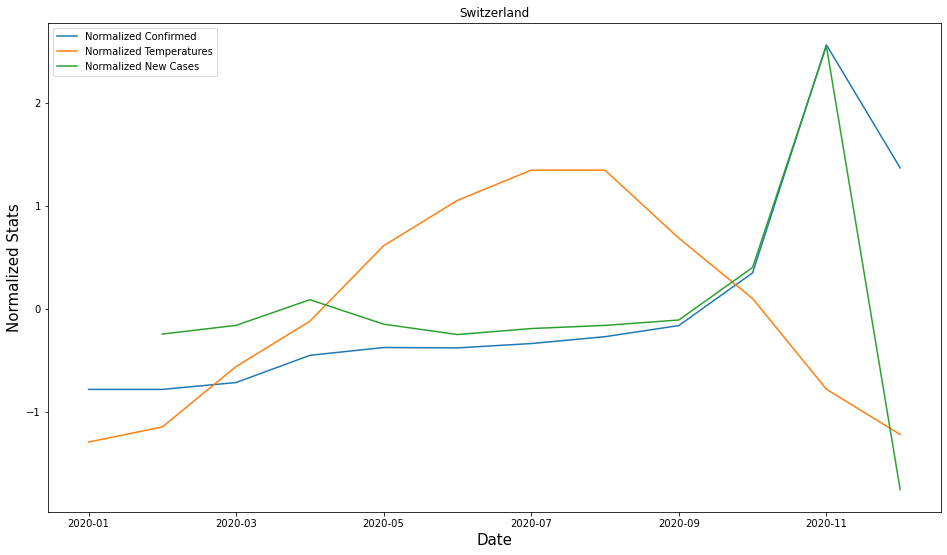

In [471]:
northern = PdfPages('northern.pdf')

#Copies the exact procedure from above

for c in northern_hem:
    
    try:
        country = totals[totals.Country == c]


        weather = []

        for i in country['monthlyAvg']:

            lil_df = pd.DataFrame(i)
            lil_df = lil_df[['high', 'low']]
            weather.append(lil_df)

        weather = pd.concat(weather, axis=1).mean(axis=1)
        weather.head(12)


        dates = pd.DataFrame(['2020-01', 
                                   '2020-02',
                                  '2020-03',
                                  '2020-04',
                                  '2020-05',
                                  '2020-06',
                                  '2020-07',
                                  '2020-08',
                                  '2020-09',
                                  '2020-10',
                                  '2020-11',
                                  '2020-12'])

        dates = dates.rename(columns={0:'Date'})

        weather = pd.concat([dates, weather], axis=1)

        weather = weather.rename(columns={0:'avg_temp'})

        country_df = countries[countries.Countries == c]
        country_df['Date'] = country_df['Date'].str.slice(0,7)

        country_df = country_df.groupby(['Date', 'Countries']).sum()
        country_df = country_df.reset_index()


        country_df = country_df.merge(weather, on='Date')



        country_df.head()
        country_df['New Cases'] = country_df['Confirmed'].diff()
        country_df = country_df[['Date', 'Confirmed', 'avg_temp', 'New Cases']]

        country_df['Normalized Confirmed']=(country_df['Confirmed']-country_df['Confirmed'].mean())/country_df['Confirmed'].std()
        country_df['Normalized Temperatures']=(country_df['avg_temp']-country_df['avg_temp'].mean())/country_df['avg_temp'].std()
        country_df['Normalized New Cases']=(country_df['New Cases']-country_df['New Cases'].mean())/country_df['New Cases'].std()

        country_df = country_df[['Date', 'Normalized Confirmed', 'Normalized Temperatures', 'Normalized New Cases']]

        plt.figure(figsize=(80,40)); country_df.plot(x='Date');

        plt.title(c)

        plt.xlabel('Date', fontsize=15)
        plt.ylabel('Normalized Stats', fontsize=15)

        column_1 = country_df['Normalized Confirmed']
        column_2 = country_df['Normalized Temperatures']
        correlation = column_1. corr(column_2)

        print(f'The Correlation is: {correlation}')
        plt.savefig(northern, format='pdf')
        
    except:
        print(f'{c} Not Found')
        


northern.close()